README: this file better read and browse using a table of contents 

# Houses Data Price Analysis

In [192]:
### PACKAGES INSTALLATION 
# install.packages("dummies") # In order to create dummy variables
# install.packages("corrplot")
# install.packages("car")
# install.packages('car', dependencies = TRUE)

package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\david\AppData\Local\Temp\RtmpuGmpJH\downloaded_packages


In [1]:
### LOAD REQUIRED Libraries
library(dummies)
library(corrplot)
library(car)

dummies-1.5.6 provided by Decision Patterns

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Loading required package: carData


In [2]:
options(scipen=999)
options(digits=4)

# Load data

In [3]:
HousesData <- read.table("HouseDetails.txt", sep="\t", header=TRUE)

In [4]:
head(HousesData)

price  lotSize age landValue livingArea pctCollege bedrooms fireplaces
1 132500 0.09     42 50000      906       35         2        1         
2 181115 0.92      0 22300     1953       51         3        0         
3 109000 0.19    133  7300     1944       51         4        1         
4 155000 0.41     13 18700     1944       51         3        1         
5  86060 0.11      0 15000      840       51         2        0         
6 120000 0.68     31 14000     1152       22         4        1         
  bathrooms rooms heating         fuel     sewer             waterfront
1 1.0       5     electric        electric septic            No        
2 2.5       6     hot water/steam gas      septic            No        
3 1.0       8     hot water/steam gas      public/commercial No        
4 1.5       5     hot air         gas      septic            No        
5 1.0       3     hot air         gas      public/commercial No        
6 1.0       8     hot air         gas      septic            No        
  newConstruction centralAir
1 No              No        
2 No              No        
3 No              No        
4 No              No        
5 Yes             Yes       
6 No              No

In [5]:
str(HousesData)

'data.frame':	1728 obs. of  16 variables:
 $ price          : int  132500 181115 109000 155000 86060 120000 153000 170000 90000 122900 ...
 $ lotSize        : num  0.09 0.92 0.19 0.41 0.11 0.68 0.4 1.21 0.83 1.94 ...
 $ age            : int  42 0 133 13 0 31 33 23 36 4 ...
 $ landValue      : int  50000 22300 7300 18700 15000 14000 23300 14600 22200 21200 ...
 $ livingArea     : int  906 1953 1944 1944 840 1152 2752 1662 1632 1416 ...
 $ pctCollege     : int  35 51 51 51 51 22 51 35 51 44 ...
 $ bedrooms       : int  2 3 4 3 2 4 4 4 3 3 ...
 $ fireplaces     : int  1 0 1 1 0 1 1 1 0 0 ...
 $ bathrooms      : num  1 2.5 1 1.5 1 1 1.5 1.5 1.5 1.5 ...
 $ rooms          : int  5 6 8 5 3 8 8 9 8 6 ...
 $ heating        : Factor w/ 3 levels "electric","hot air",..: 1 3 3 2 2 2 3 2 1 2 ...
 $ fuel           : Factor w/ 3 levels "electric","gas",..: 1 2 2 2 2 2 3 3 1 2 ...
 $ sewer          : Factor w/ 3 levels "none","public/commercial",..: 3 3 2 3 2 3 3 3 3 1 ...
 $ waterfront     : Factor w

In [6]:
# Create dummy variables for categorical variables.
datadummy <- dummy.data.frame(DFOriginal, names = c('heating','fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir'), sep='.')

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

In [7]:
data <- as.data.frame(datadummy)

In [8]:
head(data)

price  lotSize age landValue livingArea pctCollege bedrooms fireplaces
1 132500 0.09     42 50000      906       35         2        1         
2 181115 0.92      0 22300     1953       51         3        0         
3 109000 0.19    133  7300     1944       51         4        1         
4 155000 0.41     13 18700     1944       51         3        1         
5  86060 0.11      0 15000      840       51         2        0         
6 120000 0.68     31 14000     1152       22         4        1         
  bathrooms rooms ... fuel.oil sewer.none sewer.public/commercial sewer.septic
1 1.0       5     ... 0        0          0                       1           
2 2.5       6     ... 0        0          0                       1           
3 1.0       8     ... 0        0          1                       0           
4 1.5       5     ... 0        0          0                       1           
5 1.0       3     ... 0        0          1                       0           
6 1.0       8     ... 0        0          0                       1           
  waterfront.No waterfront.Yes newConstruction.No newConstruction.Yes
1 1             0              1                  0                  
2 1             0              1                  0                  
3 1             0              1                  0                  
4 1             0              1                  0                  
5 1             0              0                  1                  
6 1             0              1                  0                  
  centralAir.No centralAir.Yes
1 1             0             
2 1             0             
3 1             0             
4 1             0             
5 0             1             
6 1             0

In [9]:
# Remove redundant columns for dummy variables that have just been created 

data$waterfront.No <- NULL
data$newConstruction.No <- NULL
data$centralAir.No <- NULL
data$`sewer.public/commercial` <- NULL
data$fuel.oil <- NULL
data$`heating.hot water/steam` <- NULL

In [10]:
str(data)

'data.frame':	1728 obs. of  19 variables:
 $ price              : int  132500 181115 109000 155000 86060 120000 153000 170000 90000 122900 ...
 $ lotSize            : num  0.09 0.92 0.19 0.41 0.11 0.68 0.4 1.21 0.83 1.94 ...
 $ age                : int  42 0 133 13 0 31 33 23 36 4 ...
 $ landValue          : int  50000 22300 7300 18700 15000 14000 23300 14600 22200 21200 ...
 $ livingArea         : int  906 1953 1944 1944 840 1152 2752 1662 1632 1416 ...
 $ pctCollege         : int  35 51 51 51 51 22 51 35 51 44 ...
 $ bedrooms           : int  2 3 4 3 2 4 4 4 3 3 ...
 $ fireplaces         : int  1 0 1 1 0 1 1 1 0 0 ...
 $ bathrooms          : num  1 2.5 1 1.5 1 1 1.5 1.5 1.5 1.5 ...
 $ rooms              : int  5 6 8 5 3 8 8 9 8 6 ...
 $ heating.electric   : int  1 0 0 0 0 0 0 0 1 0 ...
 $ heating.hot air    : int  0 0 0 1 1 1 0 1 0 1 ...
 $ fuel.electric      : int  1 0 0 0 0 0 0 0 1 0 ...
 $ fuel.gas           : int  0 1 1 1 1 1 0 0 0 1 ...
 $ sewer.none         : int  0 0 0 0 0 0 0

## Data Observation

Check the data in data data frame has been loaded correctly and looks fine to continue analysis

In [11]:
# Number of rows in data
rows <- nrow(data)
rows
# Number of columns in data
cols <- ncol(data)
cols
# Names of variables in data
names(data)

[1] 1728

[1] 19

[1] "price"               "lotSize"             "age"                
 [4] "landValue"           "livingArea"          "pctCollege"         
 [7] "bedrooms"            "fireplaces"          "bathrooms"          
[10] "rooms"               "heating.electric"    "heating.hot air"    
[13] "fuel.electric"       "fuel.gas"            "sewer.none"         
[16] "sewer.septic"        "waterfront.Yes"      "newConstruction.Yes"
[19] "centralAir.Yes"

In [12]:
head(data)

price  lotSize age landValue livingArea pctCollege bedrooms fireplaces
1 132500 0.09     42 50000      906       35         2        1         
2 181115 0.92      0 22300     1953       51         3        0         
3 109000 0.19    133  7300     1944       51         4        1         
4 155000 0.41     13 18700     1944       51         3        1         
5  86060 0.11      0 15000      840       51         2        0         
6 120000 0.68     31 14000     1152       22         4        1         
  bathrooms rooms heating.electric heating.hot air fuel.electric fuel.gas
1 1.0       5     1                0               1             0       
2 2.5       6     0                0               0             1       
3 1.0       8     0                0               0             1       
4 1.5       5     0                1               0             1       
5 1.0       3     0                1               0             1       
6 1.0       8     0                1               0             1       
  sewer.none sewer.septic waterfront.Yes newConstruction.Yes centralAir.Yes
1 0          1            0              0                   0             
2 0          1            0              0                   0             
3 0          0            0              0                   0             
4 0          1            0              0                   0             
5 0          0            0              1                   1             
6 0          1            0              0                   0

In [13]:
# Check Data Integrity: Missing Values 
sum(is.na(data))

[1] 0

# Descriptive analysis

In [14]:
attach(data)

## Descriptive analysis for variable price

<b>Measure of central tendency

In [102]:
summary(price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5000  145000  189900  211967  259000  775000 

In [103]:
# mode for price
getMode <- function(V){
  
  uno <- unique(V)
  uno[which.max(tabulate(match(V, uno)))]
  
}

result <- getMode(price)
result

[1] 120000

<b> Measure of dispersion


In [104]:
range(price)
var(price)
sd(price)

sqrt(var(price)) == sd(price)

[1]   5000 775000

[1] 9690707465

[1] 98441

[1] TRUE

In [105]:
# Quartiles
quantile(DF$price)

0%    25%    50%    75%   100% 
  5000 145000 189900 259000 775000

<b> Visualization

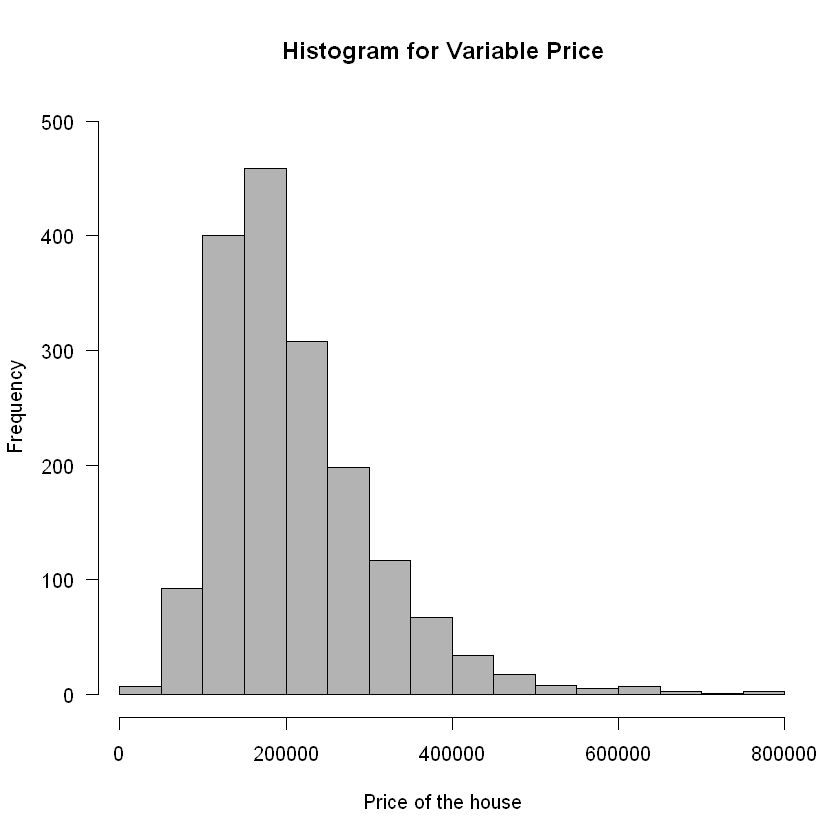

In [106]:
hist(price, breaks=20, main='Histogram for Variable Price', xlab='Price of the house', ylim=c(0,500),
     xlim=c(min(price), max(price)), las=1, col='grey70')

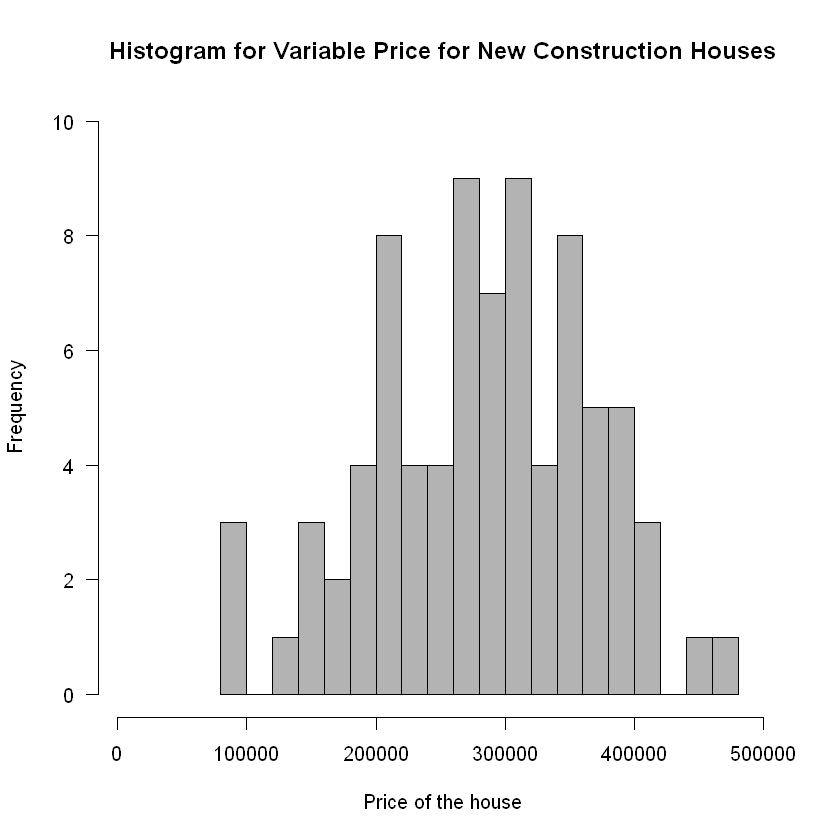

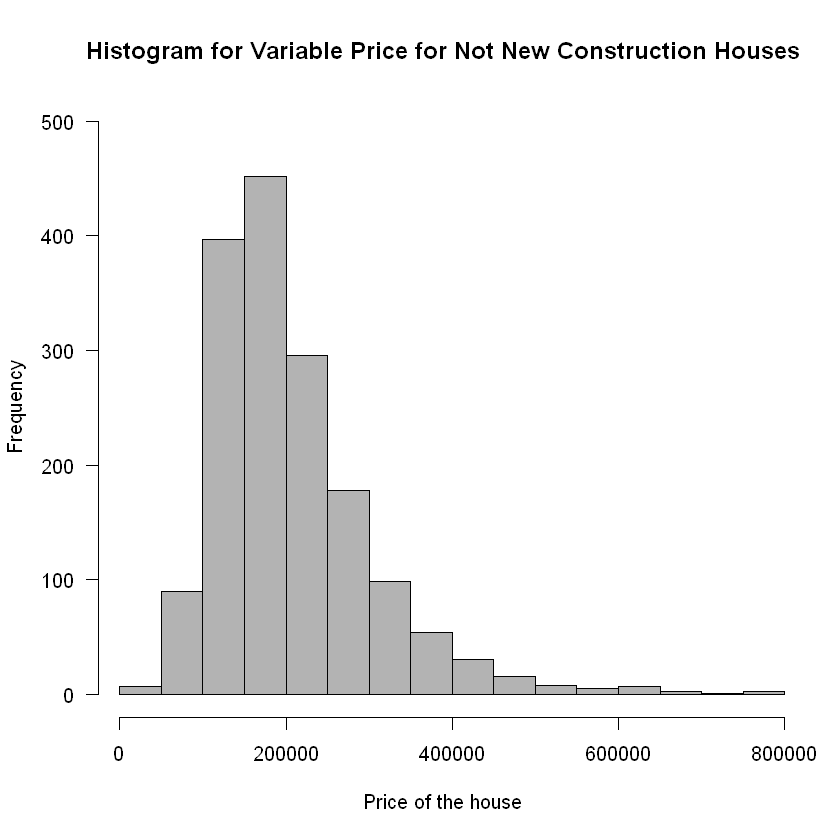

In [107]:
hist(price[newConstruction.Yes == 1], breaks=20, main='Histogram for Variable Price for New Construction Houses', xlab='Price of the house', ylim=c(0,10),
     xlim=c(min(price), 500000), las=1, col='grey70')
hist(price[newConstruction.Yes == 0], breaks=20, main='Histogram for Variable Price for Not New Construction Houses', xlab='Price of the house', ylim=c(0,500),
     xlim=c(min(price), max(price)), las=1, col='grey70')

Looking at the histograms of price houses for new construction houses and not new construction, it can be identified that the skweness of the data comes from the houses which are not new constructed. 

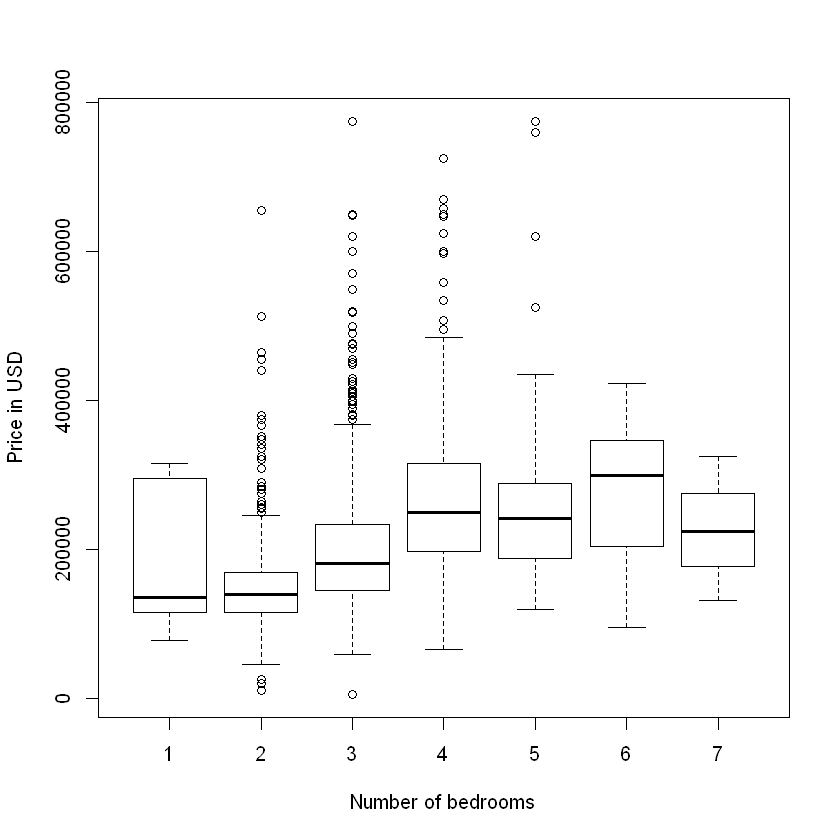

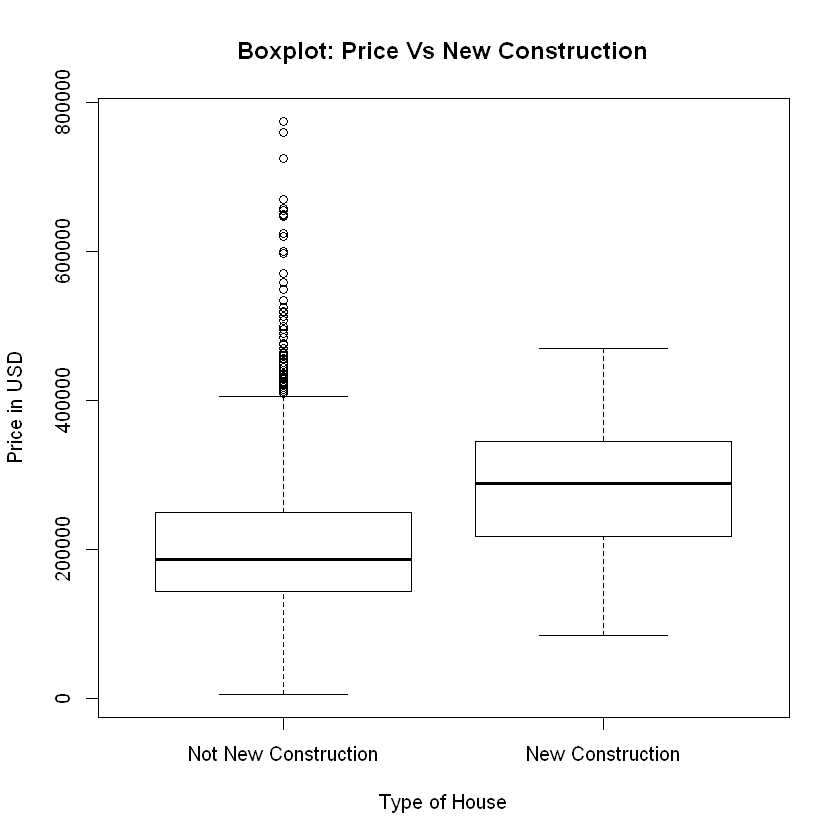

In [109]:
boxplot(price ~ bedrooms, xlab='Number of bedrooms', ylab = 'Price in USD')


boxplot(price ~ newConstruction.Yes, 
        main = 'Boxplot: Price Vs New Construction',
        names = c('Not New Construction', 'New Construction'),
        xlab = 'Type of House',
        ylab = 'Price in USD')

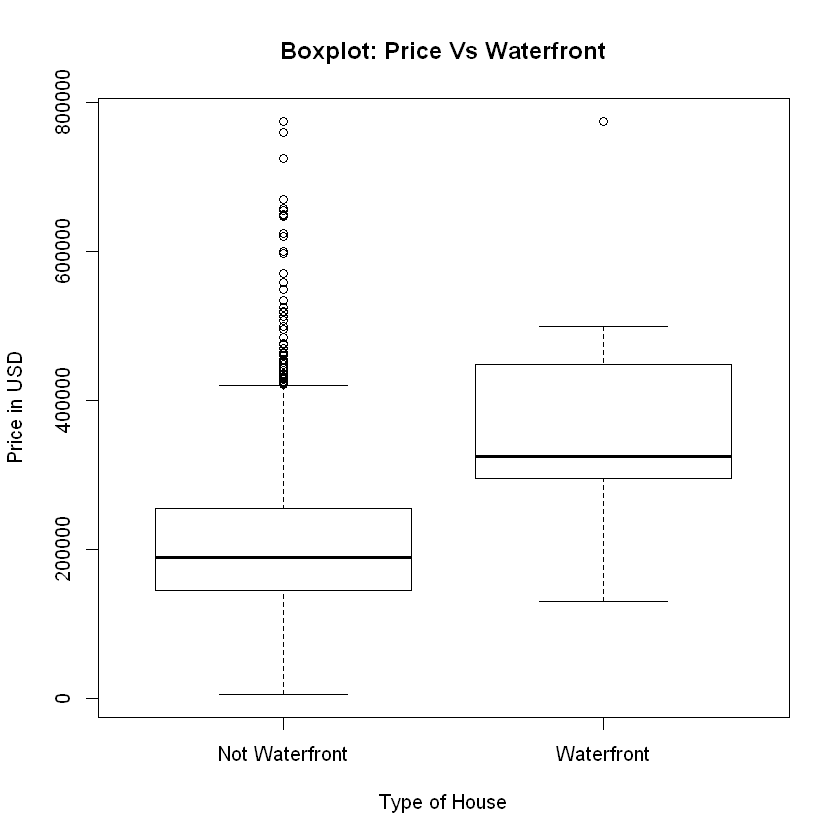

In [111]:
boxplot(price ~ waterfront.Yes, 
        main = 'Boxplot: Price Vs Waterfront',
        names = c('Not Waterfront', 'Waterfront'),
        xlab = 'Type of House',
        ylab = 'Price in USD')

In [112]:
t.test(price, waterfront.Yes)


	Welch Two Sample t-test

data:  price and waterfront.Yes
t = 90, df = 1727, p-value <0.0000000000000002
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 207322 216611
sample estimates:
    mean of x     mean of y 
211966.705440      0.008681 


## Descriptive analysis for variable landValue

<b> Measue of central tendency 

In [113]:
summary(landValue)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    200   15100   25000   34557   40200  412600 

<b> Measure of dispersion

In [114]:
sd(landValue)
range(landValue)

[1] 35021

[1]    200 412600

In [115]:
# Quartiles
quantile(landValue)

0%    25%    50%    75%   100% 
   200  15100  25000  40200 412600

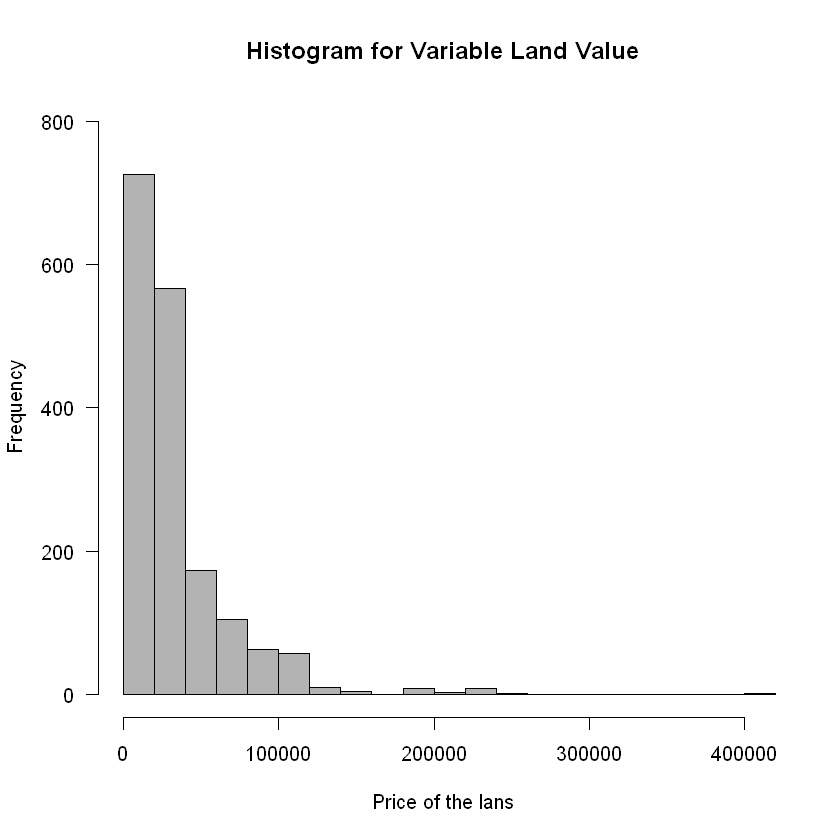

In [116]:
hist(landValue, breaks=20, main='Histogram for Variable Land Value', xlab='Price of the lans', ylim=c(0,800),
     xlim=c(min(landValue), max(landValue)), las=1, col='grey70')


## Descriptive anaylis for variable age

<b> Meausre of central tendency

In [117]:
summary(age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    13.0    19.0    27.9    34.0   225.0 

<b> Measure of dispersion

In [118]:
sd(age)
range(age)
sqrt(var(age)) == sd(age)

[1] 29.21

[1]   0 225

[1] TRUE

In [119]:
# Quartiles
quantile(age)

0%  25%  50%  75% 100% 
   0   13   19   34  225

<b> Visualization

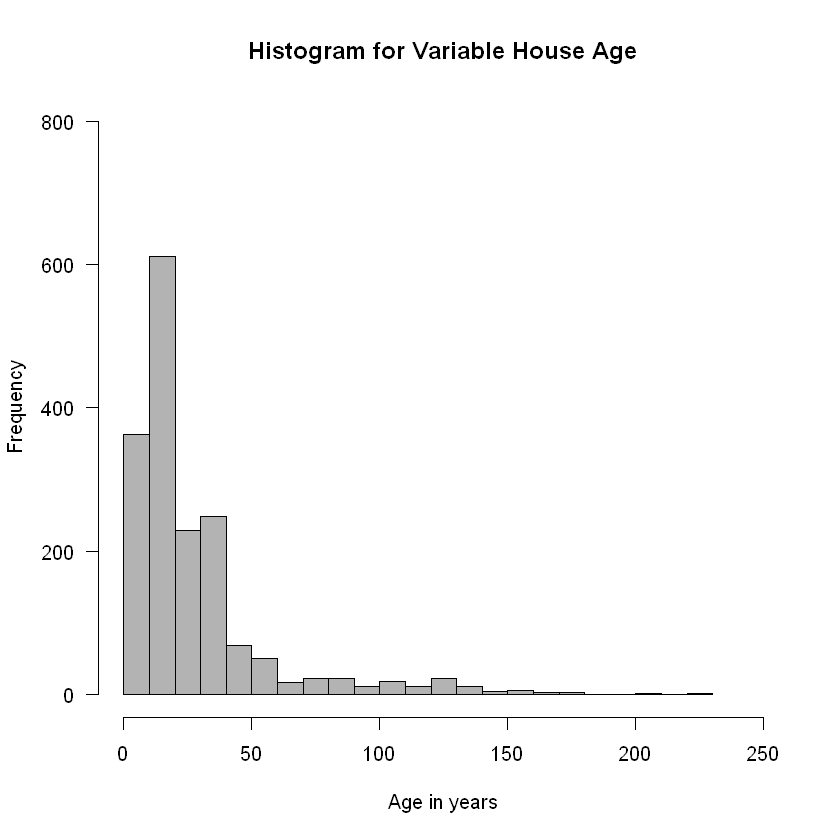

In [120]:
hist(age, breaks=20, main='Histogram for Variable House Age', xlab='Age in years', ylim=c(0,800),
     xlim=c(min(age), 250), las=1, col='grey70')

## Descriptive analysis for livingArea

<b> Measures of central tendency

In [69]:
summary(livingArea)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    616    1300    1634    1755    2138    5228 

<b> Measure of dispersion

In [70]:
sd(livingArea)
range(livingArea)
sqrt(var(livingArea)) == sd(livingArea)

[1] 619.9

[1]  616 5228

[1] TRUE

In [71]:
# Quartiles
quantile(livingArea)

0%  25%  50%  75% 100% 
 616 1300 1634 2138 5228

<b> Visualization

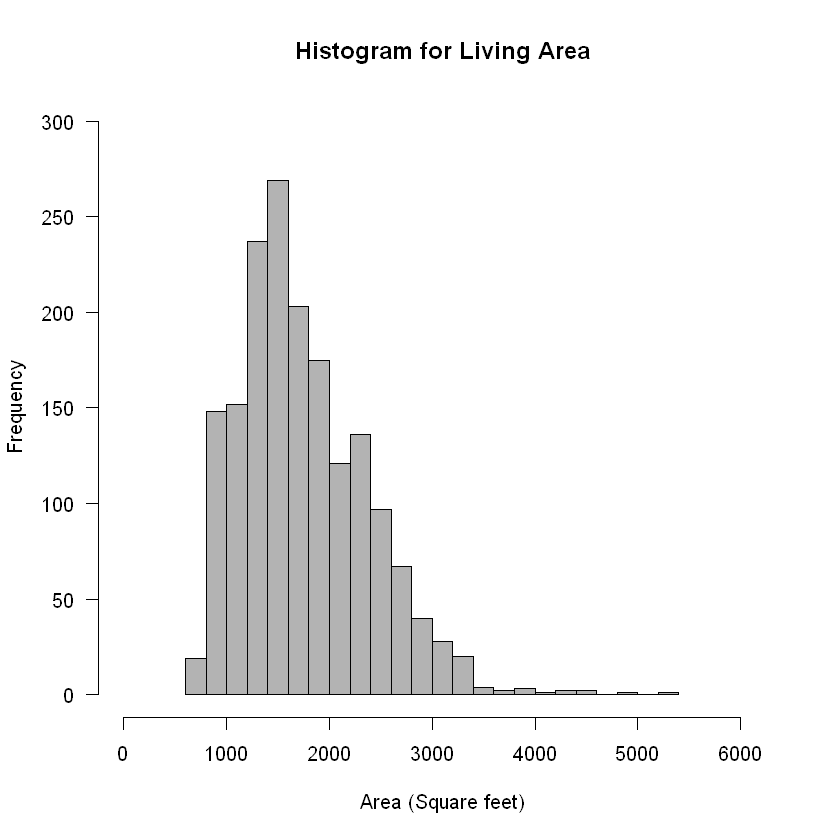

In [72]:
hist(livingArea, breaks=20, main='Histogram for Living Area', xlab='Area (Square feet)', ylim=c(0,300),
     xlim=c(0, max(livingArea + 1000)), las=1, col='grey70')

## Descriptive analysis for bathrooms

<b> Measure of central tendency

In [72]:
summary(bathrooms)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     1.5     2.0     1.9     2.5     4.5 

<b> Meausre of dispersion

In [77]:
sd(bathrooms)
range(bathrooms)
sqrt(var(bathrooms)) == sd(bathrooms)

[1] 0.6584

[1] 0.0 4.5

[1] TRUE

In [78]:
# Quartiles
quantile(bathrooms)

0%  25%  50%  75% 100% 
 0.0  1.5  2.0  2.5  4.5

<b> Visualization

ERROR: Error in ggplot(TempDF, aes(x = bathrooms)): could not find function "ggplot"


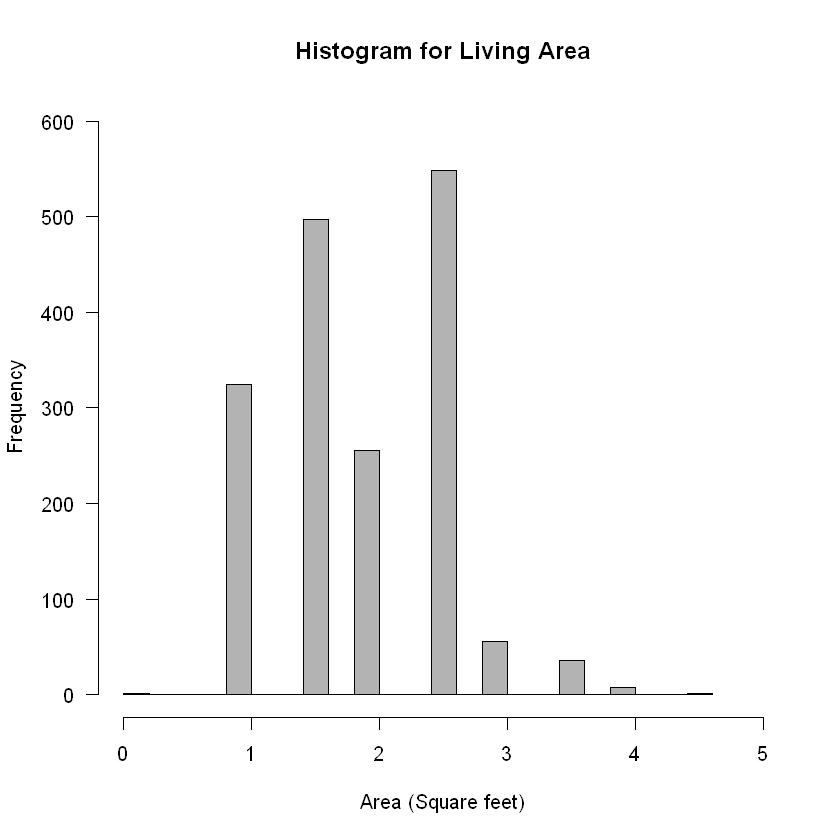

In [76]:
hist(bathrooms, breaks=20, main='Histogram for Living Area', xlab='Area (Square feet)', ylim=c(0,600),
     xlim=c(0, 5), las=1, col='grey70')



## Descriptive analysis for lotSize

<b> Measure of central tendency

In [71]:
summary(lotSize)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.17    0.37    0.50    0.54   12.20 

<b> Measure of dispersion

In [73]:
sd(lotSize)
range(lotSize)
sqrt(var(lotSize)) == sd(lotSize)

[1] 0.6987

[1]  0.0 12.2

[1] TRUE

## Descriptive analysis for bedrooms

<b> Measure of central tendency

In [76]:
summary(bedrooms)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    3.00    3.15    4.00    7.00 

<b>Measure of dispersion

In [79]:
sd(bedrooms)
range(bedrooms)
sqrt(var(bedrooms)) == sd(bedrooms)

[1] 0.8174

[1] 1 7

[1] TRUE

## Descriptive analysis for rooms

<b> Measure of central tendency

In [80]:
summary(rooms)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    5.00    7.00    7.04    8.25   12.00 

<b>Measure of dispersion

In [81]:
sd(rooms)
range(rooms)
sqrt(var(rooms)) == sd(rooms)

[1] 2.316

[1]  2 12

[1] TRUE

## Outliers

In [79]:

# FINDING OUTLIERS

Q <- quantile(price, probs=c(.25, .75 ))
Q

iqr <- IQR(price)
iqr

up <- Q[2] + 1.5 * iqr
low <- Q[1] - 1.5 * iqr

up
low

25%    75% 
145000 259000

[1] 114000

75% 
430000

25% 
-26000

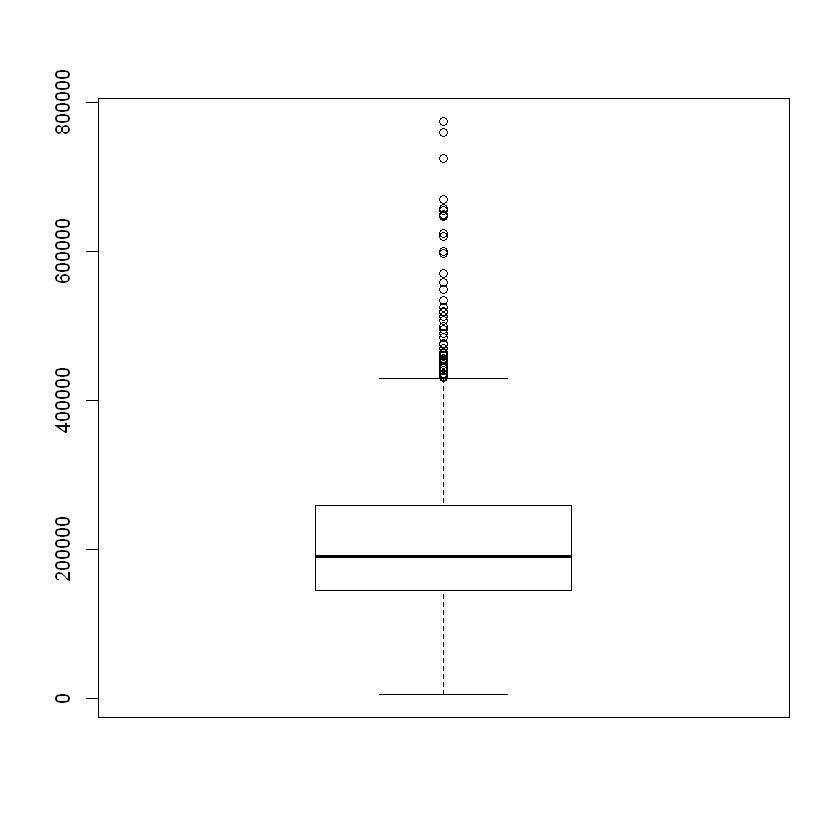

In [82]:
outliers <- boxplot(price)$out


In [83]:
outliers

[1] 457000 490000 625000 435000 520000 512971 559000 760000 496000 620000
[11] 549254 500075 649000 449000 476000 465000 600000 597185 518000 775000
[21] 650000 470000 647000 535000 500000 460000 475000 454900 445000 431250
[31] 600000 655000 775000 725000 620000 485000 650000 658300 571000 455000
[41] 670000 440000 432600 525000 453935 463000 440760 451000 508000 454900
[51] 455000 469900 436023

## Correlation

In [11]:
library(corrplot)

In [15]:
head(data)

price  lotSize age landValue livingArea pctCollege bedrooms fireplaces
1 132500 0.09     42 50000      906       35         2        1         
2 181115 0.92      0 22300     1953       51         3        0         
3 109000 0.19    133  7300     1944       51         4        1         
4 155000 0.41     13 18700     1944       51         3        1         
5  86060 0.11      0 15000      840       51         2        0         
6 120000 0.68     31 14000     1152       22         4        1         
  bathrooms rooms heating.electric heating.hot air fuel.electric fuel.gas
1 1.0       5     1                0               1             0       
2 2.5       6     0                0               0             1       
3 1.0       8     0                0               0             1       
4 1.5       5     0                1               0             1       
5 1.0       3     0                1               0             1       
6 1.0       8     0                1               0             1       
  sewer.none sewer.septic waterfront.Yes newConstruction.Yes centralAir.Yes
1 0          1            0              0                   0             
2 0          1            0              0                   0             
3 0          0            0              0                   0             
4 0          1            0              0                   0             
5 0          0            0              1                   1             
6 0          1            0              0                   0

In [16]:
#corr.data <- cor(data[,c(1:7)])
data.corr <- cor(data[,c('price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege', 'bedrooms', 'bathrooms', 'rooms')])
data.corr


price   lotSize  age      landValue livingArea pctCollege bedrooms
price       1.0000  0.15833 -0.18879  0.58127   0.7124     0.20012   0.40035 
lotSize     0.1583  1.00000 -0.01635  0.05922   0.1634    -0.03315   0.11398 
age        -0.1888 -0.01635  1.00000 -0.02182  -0.1742    -0.03778   0.02712 
landValue   0.5813  0.05922 -0.02182  1.00000   0.4234     0.22843   0.20245 
livingArea  0.7124  0.16345 -0.17424  0.42344   1.0000     0.20998   0.65620 
pctCollege  0.2001 -0.03315 -0.03778  0.22843   0.2100     1.00000   0.16292 
bedrooms    0.4003  0.11398  0.02712  0.20245   0.6562     0.16292   1.00000 
bathrooms   0.5972  0.08482 -0.36190  0.29750   0.7186     0.17954   0.45803 
rooms       0.5312  0.13760 -0.08226  0.29887   0.7337     0.15707   0.67186 
           bathrooms rooms   
price       0.59725   0.53117
lotSize     0.08482   0.13760
age        -0.36190  -0.08226
landValue   0.29750   0.29887
livingArea  0.71856   0.73367
pctCollege  0.17954   0.15707
bedrooms    0.45803   0.67186
bathrooms   1.00000   0.51758
rooms       0.51758   1.00000

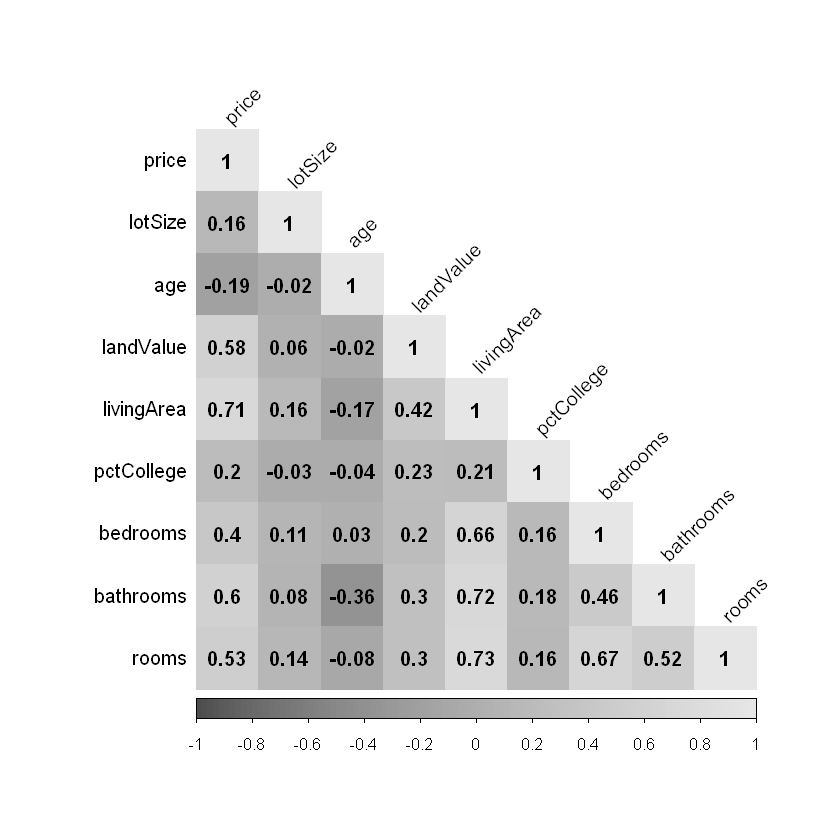

In [17]:
corrplot(data.corr, type='lower', method='color', col=gray.colors(100), addCoef.col="black", tl.col="black", tl.srt=45)

In [220]:
detach(data)

# Multiple Regression

Search of the multiple linear model. Given the number of variables in the data set, 'Foward Model' will be used to decide the important variables

In [12]:
attach(data)

In [18]:
head(data)

price  lotSize age landValue livingArea pctCollege bedrooms fireplaces
1 132500 0.09     42 50000      906       35         2        1         
2 181115 0.92      0 22300     1953       51         3        0         
3 109000 0.19    133  7300     1944       51         4        1         
4 155000 0.41     13 18700     1944       51         3        1         
5  86060 0.11      0 15000      840       51         2        0         
6 120000 0.68     31 14000     1152       22         4        1         
  bathrooms rooms heating.electric heating.hot air fuel.electric fuel.gas
1 1.0       5     1                0               1             0       
2 2.5       6     0                0               0             1       
3 1.0       8     0                0               0             1       
4 1.5       5     0                1               0             1       
5 1.0       3     0                1               0             1       
6 1.0       8     0                1               0             1       
  sewer.none sewer.septic waterfront.Yes newConstruction.Yes centralAir.Yes
1 0          1            0              0                   0             
2 0          1            0              0                   0             
3 0          0            0              0                   0             
4 0          1            0              0                   0             
5 0          0            0              1                   1             
6 0          1            0              0                   0

## Foward model

### Start model (Null model)

In [16]:
lm0 <- lm(price ~ 0)
summary(lm0)


Call:
lm(formula = price ~ 0)

Residuals:
   Min     1Q Median     3Q    Max 
  5000 145000 189900 259000 775000 

No Coefficients

Residual standard error: 234000 on 1728 degrees of freedom


### Functions

In [88]:
# Obtain all variables. create a new model with 'column' variable, 
# compute linear model, compute summary and access the R-sqaure value

for (col in 1:ncol(data))
{
    if ( class(data[,col]) != 'character' && names(data)[col]!='price')
    {
        cat(format(names(data)[col], width=10, justify='left'),
            summary(lm(data$price ~ 
                       data[,col]))$adj.r.squared,
            fill=TRUE)
    }
}

lotSize    0.0245
age        0.03508
landValue  0.3375
livingArea 0.5072
pctCollege 0.03949
bedrooms   0.1598
fireplaces 0.1415
bathrooms  0.3563
rooms      0.2817
heating.electric 0.05495
heating.hot air 0.03892
fuel.electric 0.05036
fuel.gas   0.06335
sewer.none 0.0005187
sewer.septic 0.005211
waterfront.Yes 0.02317
newConstruction.Yes 0.02456
centralAir.Yes 0.1101


In [19]:
# Function return the variable name with the higher R-Sqr and its value

# list of column names
ns <- c('price')
# list of numeric values
rs <- c(0)

for (col in 1:ncol(data))
{
    n <- names(data)[col]

    if ( class(data[,col]) != 'character' 
        && n !='price' && n != 'livingArea'  && n!= 'bathrooms' 
            && n!='landValue' && n!='rooms' && n!='bedrooms' && n != 'fireplaces'
                && n != 'centralAir.Yes' && n != 'fuel.gas' && n != 'heating.electric'
                    && n != 'fuel.electric' && n != 'pctCollege' && n != 'heating.hot air' 
                         && n != 'centralAir.No')
        
        #&& n!= 'livingArea' && n!= 'bathrooms' 
        #    && n!='landValue' && n!='rooms' && n!='bedrooms' 
        #        && n != 'fireplaces' && n != 'centralAir' && n != 'pctCollege'
        #           && n != 'age')
    {
        r <- summary(lm(data$price ~ data[,col]))$adj.r.squared
        
        ns <- c(ns, n)
        
        rs <- c(rs, r)
        
        cat(format(n, width=10, justify='left'), r, fill=TRUE)        
            
    }
}
c(max(rs), ns[which.max(rs)])


lotSize    0.0245
age        0.03508
sewer.none 0.0005187
sewer.septic 0.005211
waterfront.Yes 0.02317
newConstruction.Yes 0.02456


[1] "0.0350839170308739" "age"

### Linear models

Run above formula updating IF statement condition with  "class(data[,col]) != 'character' && n !='price'" and it will return 'landValue'

In [14]:
lm1 <- lm(price ~ livingArea)
summary(lm1)


Call:
lm(formula = price ~ livingArea)

Residuals:
    Min      1Q  Median      3Q     Max 
-277022  -39371   -7726   28350  553325 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 13439.39    4992.35    2.69              0.0072 ** 
livingArea    113.12       2.68   42.17 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69100 on 1726 degrees of freedom
Multiple R-squared:  0.507,	Adjusted R-squared:  0.507 
F-statistic: 1.78e+03 on 1 and 1726 DF,  p-value: <0.0000000000000002


Run above formula updating IF statement condition with  "class(data[,col]) != 'character' && n !='price' && n != 'livingArea'" and it will return 'bathrooms'

In [22]:
lm2 <- lm(price ~ livingArea + bathrooms)
summary(lm2)


Call:
lm(formula = price ~ livingArea + bathrooms)

Residuals:
    Min      1Q  Median      3Q     Max 
-227717  -41083   -7543   28274  544253 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  -1362.7     5310.5   -0.26                  0.8    
livingArea      93.0        3.8   24.48 < 0.0000000000000002 ***
bathrooms    26386.9     3576.9    7.38     0.00000000000025 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68100 on 1725 degrees of freedom
Multiple R-squared:  0.523,	Adjusted R-squared:  0.522 
F-statistic:  944 on 2 and 1725 DF,  p-value: <0.0000000000000002


Run above formula updating IF statement condition with  "class(data[,col]) != 'character' && n !='price' && n != 'livingArea'  && n!= 'bathrooms'" and it will return 'landValue'

In [23]:
lm3 <- lm(price ~ livingArea + bathrooms + landValue)
summary(lm3)


Call:
lm(formula = price ~ livingArea + bathrooms + landValue)

Residuals:
    Min      1Q  Median      3Q     Max 
-220602  -36423   -6045   27547  455740 

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  5375.7832  4758.4921    1.13                0.26    
livingArea     69.4314     3.5790   19.40 <0.0000000000000002 ***
bathrooms   27103.2069  3197.8919    8.48 <0.0000000000000002 ***
landValue       0.9619     0.0462   20.84 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60800 on 1724 degrees of freedom
Multiple R-squared:  0.619,	Adjusted R-squared:  0.618 
F-statistic:  932 on 3 and 1724 DF,  p-value: <0.0000000000000002


Run above formula updating IF statement condition with  "class(data[,col]) != 'character' && n !='price' && n != 'livingArea'  && n!= 'bathrooms' && n!='landValue'" and it will return 'rooms'



In [24]:
lm4 <- lm(price ~ livingArea + bathrooms + landValue + rooms)
summary(lm4)


Call:
lm(formula = price ~ livingArea + bathrooms + landValue + rooms)

Residuals:
    Min      1Q  Median      3Q     Max 
-219492  -36389   -6669   27439  453444 

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  2396.8192  5202.0799    0.46                0.65    
livingArea     65.7214     4.4356   14.82 <0.0000000000000002 ***
bathrooms   27196.0923  3197.6363    8.51 <0.0000000000000002 ***
landValue       0.9631     0.0461   20.87 <0.0000000000000002 ***
rooms        1316.3855   930.2411    1.42                0.16    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60800 on 1723 degrees of freedom
Multiple R-squared:  0.619,	Adjusted R-squared:  0.618 
F-statistic:  700 on 4 and 1723 DF,  p-value: <0.0000000000000002


Run above formula updating IF statement condition with  "class(data[,col]) != 'character' && n !='price' && n != 'livingArea'  && n!= 'bathrooms' && n!='landValue' && n!='rooms'" and it will return 'bedrooms'

In [110]:
lm5 <- lm(price ~ livingArea + bathrooms + landValue + rooms + bedrooms)
summary(lm5)


Call:
lm(formula = price ~ livingArea + bathrooms + landValue + rooms + 
    bedrooms)

Residuals:
    Min      1Q  Median      3Q     Max 
-219006  -36990   -5483   27936  449516 

Coefficients:
               Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)  16995.9281   6170.9645    2.75               0.0059 ** 
livingArea      71.6877      4.6217   15.51 < 0.0000000000000002 ***
bathrooms    26906.9219   3181.8818    8.46 < 0.0000000000000002 ***
landValue        0.9408      0.0462   20.37 < 0.0000000000000002 ***
rooms         2923.7299    996.6973    2.93               0.0034 ** 
bedrooms    -11116.1817   2559.2280   -4.34             0.000015 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60500 on 1722 degrees of freedom
Multiple R-squared:  0.623,	Adjusted R-squared:  0.622 
F-statistic:  570 on 5 and 1722 DF,  p-value: <0.0000000000000002


Run above formula updating IF statement condition with  "class(data[,col]) != 'character' && n !='price' && n != 'livingArea'  && n!= 'bathrooms' && n!='landValue' && n!='rooms' && n!='bedrooms'" and it will return 'fireplaces'

In [118]:
lm6 <- lm(price ~ livingArea + bathrooms + landValue + rooms + bedrooms + fireplaces)
summary(lm6)


Call:
lm(formula = price ~ livingArea + bathrooms + landValue + rooms + 
    bedrooms + fireplaces)

Residuals:
    Min      1Q  Median      3Q     Max 
-220270  -36613   -6222   28625  450558 

Coefficients:
               Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)  17761.9258   6194.1057    2.87               0.0042 ** 
livingArea      70.2775      4.7315   14.85 < 0.0000000000000002 ***
bathrooms    26214.3083   3220.1667    8.14  0.00000000000000075 ***
landValue        0.9400      0.0462   20.35 < 0.0000000000000002 ***
rooms         2969.0880    996.9715    2.98               0.0029 ** 
bedrooms    -11045.3100   2559.0607   -4.32  0.00001678015774600 ***
fireplaces    4170.3107   3013.4475    1.38               0.1666    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60500 on 1721 degrees of freedom
Multiple R-squared:  0.624,	Adjusted R-squared:  0.622 
F-statistic:  475 on 6 and 1721 DF,  p-value: <0.0000000

Run above formula updating IF statement condition with  "class(data[,col]) != 'character' && n !='price' && n != 'livingArea'  && n!= 'bathrooms' && n!='landValue' && n!='rooms' && n!='bedrooms' && n != 'fireplaces'" and it will return 'centralAir.Yes'

In [127]:
lm7 <- lm(price ~ livingArea + bathrooms + landValue + rooms + bedrooms + fireplaces + centralAir.Yes)
summary(lm7)

lm7b <- lm(price ~ livingArea + bathrooms + landValue + rooms + bedrooms + centralAir.Yes)
summary(lm7b)

####
# The Effect of adding variable 'fireplace' to the model seems to be questionable based on R-squared value
###


Call:
lm(formula = price ~ livingArea + bathrooms + landValue + rooms + 
    bedrooms + fireplaces + centralAir.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-226224  -35995   -6873   28850  455577 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)    17014.8289  6170.6384    2.76              0.00589 ** 
livingArea        69.4142     4.7164   14.72 < 0.0000000000000002 ***
bathrooms      23723.8165  3267.3715    7.26     0.00000000000058 ***
landValue          0.9167     0.0464   19.77 < 0.0000000000000002 ***
rooms           2976.2702   992.7332    3.00              0.00276 ** 
bedrooms       -9798.4298  2567.4950   -3.82              0.00014 ***
fireplaces      2505.1883  3029.8563    0.83              0.40845    
centralAir.Yes 13110.9731  3305.5131    3.97     0.00007596179539 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60200 on 1720 degrees of freedom
Multiple R-square


Call:
lm(formula = price ~ livingArea + bathrooms + landValue + rooms + 
    bedrooms + centralAir.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-225652  -35991   -6830   29077  455108 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)    16541.9341  6143.5112    2.69              0.00716 ** 
livingArea        70.2201     4.6141   15.22 < 0.0000000000000002 ***
bathrooms      24059.9613  3241.6826    7.42     0.00000000000018 ***
landValue          0.9165     0.0464   19.77 < 0.0000000000000002 ***
rooms           2949.7532   992.1238    2.97              0.00299 ** 
bedrooms       -9804.1722  2567.2497   -3.82              0.00014 ***
centralAir.Yes 13489.6644  3273.3288    4.12     0.00003950174972 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60200 on 1721 degrees of freedom
Multiple R-squared:  0.627,	Adjusted R-squared:  0.626 
F-statistic:  482 on 6 and 1721 DF,  p-value

In [271]:
lm8a <- lm(price ~ livingArea + bathrooms + landValue + rooms + bedrooms + centralAir.Yes + fuel.gas )
summary(lm8a)

####
# lm8a - The Effect of adding variable 'fuel.gas' to the model seems to be questionable based on the R-adj value which 
# decreases from 0.626 to 0.625 and it has a relative high p-vale 0.74467. Variable will not be added.
###

lm8b <- lm(price ~ livingArea + bathrooms + landValue + rooms + bedrooms + centralAir.Yes + heating.electric)
summary(lm8b)

####
# lm8b - The Effect of adding variable 'heating.electric' to the model seems to be questionable based on the R-adj value which 
# stays 0.626 and it has a relative high p-vale of 0.1991. Variable will not be added.
###


lm8c <- lm(price ~ livingArea + bathrooms + landValue + rooms + bedrooms + centralAir.Yes + fuel.electric)
summary(lm8c)

####
# lm8c - The Effect of adding variable 'fuel.electric' to the model seems to be questionable based on the R-adj value which 
# stays 0.626 and it has a relative high p-vale of 0.1798. Variable will not be added.
###

lm8d <- lm(price ~ livingArea + bathrooms + landValue + rooms + bedrooms + centralAir.Yes + pctCollege)
summary(lm8d) 

####
# lm8d - The Effect of adding variable 'fuel.electric' to the model seems to be questionable based on the R-adj value which 
# stays 0.626 and it has a relative high p-vale of 0.46706. Variable will not be added.
###




Call:
lm(formula = price ~ livingArea + bathrooms + landValue + rooms + 
    bedrooms + centralAir.Yes + fuel.gas)

Residuals:
    Min      1Q  Median      3Q     Max 
-225829  -36014   -6978   28847  454729 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)    16371.3570  6167.7488    2.65              0.00802 ** 
livingArea        70.2616     4.6171   15.22 < 0.0000000000000002 ***
bathrooms      23947.1774  3261.2631    7.34     0.00000000000032 ***
landValue          0.9145     0.0468   19.55 < 0.0000000000000002 ***
rooms           2949.2061   992.3835    2.97              0.00300 ** 
bedrooms       -9903.2108  2586.1495   -3.83              0.00013 ***
centralAir.Yes 13328.2480  3312.0793    4.02     0.00005966636323 ***
fuel.gas        1090.9217  3376.5701    0.32              0.74667    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60200 on 1720 degrees of freedom
Multiple R-squared:


Call:
lm(formula = price ~ livingArea + bathrooms + landValue + rooms + 
    bedrooms + centralAir.Yes + heating.electric)

Residuals:
    Min      1Q  Median      3Q     Max 
-226293  -35896   -6948   28779  453684 

Coefficients:
                    Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)       19737.9909   6627.0857    2.98               0.0029 ** 
livingArea           70.1208      4.6139   15.20 < 0.0000000000000002 ***
bathrooms         23967.4041   3241.8711    7.39     0.00000000000022 ***
landValue             0.9112      0.0465   19.58 < 0.0000000000000002 ***
rooms              2945.0647    991.9431    2.97               0.0030 ** 
bedrooms         -10294.0948   2594.9427   -3.97     0.00007577648285 ***
centralAir.Yes    13023.2632   3292.7876    3.96     0.00007961169777 ***
heating.electric  -5169.6805   4024.2705   -1.28               0.1991    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60200 on


Call:
lm(formula = price ~ livingArea + bathrooms + landValue + rooms + 
    bedrooms + centralAir.Yes + fuel.electric)

Residuals:
    Min      1Q  Median      3Q     Max 
-226455  -35854   -6824   28841  453627 

Coefficients:
                  Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)     19845.7083   6617.0968    3.00               0.0027 ** 
livingArea         70.1100      4.6138   15.20 < 0.0000000000000002 ***
bathrooms       24059.7074   3240.9286    7.42     0.00000000000018 ***
landValue           0.9110      0.0465   19.58 < 0.0000000000000002 ***
rooms            2929.5302    992.0075    2.95               0.0032 ** 
bedrooms       -10328.3207   2596.2005   -3.98     0.00007230758404 ***
centralAir.Yes  13067.8517   3287.6277    3.97     0.00007333481585 ***
fuel.electric   -5315.7775   3961.1498   -1.34               0.1798    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60200 on 1720 degrees of free


Call:
lm(formula = price ~ livingArea + bathrooms + landValue + rooms + 
    bedrooms + centralAir.Yes + pctCollege)

Residuals:
    Min      1Q  Median      3Q     Max 
-225133  -36456   -6748   28787  455850 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)    21691.2096  9373.4239    2.31              0.02078 *  
livingArea        70.2673     4.6152   15.23 < 0.0000000000000002 ***
bathrooms      24071.7308  3242.1665    7.42     0.00000000000018 ***
landValue          0.9213     0.0468   19.67 < 0.0000000000000002 ***
rooms           2941.6247   992.3225    2.96              0.00307 ** 
bedrooms       -9657.3231  2575.5246   -3.75              0.00018 ***
centralAir.Yes 13942.9429  3332.5507    4.18     0.00003010474625 ***
pctCollege      -107.8602   148.2753   -0.73              0.46706    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60200 on 1720 degrees of freedom
Multiple R-square

In [41]:
lm8 <- lm(price ~ livingArea + bathrooms + landValue + rooms + bedrooms + lotSize + centralAir.Yes
                + newConstruction.Yes  )
summary(lm8)


Call:
lm(formula = price ~ livingArea + bathrooms + landValue + rooms + 
    bedrooms + lotSize + centralAir.Yes + newConstruction.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-228445  -35366   -5522   29121  453204 

Coefficients:
                       Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)          10647.7737   6124.8445    1.74              0.08231 .  
livingArea              70.6887      4.5944   15.39 < 0.0000000000000002 ***
bathrooms            25851.4935   3210.5989    8.05   0.0000000000000015 ***
landValue                0.9569      0.0463   20.68 < 0.0000000000000002 ***
rooms                 2972.9119    979.8014    3.03              0.00245 ** 
bedrooms            -10258.4994   2535.9517   -4.05   0.0000545877466318 ***
lotSize               7108.9039   2084.5468    3.41              0.00066 ***
centralAir.Yes       13258.0390   3238.0989    4.09   0.0000442925017842 ***
newConstruction.Yes -41183.8673   7133.8364   -5.77   0.00000

FINAL MODEL after deciding on important variables using Step forward model

In [27]:
lm9 <- lm(price ~ livingArea + bathrooms + landValue + rooms + bedrooms + lotSize 
                + age + newConstruction.Yes + waterfront.Yes + centralAir.Yes )
summary(lm9)


Call:
lm(formula = price ~ livingArea + bathrooms + landValue + rooms + 
    bedrooms + lotSize + age + newConstruction.Yes + waterfront.Yes + 
    centralAir.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-227107  -34171   -5270   28215  461886 

Coefficients:
                       Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)          12616.8094   6385.2019    1.98              0.04832 *  
livingArea              70.1498      4.5096   15.56 < 0.0000000000000002 ***
bathrooms            22880.0754   3308.6718    6.92   0.0000000000065680 ***
landValue                0.9224      0.0462   19.95 < 0.0000000000000002 ***
rooms                 3113.9396    961.5460    3.24              0.00122 ** 
bedrooms             -7695.5082   2530.5923   -3.04              0.00239 ** 
lotSize               7095.3345   2045.8352    3.47              0.00054 ***
age                   -148.8615     54.8934   -2.71              0.00676 ** 
newConstruction.Yes -42009.8417  

Remove variables with not significant p-Values

Stop condition: variables left out of model will not have an relevant effect on the house price on presence of the variables added to the model

In [21]:
lmfwd <- lm9 # Move model to a new variable

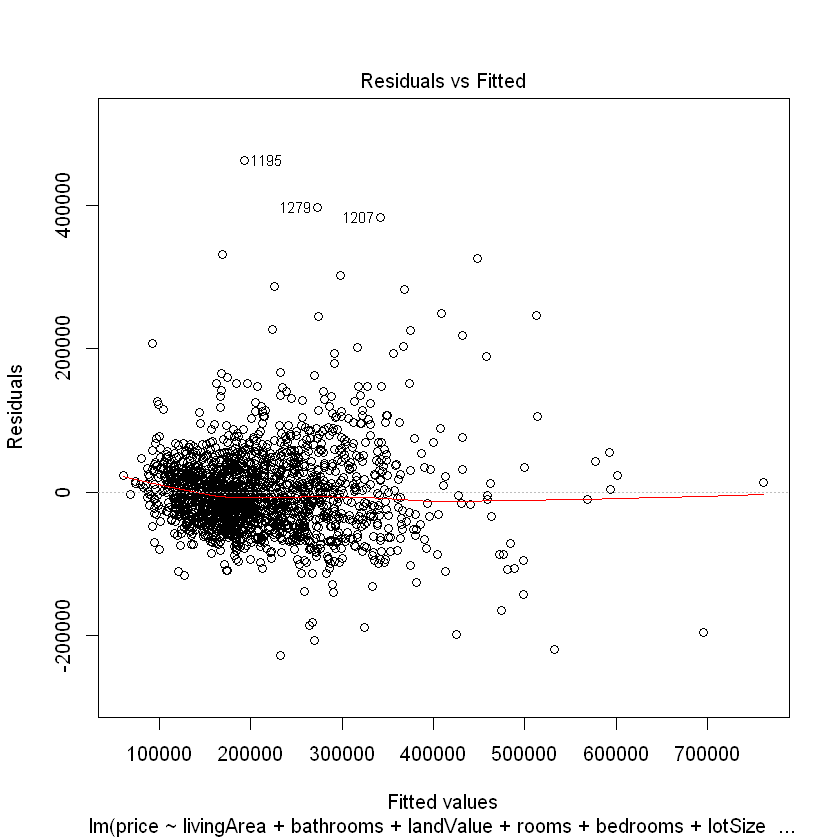

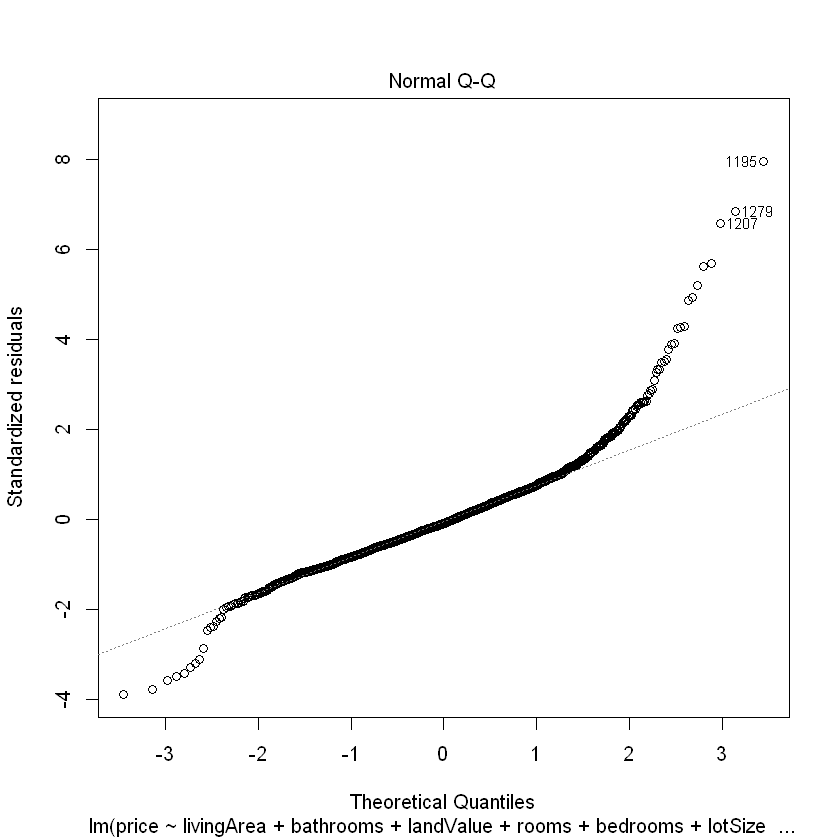

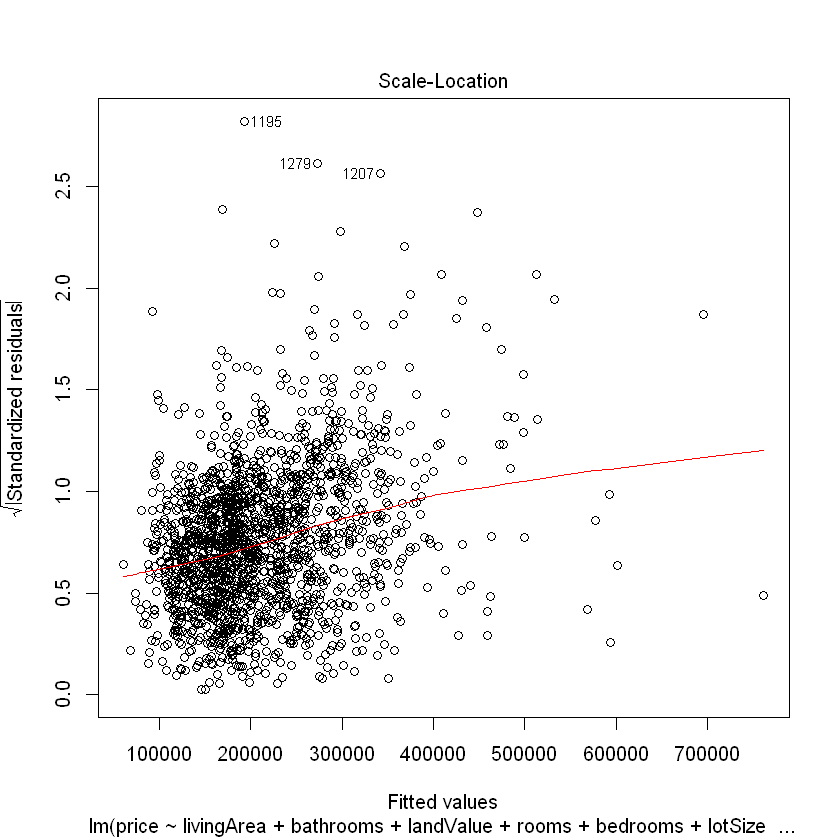

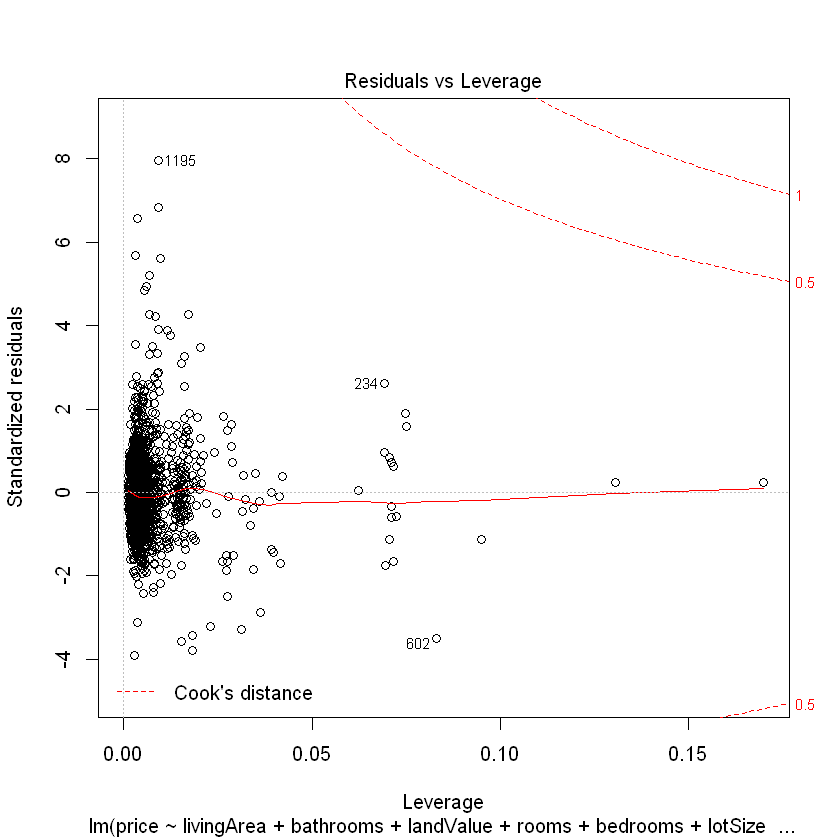

In [22]:
plot(lmfwd)

In [355]:
detach(data)

# Check Model

## Collinearity - Correlation between independent variables

In [28]:
data.corr2 <- cor(data[,c('lotSize', 'bathrooms', 'landValue', 'livingArea', 'age', 'centralAir.Yes', 'newConstruction.Yes', 'waterfront.Yes','bedrooms', 'rooms')])
data.corr2


lotSize   bathrooms landValue livingArea age     
lotSize              1.000000  0.084823  0.05922   0.163450  -0.01635
bathrooms            0.084823  1.000000  0.29750   0.718564  -0.36190
landValue            0.059222  0.297498  1.00000   0.423441  -0.02182
livingArea           0.163450  0.718564  0.42344   1.000000  -0.17424
age                 -0.016352 -0.361897 -0.02182  -0.174242   1.00000
centralAir.Yes      -0.009256  0.347227  0.23962   0.287312  -0.28115
newConstruction.Yes -0.011004  0.235389  0.24096   0.265637  -0.20619
waterfront.Yes      -0.005030 -0.004764  0.12410  -0.002694   0.02377
bedrooms             0.113982  0.458033  0.20245   0.656196   0.02712
rooms                0.137604  0.517585  0.29887   0.733666  -0.08226
                    centralAir.Yes newConstruction.Yes waterfront.Yes bedrooms
lotSize             -0.009256      -0.01100            -0.005030       0.11398
bathrooms            0.347227       0.23539            -0.004764       0.45803
landValue            0.239624       0.24096             0.124095       0.20245
livingArea           0.287312       0.26564            -0.002694       0.65620
age                 -0.281148      -0.20619             0.023769       0.02712
centralAir.Yes       1.000000       0.07516            -0.019567       0.07915
newConstruction.Yes  0.075156       1.00000            -0.020752       0.14235
waterfront.Yes      -0.019567      -0.02075             1.000000      -0.07114
bedrooms             0.079155       0.14235            -0.071138       1.00000
rooms                0.170811       0.19699            -0.036704       0.67186
                    rooms   
lotSize              0.13760
bathrooms            0.51758
landValue            0.29887
livingArea           0.73367
age                 -0.08226
centralAir.Yes       0.17081
newConstruction.Yes  0.19699
waterfront.Yes      -0.03670
bedrooms             0.67186
rooms                1.00000

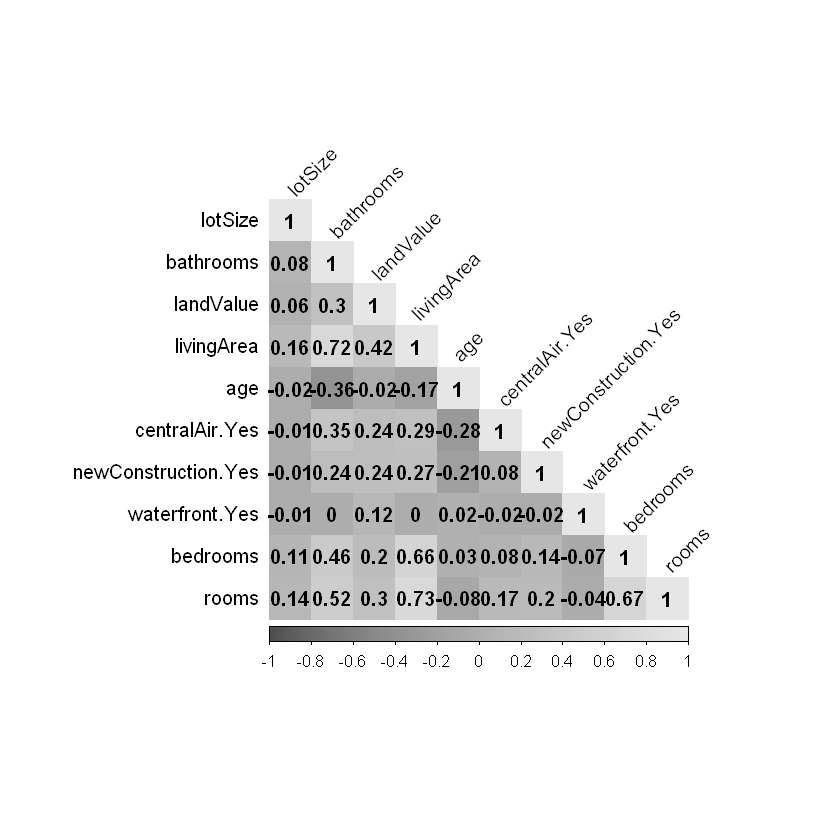

In [29]:
corrplot(data.corr2, type='lower', method='color', col=gray.colors(100), addCoef.col="black", tl.col="black", tl.srt=45)

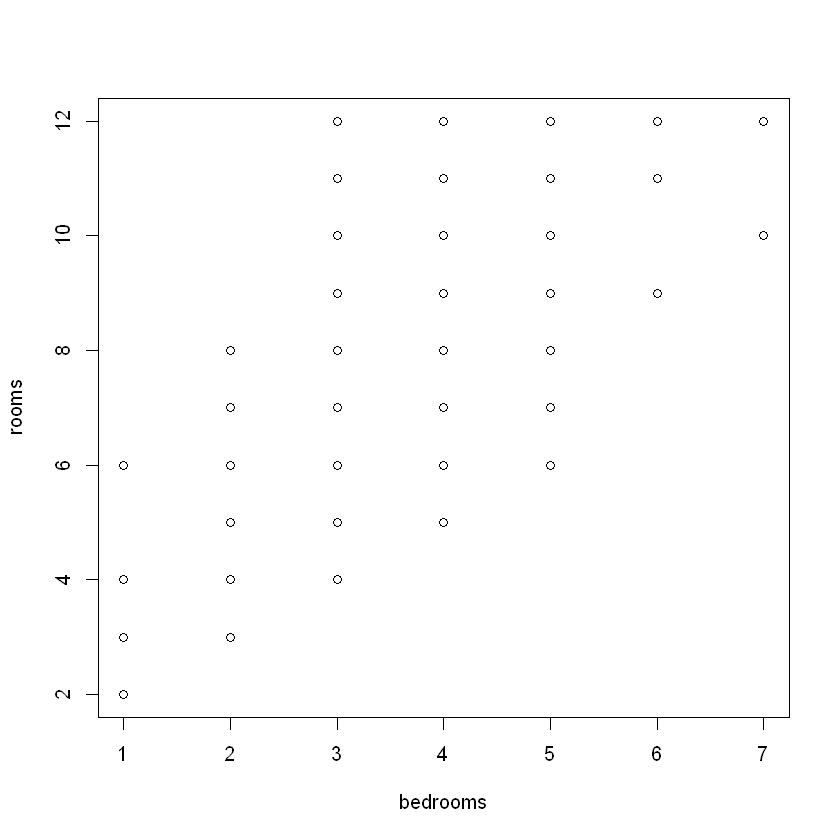

In [386]:
plot(bedrooms, rooms)

Identiying how correlation affect to the linear model 

In [30]:
lmtest1 <- lm(price ~ livingArea)
summary(lmtest1)

lmtest2 <- lm(price ~ livingArea + bedrooms)
summary(lmtest2)

lmtest3 <- lm(price ~ livingArea + rooms)
summary(lmtest3)

lmtest4 <- lm(price ~ livingArea + bedrooms + rooms)
summary(lmtest4)

lmtest5 <- lm(price ~ livingArea +  bathrooms)
summary(lmtest5)


Call:
lm(formula = price ~ livingArea)

Residuals:
    Min      1Q  Median      3Q     Max 
-277022  -39371   -7726   28350  553325 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 13439.39    4992.35    2.69              0.0072 ** 
livingArea    113.12       2.68   42.17 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69100 on 1726 degrees of freedom
Multiple R-squared:  0.507,	Adjusted R-squared:  0.507 
F-statistic: 1.78e+03 on 1 and 1726 DF,  p-value: <0.0000000000000002



Call:
lm(formula = price ~ livingArea + bedrooms)

Residuals:
    Min      1Q  Median      3Q     Max 
-283715  -39684   -7877   27524  548910 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  36667.90    6610.29    5.55          0.000000034 ***
livingArea     125.40       3.53   35.56 < 0.0000000000000002 ***
bedrooms    -14196.77    2675.16   -5.31          0.000000126 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68600 on 1725 degrees of freedom
Multiple R-squared:  0.515,	Adjusted R-squared:  0.515 
F-statistic:  917 on 2 and 1725 DF,  p-value: <0.0000000000000002



Call:
lm(formula = price ~ livingArea + rooms)

Residuals:
    Min      1Q  Median      3Q     Max 
-278181  -39807   -7204   28403  552047 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 11691.59    5521.25    2.12               0.034 *  
livingArea    110.97       3.95   28.11 <0.0000000000000002 ***
rooms         783.58    1056.57    0.74               0.458    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69100 on 1725 degrees of freedom
Multiple R-squared:  0.508,	Adjusted R-squared:  0.507 
F-statistic:  889 on 2 and 1725 DF,  p-value: <0.0000000000000002



Call:
lm(formula = price ~ livingArea + bedrooms + rooms)

Residuals:
    Min      1Q  Median      3Q     Max 
-290595  -39585   -7679   28205  542544 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  34421.15    6640.05    5.18          0.000000243 ***
livingArea     119.05       4.13   28.82 < 0.0000000000000002 ***
bedrooms    -17329.90    2874.91   -6.03          0.000000002 ***
rooms         3305.52    1126.48    2.93               0.0034 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68400 on 1724 degrees of freedom
Multiple R-squared:  0.518,	Adjusted R-squared:  0.517 
F-statistic:  617 on 3 and 1724 DF,  p-value: <0.0000000000000002



Call:
lm(formula = price ~ livingArea + bathrooms)

Residuals:
    Min      1Q  Median      3Q     Max 
-227717  -41083   -7543   28274  544253 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  -1362.7     5310.5   -0.26                  0.8    
livingArea      93.0        3.8   24.48 < 0.0000000000000002 ***
bathrooms    26386.9     3576.9    7.38     0.00000000000025 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68100 on 1725 degrees of freedom
Multiple R-squared:  0.523,	Adjusted R-squared:  0.522 
F-statistic:  944 on 2 and 1725 DF,  p-value: <0.0000000000000002


Independent variables rooms and bedrooms are elimitaed from the model as they have a strong correlation. livingArea seems to be a better predictor for the house price

In [387]:
lmfwd2 <- lm(price ~ livingArea + bathrooms + landValue + lotSize 
                + newConstruction.Yes + waterfront.Yes + centralAir.Yes )

summary(lmfwd2)


Call:
lm(formula = price ~ livingArea + bathrooms + landValue + lotSize + 
    newConstruction.Yes + waterfront.Yes + centralAir.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-219274  -30613   -3873   28112  196601 

Coefficients:
                       Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)          21410.9937   4090.4336    5.23       0.000000186788 ***
livingArea              58.0961      3.0308   19.17 < 0.0000000000000002 ***
bathrooms            24948.8193   2614.4659    9.54 < 0.0000000000000002 ***
landValue                0.7412      0.0425   17.43 < 0.0000000000000002 ***
lotSize               8158.6839   1849.3952    4.41       0.000010929475 ***
newConstruction.Yes -17404.2389   5896.8716   -2.95               0.0032 ** 
waterfront.Yes      111730.5667  15763.7379    7.09       0.000000000002 ***
centralAir.Yes       12828.0641   2596.3356    4.94       0.000000857019 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' 

In [388]:
lmfwd3 <- lm(price ~ livingArea + bathrooms + landValue + lotSize +  waterfront.Yes + centralAir.Yes )

summary(lmfwd3)


Call:
lm(formula = price ~ livingArea + bathrooms + landValue + lotSize + 
    waterfront.Yes + centralAir.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-218164  -31320   -3971   27692  195566 

Coefficients:
                  Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)     24137.4727   3994.0726    6.04       0.000000001863 ***
livingArea         56.9381      3.0123   18.90 < 0.0000000000000002 ***
bathrooms       24385.2366   2613.5801    9.33 < 0.0000000000000002 ***
landValue           0.7168      0.0418   17.14 < 0.0000000000000002 ***
lotSize          8472.5697   1850.6519    4.58       0.000005042862 ***
waterfront.Yes 112028.3903  15800.2727    7.09       0.000000000002 ***
centralAir.Yes  13151.4890   2600.0873    5.06       0.000000470785 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 47200 on 1647 degrees of freedom
Multiple R-squared:  0.611,	Adjusted R-squared:  0.609 
F-statistic:  431 on

In [398]:
# Bathroom has been removed as it has a strong correlation with livingArea.

lmfwd4 <- lm(price ~ livingArea + landValue + lotSize +  waterfront.Yes + centralAir.Yes )

summary(lmfwd4)


Call:
lm(formula = price ~ livingArea + landValue + lotSize + waterfront.Yes + 
    centralAir.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-213188  -31231   -4395   27964  190760 

Coefficients:
                  Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)     37609.0560   3819.9465    9.85 < 0.0000000000000002 ***
livingArea         75.1133      2.3569   31.87 < 0.0000000000000002 ***
landValue           0.6997      0.0429   16.33 < 0.0000000000000002 ***
lotSize          7835.4119   1897.0614    4.13      0.0000380461629 ***
waterfront.Yes 110569.9264  16206.7477    6.82      0.0000000000125 ***
centralAir.Yes  18212.6156   2608.4190    6.98      0.0000000000042 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 48400 on 1648 degrees of freedom
Multiple R-squared:  0.59,	Adjusted R-squared:  0.589 
F-statistic:  475 on 5 and 1648 DF,  p-value: <0.0000000000000002


In [399]:
# lotSize has been removed 
lmfwd5 <- lm(price ~ livingArea + landValue + waterfront.Yes + centralAir.Yes )

summary(lmfwd5)


Call:
lm(formula = price ~ livingArea + lotSize + waterfront.Yes + 
    centralAir.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-231154  -33693   -4277   30030  209965 

Coefficients:
                Estimate Std. Error t value             Pr(>|t|)    
(Intercept)     36339.84    4115.17    8.83 < 0.0000000000000002 ***
livingArea         88.05       2.39   36.81 < 0.0000000000000002 ***
lotSize          7048.94    2043.44    3.45              0.00058 ***
waterfront.Yes 117553.95   17456.80    6.73       0.000000000023 ***
centralAir.Yes  23739.53    2786.82    8.52 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 52200 on 1649 degrees of freedom
Multiple R-squared:  0.524,	Adjusted R-squared:  0.523 
F-statistic:  454 on 4 and 1649 DF,  p-value: <0.0000000000000002


In [33]:
lmtest <- lm (price ~ livingArea + bedrooms)

In [34]:
summary(lmtest)


Call:
lm(formula = price ~ livingArea + bedrooms)

Residuals:
    Min      1Q  Median      3Q     Max 
-283715  -39684   -7877   27524  548910 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  36667.90    6610.29    5.55          0.000000034 ***
livingArea     125.40       3.53   35.56 < 0.0000000000000002 ***
bedrooms    -14196.77    2675.16   -5.31          0.000000126 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68600 on 1725 degrees of freedom
Multiple R-squared:  0.515,	Adjusted R-squared:  0.515 
F-statistic:  917 on 2 and 1725 DF,  p-value: <0.0000000000000002


In [31]:
# Waterfront can be removed as it is only significant for more expensive houses (outliers will be removed)
lmfwd6 <- lm(price ~ livingArea +  landValue + age + centralAir.Yes )

summary(lmfwd6)


Call:
lm(formula = price ~ livingArea + landValue + age + centralAir.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-224638  -37072   -7352   27444  473995 

Coefficients:
                Estimate Std. Error t value             Pr(>|t|)    
(Intercept)    30139.778   4971.363    6.06         0.0000000016 ***
livingArea        85.246      2.703   31.54 < 0.0000000000000002 ***
landValue          0.937      0.047   19.93 < 0.0000000000000002 ***
age             -220.681     52.998   -4.16         0.0000328190 ***
centralAir.Yes 16334.848   3325.330    4.91         0.0000009857 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 61100 on 1723 degrees of freedom
Multiple R-squared:  0.615,	Adjusted R-squared:  0.614 
F-statistic:  689 on 4 and 1723 DF,  p-value: <0.0000000000000002


In [32]:
lmFinal <- lmfwd6

## Linearity

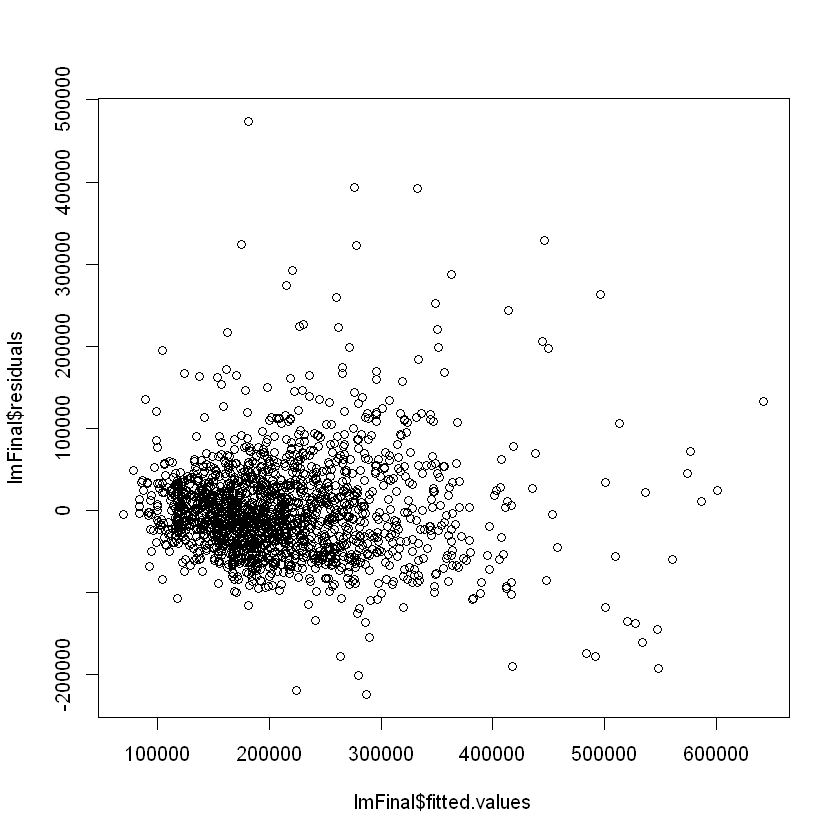

In [35]:
# residuals are randmly distributed. there is not a visible pattern. 
plot(x=lmFinal$fitted.values, y=lmFinal$residuals)


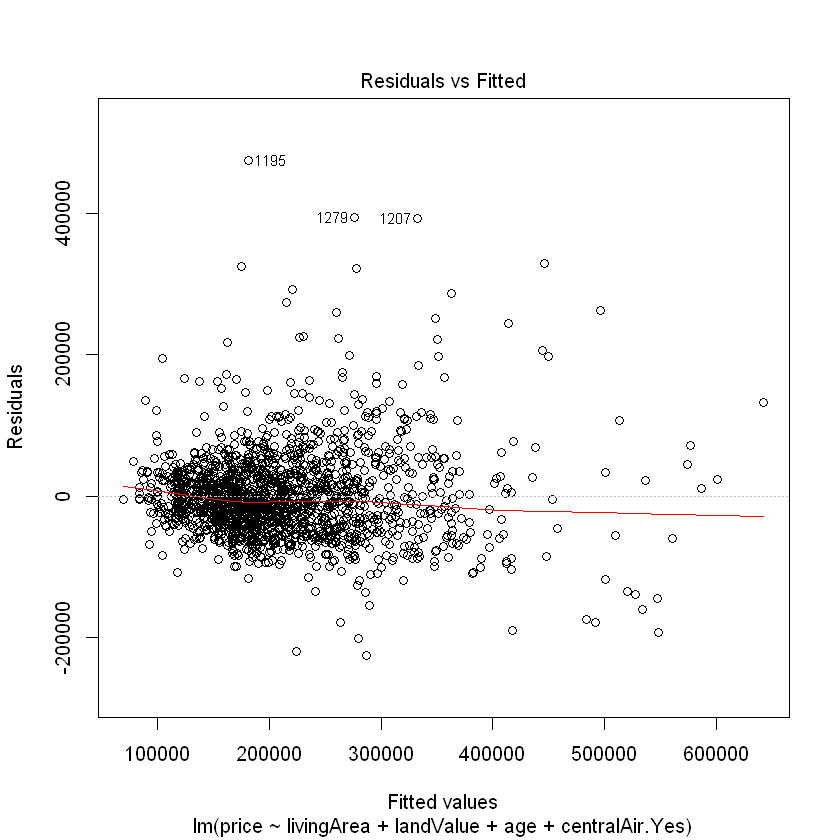

In [36]:
plot(lmFinal, which=1)

# It looks like an straight horizontal line. No trends can be observed

## Erros are normally distributed

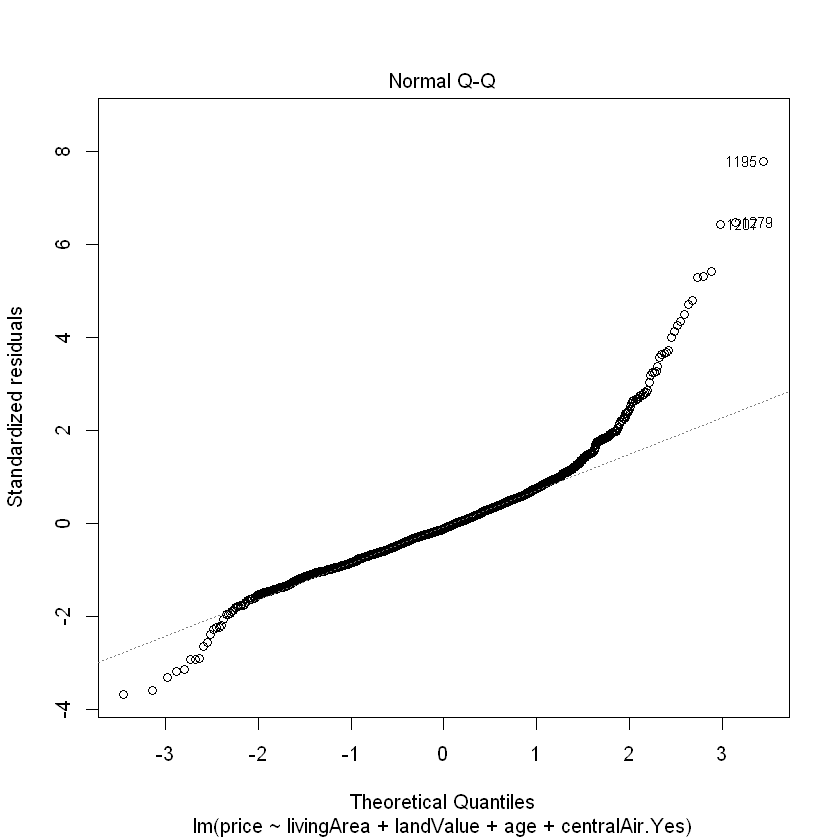

In [37]:
plot(lmFinal, which=2)

# Outliers might affecting the extremes of the distribution

## Heterocedasticity

In [25]:
names(lmFinal)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [26]:
lmFinal$residuals

1         2         3         4         5         6         7         8 
  -9507.0  -28867.5  -87214.7  -51077.6  -40741.9  -12463.2 -128010.4   -7767.0 
        9        10        11        12        13        14        15        16 
 -91707.9  -38975.0   40777.3  -61091.9     696.7  -46317.7   -6606.8  -13646.1 
       17        18        19        20        21        22        23        24 
  21393.2  -76678.7  -47683.3  -44366.2   -7361.2  -59636.1  -35184.1  -56253.9 
       25        26        27        28        29        30        31        32 
 -73790.1   29554.9  -34799.7   19175.3   92739.8  -52429.2  -17778.2   -8497.5 
       33        34        35        36        37        38        39        40 
 -20605.9   21010.6  -30350.2  -34373.6   -3335.8  -29697.5   64586.6  -22295.2 
       41        42        43        44        45        46        47        48 
  -1726.7  -40094.4  -47719.7  -14671.2    4257.6  -25809.5   21412.8  -20609.8 
       49        50        51        52        53        54        55        56 
 -69991.6  -19129.5  -68565.9  -86037.9  -14351.0  -27083.1  -84966.5   -9218.8 
       57        58        59        60        61        62        63        64 
 -81582.3  -61130.0  -39707.3  -22976.3  -10902.1  -58710.9  -69991.2  -45635.9 
       65        66        67        68        69        70        71        72 
  42443.8  -51015.8   19888.0  -41509.0   24761.3   -4925.2  -12623.2  -58403.0 
       73        74        75        76        77        78        79        80 
 -71078.2  -23467.1  -66731.4  -28623.4  -35537.9  -62525.7  -37814.6  -17079.2 
       81        82        83        84        85        86        87        88 
 -36537.9  -51456.8  -46537.9  -14178.3   15371.7  -63147.6   94908.8  -70701.7 
       89        90        91        92        93        94        95        96 
 -11329.1  -65716.6  -31392.9  -51482.9  -78704.9  -27016.5  -35716.6  -81924.3 
       97        98        99       100       101       102       103       104 
 -18447.7   27007.6  -17869.2  -65782.6  -14936.5    2642.9  -59773.5   -9074.2 
      105       106       107       108       109       110       111       112 
 -36220.3   46296.1  -67804.8    3189.6  -75756.8  -22878.6  -18855.7  -48770.0 
      113       114       115       116       117       118       119       120 
  -2567.5  -60487.1  -14487.5  -17476.1   16239.9   34814.7   35971.4   33957.5 
      121       122       123       124       125       126       127       128 
 -39627.1  -57649.8    6081.1  -11596.0  -70100.3  -33510.5    8895.8   38839.7 
      129       130       131       132       133       134       135       136 
 -12202.6  -20980.6  -26247.2  -10556.1 -229856.3  -28607.0  -12125.6  -84564.7 
      137       138       139       140       141       142       143       144 
 -37210.0  -18111.5  -26522.5  -37240.7 -187885.9  -62425.8  -35223.3  -44460.3 
      145       146       147       148       149       150       151       152 
 -30644.2  -94496.8 -139863.1  -63098.8  -73193.4  -40390.8  -29102.3  -35951.8 
      153       154       155       156       157       158       159       160 
 -44914.3  -48597.7  -47320.5  -25196.5  -63110.3  -44610.1  -62034.7  -31947.4 
      161       162       163       164       165       166       167       168 
   3787.7  -14394.5  -62711.0   18986.4 -121026.7  -64918.5    5173.7  -46860.2 
      169       170       171       172       173       174       175       176 
 -16476.1  -59032.8  -38149.5  -40105.2  -20475.9  -40908.6   17052.3  -48648.2 
      177       178       179       180       181       182       183       184 
 -28029.3   41434.4  -10363.6  -39034.2   17159.6   40160.9    9449.7   22579.7 
      185       186       187       188       189       190       191       192 
 -46884.8  -31252.8  -32185.7  -71636.1   -8040.5   42432.8  -93490.7    1732.8 
      193       194       195       196       197       198       199       200 
 -14577.1  -32849.9  -23860.0  -18860.4

In [28]:
normalise <- function (x) {(x-mean(x))/sd(x)}

In [30]:
# Normalise resiauls
nres <- normalise(lmFinal$residuals)
nres

1         2         3         4         5         6         7         8 
-0.157760 -0.479029 -1.447247 -0.847585 -0.676075 -0.206815 -2.124215 -0.128887 
        9        10        11        12        13        14        15        16 
-1.521807 -0.646755  0.676662 -1.013763  0.011561 -0.768600 -0.109633 -0.226444 
       17        18        19        20        21        22        23        24 
 0.355001 -1.272412 -0.791261 -0.736217 -0.122152 -0.989606 -0.583847 -0.933482 
       25        26        27        28        29        30        31        32 
-1.224478  0.490436 -0.577469  0.318196  1.538931 -0.870014 -0.295013 -0.141009 
       33        34        35        36        37        38        39        40 
-0.341936  0.348652 -0.503633 -0.570398 -0.055355 -0.492803  1.071754 -0.369968 
       41        42        43        44        45        46        47        48 
-0.028654 -0.665330 -0.791864 -0.243455  0.070651 -0.428285  0.355326 -0.342001 
       49        50        51        52        53        54        55        56 
-1.161447 -0.317437 -1.137787 -1.427719 -0.238141 -0.449419 -1.409941 -0.152978 
       57        58        59        60        61        62        63        64 
-1.353782 -1.014396 -0.658906 -0.381271 -0.180910 -0.974253 -1.161439 -0.757286 
       65        66        67        68        69        70        71        72 
 0.704315 -0.846560  0.330023 -0.688803  0.410890 -0.081730 -0.209471 -0.969144 
       73        74        75        76        77        78        79        80 
-1.179477 -0.389415 -1.107345 -0.474978 -0.589718 -1.037556 -0.627498 -0.283414 
       81        82        83        84        85        86        87        88 
-0.606312 -0.853878 -0.772253 -0.235276  0.255080 -1.047875  1.574924 -1.173229 
       89        90        91        92        93        94        95        96 
-0.187995 -1.090507 -0.520937 -0.854311 -1.306034 -0.448313 -0.592684 -1.359458 
       97        98        99       100       101       102       103       104 
-0.306123  0.448165 -0.296522 -1.091602 -0.247858  0.043857 -0.991887 -0.150577 
      105       106       107       108       109       110       111       112 
-0.601043  0.768241 -1.125158  0.052929 -1.257114 -0.379649 -0.312892 -0.809293 
      113       114       115       116       117       118       119       120 
-0.042606 -1.003728 -0.240407 -0.290000  0.269486  0.577717  0.596912  0.563493 
      121       122       123       124       125       126       127       128 
-0.657574 -0.956645  0.100910 -0.192426 -1.163250 -0.556076  0.147617  0.644509 
      129       130       131       132       133       134       135       136 
-0.202492 -0.348153 -0.435548 -0.175169 -3.814253 -0.474706 -0.201213 -1.403273 
      137       138       139       140       141       142       143       144 
-0.617465 -0.300544 -0.440116 -0.617976 -3.117793 -1.035898 -0.584498 -0.737777 
      145       146       147       148       149       150       151       152 
-0.508512 -1.568087 -2.320899 -1.047066 -1.214577 -0.670249 -0.482926 -0.596586 
      153       154       155       156       157       158       159       160 
-0.745312 -0.806434 -0.785240 -0.418112 -1.047258 -0.740263 -1.029409 -0.530137 
      161       162       163       164       165       166       167       168 
 0.062853 -0.238864 -1.040631  0.315061 -2.008325 -1.077262  0.085852 -0.777602 
      169       170       171       172       173       174       175       176 
-0.273405 -0.979595 -0.633056 -0.665509 -0.339778 -0.678840  0.282968 -0.807271 
      177       178       179       180       181       182       183       184 
-0.465120  0.687566 -0.171974 -0.647737  0.284747  0.666433  0.156809  0.374689 
      185       186       187       188       189       190       191       192 
-0.778010 -0.518611 -0.534092 -1.188735 -0.133424  0.704133 -1.551391  0.028755 
      193       194       195       196       197       198       199       200 
-0.241894 -0.545114 -0.395934 -0.312971

In [31]:
mean(nres)
sd(nres)

[1] 0.000000000000000004275

[1] 1

In [32]:
npred <- normalise(lmFinal$fitted.values)
npred

1         2         3         4         5         6         7         8 
-0.898757 -0.025491 -0.202363 -0.075657 -1.094094 -1.021365  0.886990 -0.439356 
        9        10        11        12        13        14        15        16 
-0.388729 -0.643517  0.928257 -0.396642 -1.629016 -0.881919 -1.006673 -1.392856 
       17        18        19        20        21        22        23        24 
-1.006673  1.521856 -1.339706 -1.029033 -1.189683 -0.609330 -0.361607 -0.073391 
       25        26        27        28        29        30        31        32 
-0.613776  0.093504 -0.541710 -1.106647  1.956482 -0.250994 -0.824615 -0.211576 
       33        34        35        36        37        38        39        40 
 0.483543 -0.076790 -0.022052 -0.098831  0.016304 -0.158904  0.211288  0.722355 
       41        42        43        44        45        46        47        48 
-0.683962  0.297117 -0.183029  0.483097  0.813531  0.775211 -1.405175 -0.685464 
       49        50        51        52        53        54        55        56 
 1.901645 -1.089885 -0.109208 -0.789163 -0.714483 -0.769311 -0.501027 -0.870342 
       57        58        59        60        61        62        63        64 
-0.518810 -0.780271 -0.582722 -0.179732 -0.553242 -0.786940 -0.760215 -0.338266 
       65        66        67        68        69        70        71        72 
-1.071557  0.509877 -1.192884  0.700693 -0.703079  0.022168 -0.171421 -0.778048 
       73        74        75        76        77        78        79        80 
 1.496618 -0.353282 -0.683903  0.355325 -0.789163 -0.468150  0.541465 -0.640894 
       81        82        83        84        85        86        87        88 
-0.789163 -0.275691 -0.789163 -0.358277 -0.635125 -0.203225 -1.565708 -0.337421 
       89        90        91        92        93        94        95        96 
-1.292870 -0.375769 -0.392775  0.347071 -0.337380 -0.745759 -0.375769 -0.874126 
       97        98        99       100       101       102       103       104 
-1.188572 -1.226537 -1.036704 -0.897529 -1.118058 -1.626527 -0.567740 -1.130421 
      105       106       107       108       109       110       111       112 
-0.382146 -0.427320 -0.079161  0.037431 -1.428689 -0.990335 -1.035593 -0.850415 
      113       114       115       116       117       118       119       120 
-1.135645 -1.101735  0.353554 -0.031996 -0.895506  0.002809 -0.695796 -1.405749 
      121       122       123       124       125       126       127       128 
-1.250502 -1.404371  0.320556 -1.417908  0.207265 -0.057247 -0.910355 -1.171067 
      129       130       131       132       133       134       135       136 
-0.779826 -1.362223 -1.075527 -0.339291  1.238297  0.631012 -1.362223 -0.096377 
      137       138       139       140       141       142       143       144 
-0.369432 -0.884568 -0.648046 -0.221298  1.424955 -0.085315  1.068295 -1.059942 
      145       146       147       148       149       150       151       152 
-0.012146  0.591339  0.441883 -0.435094 -0.305410 -0.469882  0.206006 -0.475523 
      153       154       155       156       157       158       159       160 
 0.500352 -0.557152  0.531006  1.133469 -0.126623 -0.995068 -0.128879 -0.093388 
      161       162       163       164       165       166       167       168 
-1.024587  0.930465  0.317885  1.901927  3.745608 -0.027598  1.705534 -0.412465 
      169       170       171       172       173       174       175       176 
-1.034046  0.758167  0.693660 -0.095856  1.907865 -0.400282  0.653657  0.792408 
      177       178       179       180       181       182       183       184 
-0.506644  1.404267  0.583204 -0.680012 -1.196373 -0.303539 -0.753032 -0.058406 
      185       186       187       188       189       190       191       192 
-0.633114 -0.073406  1.069200  0.072834  0.012510  0.136182  0.629800 -0.111761 
      193       194       195       196       197       198       199       200 
-0.351868 -0.040041 -0.720791 -0.996991

In [33]:
mean(npred)
sd(npred)

[1] 0.0000000000000001411

[1] 1

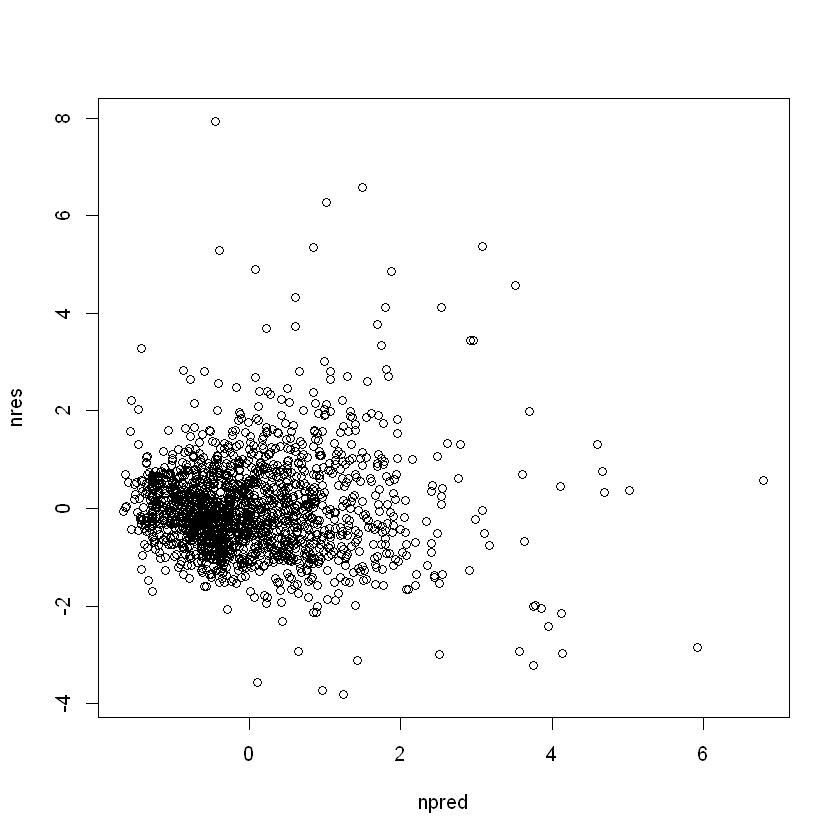

In [34]:
plot(x=npred, y=nres)

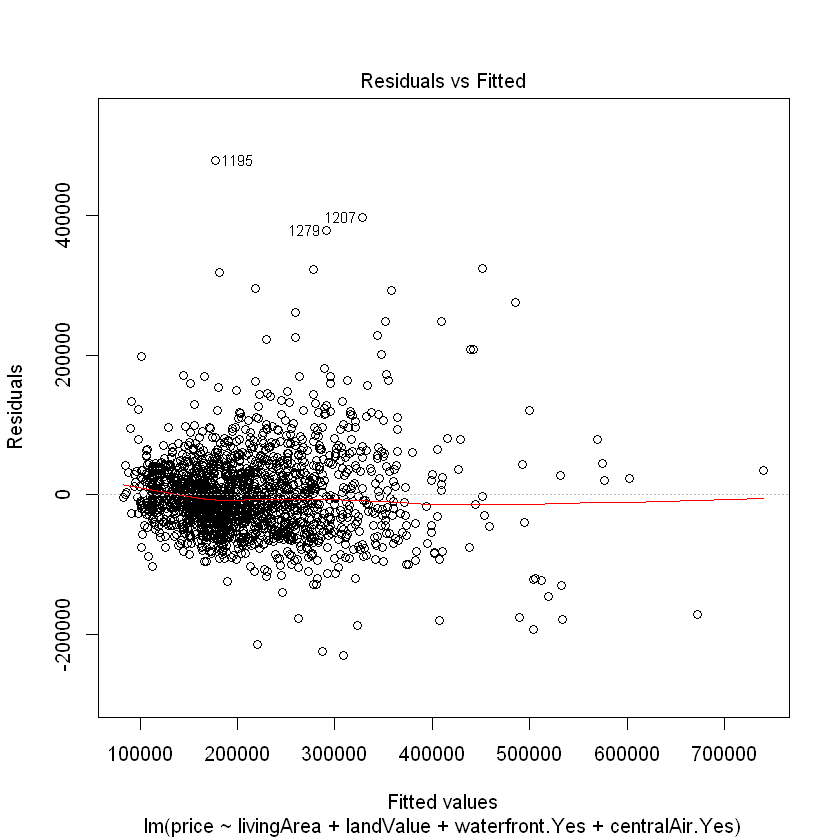

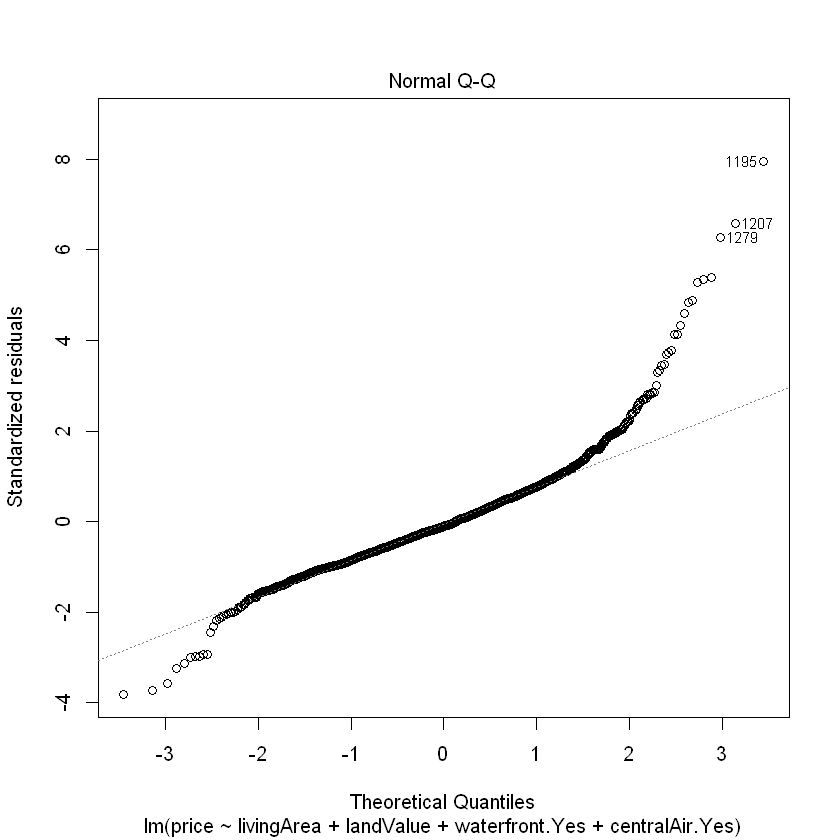

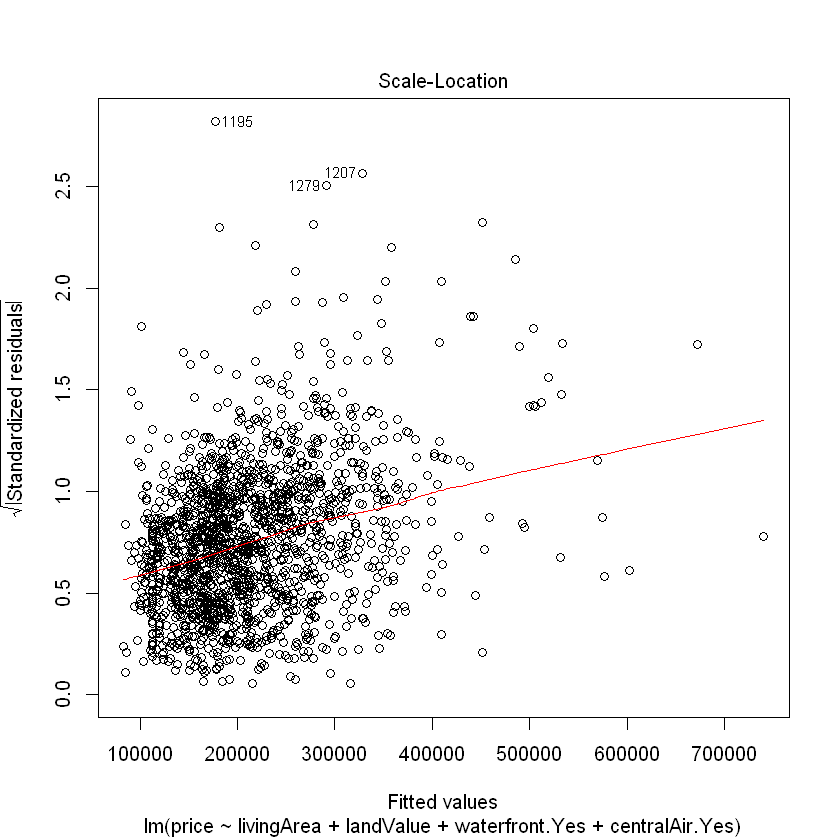

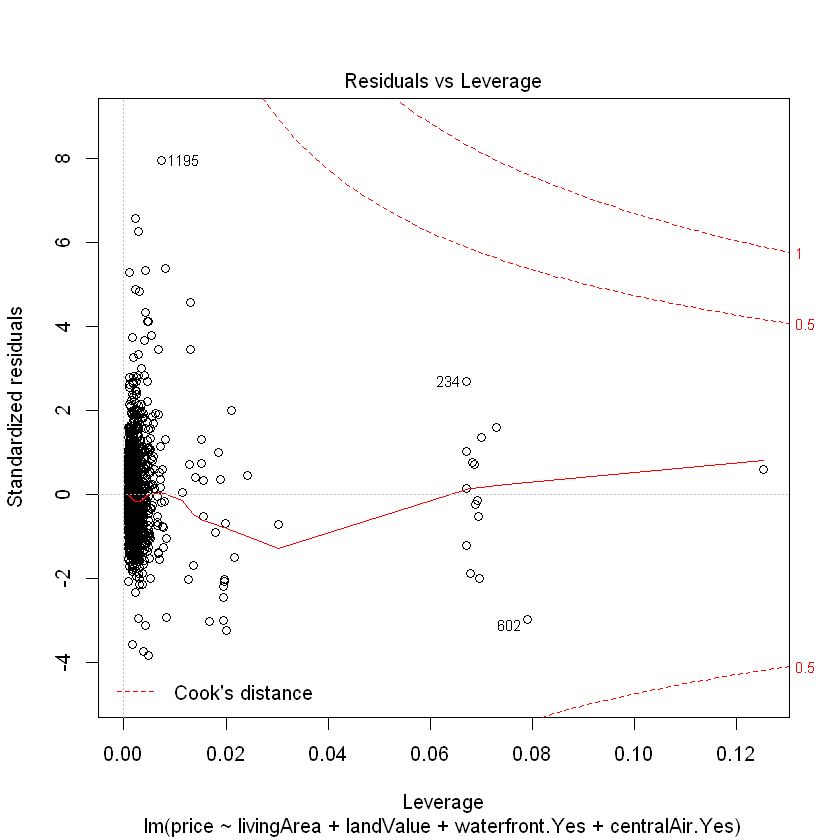

In [35]:
plot(lmFinal)

## Test of constant variance

In [36]:
#install.packages('car',  dependencies=TRUE)
#library(car)

Non-Significant test score meand we have meet the constant variance assumption

In [388]:
ncvTest(lmFinal)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 353.9, Df = 1, p = <0.0000000000000002

In [ ]:
NOT GOOD. 

## Checking for Autocoreelation between errors

In [391]:
durbinWatsonTest(lmFinal)

 lag Autocorrelation D-W Statistic p-value
   1          0.1412         1.716       0
 Alternative hypothesis: rho != 0

In [392]:
vif(lmFinal)

livingArea      landValue            age centralAir.Yes 
         1.297          1.253          1.107          1.188

In [40]:
cooks.distance(lmFinal)

1              2              3              4              5 
0.000013054758 0.000055108997 0.000648220344 0.000179550306 0.000345497416 
             6              7              8              9             10 
0.000011014450 0.003205996514 0.000003461644 0.000436041621 0.000082956370 
            11             12             13             14             15 
0.000432638566 0.000193072209 0.000000061676 0.000146403949 0.000003218032 
            16             17             18             19             20 
0.000017979512 0.000033741546 0.000913314031 0.000216213647 0.000150111938 
            21             22             23             24             25 
0.000004389462 0.000235627462 0.000163852986 0.000332922557 0.000363891612 
            26             27             28             29             30 
0.000109490355 0.000081794172 0.000027549921 0.040122984307 0.000312139094 
            31             32             33             34             35 
0.000020952141 0.000004782694 0.000035402534 0.000025919468 0.000074431777 
            36             37             38             39             40 
0.000126414544 0.000000940140 0.000057952216 0.000273023896 0.000069035828 
            41             42             43             44             45 
0.000000166056 0.000156063774 0.000246651297 0.000018799798 0.000002139222 
            46             47             48             49             50 
0.000132744014 0.000051891534 0.000025765353 0.020766794399 0.000029800248 
            51             52             53             54             55 
0.000594059631 0.000518288544 0.000011779298 0.000043707087 0.001024021451 
            56             57             58             59             60 
0.000005411480 0.000966400487 0.000257166483 0.000098406434 0.000028087087 
            61             62             63             64             65 
0.000016219432 0.000240295401 0.000326767433 0.000267241402 0.000158066704 
            66             67             68             69             70 
0.000262911834 0.000031966802 0.000269455261 0.000037064038 0.000002374293 
            71             72             73             74             75 
0.000015434591 0.000233736383 0.001083859595 0.000069374937 0.000284477136 
            76             77             78             79             80 
0.000068046550 0.000088425015 0.000519098478 0.000150409287 0.000015866097 
            81             82             83             84             85 
0.000093471412 0.000209868517 0.000151637055 0.000014177782 0.000013196685 
            86             87             88             89             90 
0.000486707970 0.001057113807 0.000629251688 0.000011329409 0.000234681188 
            91             92             93             94             95 
0.000052805024 0.000288140220 0.000343873438 0.000042051717 0.000069321604 
            96             97             98             99            100 
0.000420832895 0.000027552476 0.000071500424 0.000022824174 0.000301769201 
           101            102            103            104            105 
0.000044662213 0.000000872147 0.000235154164 0.000006274416 0.000108673640 
           106            107            108            109            110 
0.000169410212 0.000634162714 0.000001275196 0.000570835936 0.000036703114 
           111            112            113            114            115 
0.000025379393 0.000160094188 0.000000508834 0.000276883705 0.000032262551 
           116            117            118            119            120 
0.000041411932 0.000017963986 0.000162251767 0.000088663338 0.000114812905 
           121            122            123            124            125 
0.000134932408 0.000327025090 0.000006315401 0.000013421372 0.000737319214 
           126            127            128            129            130 
0.000128818325 0.000005328112 0.000118880085 0.000009453088 0.000046850024 
           131            132            133            134  

StudRes Hat      CookD  
234   2.6996 0.067042 0.10436
602  -2.9812 0.079107 0.15200
702   0.6073 0.125328 0.01057
1195  8.1032 0.007322 0.09336
1207  6.6664 0.002254 0.01959

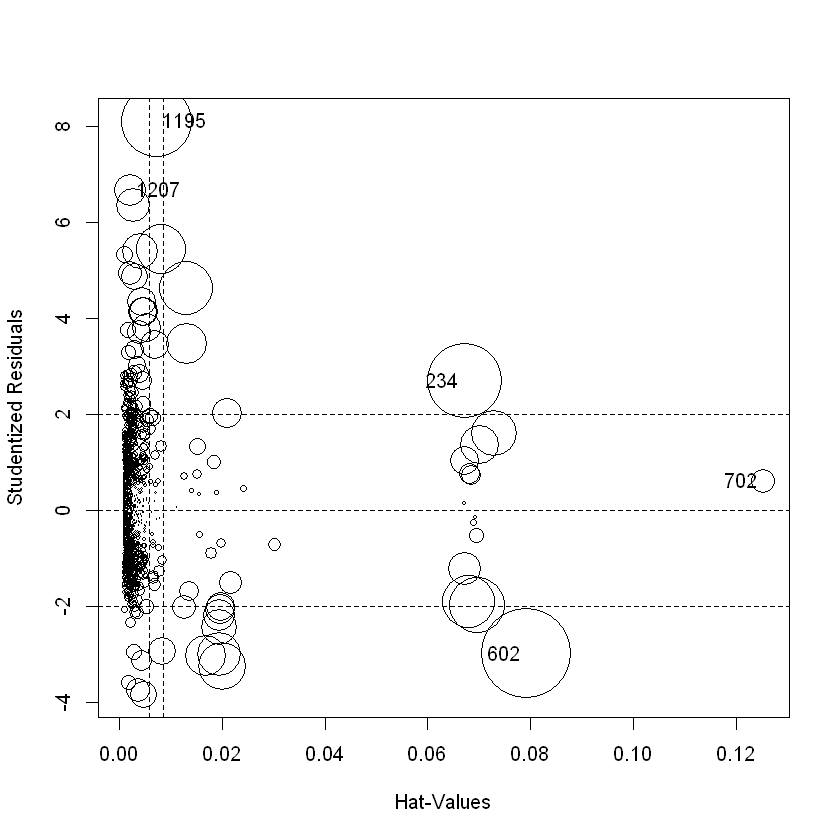

In [41]:
influencePlot(lmFinal)

# Adding modifications to model

## Removing Outliers

Check that we are working with correct data. Original data set contains 1728 rows

In [38]:
head(data)
nrow(data)

price  lotSize age landValue livingArea pctCollege bedrooms fireplaces
1 132500 0.09     42 50000      906       35         2        1         
2 181115 0.92      0 22300     1953       51         3        0         
3 109000 0.19    133  7300     1944       51         4        1         
4 155000 0.41     13 18700     1944       51         3        1         
5  86060 0.11      0 15000      840       51         2        0         
6 120000 0.68     31 14000     1152       22         4        1         
  bathrooms rooms heating.electric heating.hot air fuel.electric fuel.gas
1 1.0       5     1                0               1             0       
2 2.5       6     0                0               0             1       
3 1.0       8     0                0               0             1       
4 1.5       5     0                1               0             1       
5 1.0       3     0                1               0             1       
6 1.0       8     0                1               0             1       
  sewer.none sewer.septic waterfront.Yes newConstruction.Yes centralAir.Yes
1 0          1            0              0                   0             
2 0          1            0              0                   0             
3 0          0            0              0                   0             
4 0          1            0              0                   0             
5 0          0            0              1                   1             
6 0          1            0              0                   0

[1] 1728

Identify outliers and keep them in variable outliers. 53 Outliers are identified

[1] 457000 490000 625000 435000 520000 512971 559000 760000 496000 620000
[11] 549254 500075 649000 449000 476000 465000 600000 597185 518000 775000
[21] 650000 470000 647000 535000 500000 460000 475000 454900 445000 431250
[31] 600000 655000 775000 725000 620000 485000 650000 658300 571000 455000
[41] 670000 440000 432600 525000 453935 463000 440760 451000 508000 454900
[51] 455000 469900 436023

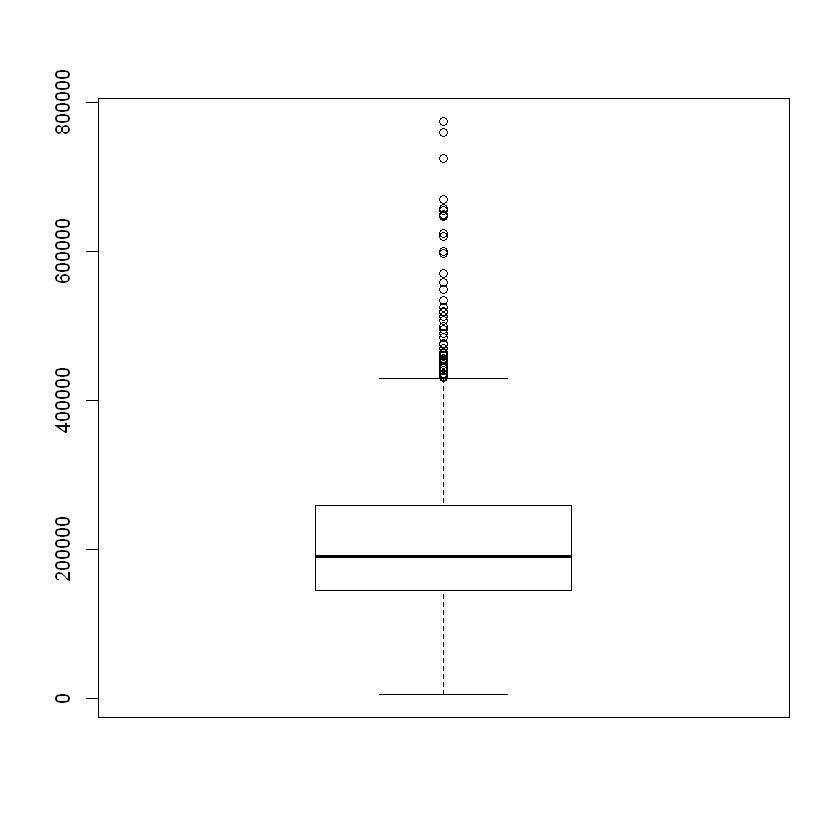

In [39]:
outliers1 <- boxplot(data$price)$out
outliers1


Inspection of outliers

In [40]:
data[which(data$price %in% outliers1), ]
nrow(data[which(data$price %in% outliers1), ])

price  lotSize age landValue livingArea pctCollege bedrooms fireplaces
29   457000  0.43    53   2700    2461       39         4        1         
234  490000  0.34    18  79700    1346       52         3        1         
314  625000  0.45    14 119500    5228       64         4        4         
435  435000  1.00    25  25000    4211       57         5        2         
478  520000  0.41    13   3100    2702       47         3        1         
549  512971  0.01     0  12500    1904       57         2        1         
554  559000  0.24    55 255000    3090       57         4        2         
571  760000  1.22     2 194700    3148       57         5        0         
579  496000  0.34     3  82400    3467       57         4        1         
591  620000  1.06    14 125100    4856       57         5        2         
592  549254  0.25     0  63000    2885       57         3        1         
602  500075  0.91     0 239300    3400       57         3        0         
612  649000  1.04    10 192900    4128       57         3        2         
626  449000  1.00    20 124800    3457       57         3        2         
629  476000  0.42     4  87200    2246       57         3        1         
639  465000  0.25    22  61000    2310       57         2        1         
666  600000  0.04    17  36000    3191       57         3        2         
685  597185  1.07     0 193200    4210       57         4        1         
687  518000  0.17   144  99000    2847       57         3        1         
702  775000  0.00     5 412600    2472       57         3        1         
711  650000  0.43     2  87800    2754       57         3        1         
716  470000  0.17   135  99000    2096       57         3        2         
726  647000  1.08    14 193300    2640       57         4        1         
730  535000  1.00    14 192500    3254       57         4        1         
844  500000  1.00    70  35900    1492       63         3        0         
941  460000  0.47     1  14100    3336       63         4        1         
962  475000 12.20    19 111300    2599       63         3        1         
982  454900  0.50     2  15000    3242       63         4        1         
987  445000  0.58     0  17400    3157       63         4        1         
1060 431250  0.53    10  65800    2522       63         4        1         
1170 600000  0.99     1   5000    2660       62         4        1         
1195 655000  0.19    55 103000     780       62         2        0         
1202 775000  0.48    31  72600    3968       62         5        4         
1207 725000  0.21     3  70600    2586       62         4        1         
1217 620000  0.53    23 225800    3250       62         3        2         
1225 485000  0.24    17  60200    1908       62         4        1         
1239 650000  0.34     3  82400    3770       62         4        1         
1246 658300  0.69     3 101500    3208       62         4        1         
1254 571000  1.00    14 128500    2186       62         3        0         
1275 455000  0.25    23  61000    2310       62         2        1         
1279 670000  0.11   121  87000    2247       62         4        0         
1286 440000  0.19     3  97300    1702       52         2        0         
1306 432600  0.54     1  20400    2346       62         4        0         
1326 525000  0.46     1  70100    2876       64         5        1         
1330 453935  0.58     1 233000    2879       64         4        1         
1348 463000  0.64     3 153800    2885       64         4        1         
1420 440760  0.38     0  13000    2917       64         4        1         
1492 451000  2.00    52  84000    1326       64         3        0         
1541 508000  0.17     1 116700    3511       64         4        1         
1550 454900  0.66     9  75800    2880       64         4        1         
1570 455000  4.20    29  70500    2828       64         3        1         
1622 469900  1.40     2  74800    3422       62      

[1] 53

In [41]:
# Careful running this cell multiple times. remove comment to run cell
NoOutliersData <- data[-which(data$price %in% outliers1), ]

In [42]:
nrow(NoOutliersData)

[1] 1675

1728 rows - 53 outliers = 1675 rows on new dataset

[1] 415000 412500 425000 425000 428500 430000 420000 424200 415000 420000
[11] 421000 412500 430000 412000 417000 410000 410000 410000 409790 409550
[21] 422680

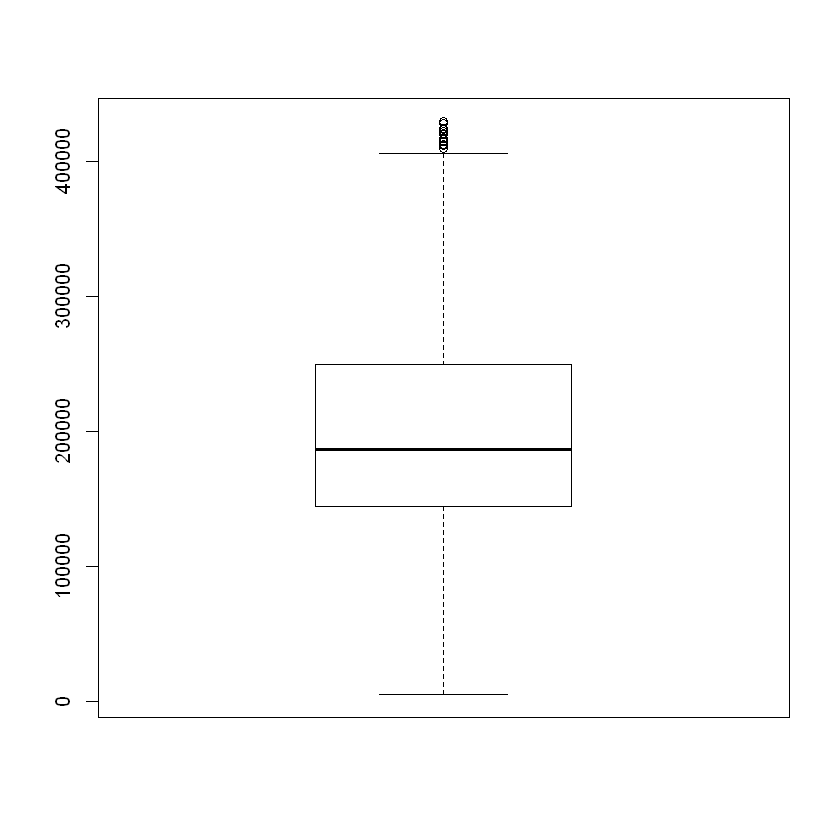

In [43]:
outliers2 <- boxplot(NoOutliersData$price)$out
outliers2
# 21 outliers will be removed on secod iteration

In [44]:
# Inspect Outliers
NoOutliersData[which(NoOutliersData$price %in% outliers2), ]
nrow(NoOutliersData[which(NoOutliersData$price %in% outliers2), ])

price  lotSize age landValue livingArea pctCollege bedrooms fireplaces
363  415000 0.58      9  86400    3358       64         4        1         
397  412500 0.60     13  88000    3896       64         5        2         
441  425000 0.46     88  19700    3003       57         4        1         
633  425000 1.03     24 124800    2457       57         3        1         
650  428500 0.42      4  87200    3243       57         4        0         
710  430000 0.34      5  82400    2328       57         3        1         
802  420000 1.14      6  82100    3279       63         4        1         
1067 424200 1.82     19 130700    2914       63         4        1         
1090 415000 2.92      1  20000    2709       36         3        1         
1215 420000 0.11    121  87000    2247       62         4        0         
1235 421000 0.31      5  80600    1911       62         3        1         
1264 412500 0.39      4  85400    2000       62         3        1         
1311 430000 1.34     15  75700    2649       21         3        1         
1328 412000 0.62      9  57800    2900       64         4        1         
1341 417000 0.13      6  46500    2742       64         4        1         
1342 410000 0.50      9  37800    2988       64         5        1         
1508 410000 0.79     11  86900    2444       75         4        1         
1527 410000 0.44      3  13200    2600       64         4        1         
1642 409790 0.27      1  74800    3009       62         5        1         
1671 409550 0.69      1  83500    2719       61         3        1         
1686 422680 0.16    176  46200    4486       51         6        1         
     bathrooms rooms heating.electric heating.hot air fuel.electric fuel.gas
363  3.5       12    0                1               0             1       
397  4.5       12    0                0               0             1       
441  3.5       12    0                1               0             1       
633  3.0        9    0                1               0             1       
650  2.5       11    0                1               0             1       
710  2.5        7    0                1               0             1       
802  3.0       11    0                1               0             1       
1067 3.5       10    0                1               0             1       
1090 2.5       10    0                1               0             1       
1215 2.0       10    0                0               0             1       
1235 2.5        6    0                1               0             1       
1264 2.5        6    0                1               0             1       
1311 3.0        7    1                0               1             0       
1328 2.5       10    0                1               0             1       
1341 2.5       11    0                1               0             1       
1342 2.5       11    0                1               0             1       
1508 3.0       11    0                1               0             1       
1527 2.5       10    0                1               0             1       
1642 3.5       12    0                1               0             1       
1671 2.0        9    0                1               0             1       
1686 4.0       12    0                0               0             1       
     sewer.none sewer.septic waterfront.Yes newConstruction.Yes centralAir.Yes
363  0          0            0              0                   1             
397  0          0            0              0                   1             
441  0          1            0              0                   1             
633  0          0            0              0                   1             
650  0          0            0              0                   1             
710  0          0            0              0                   1             
802  0          0            0              0                   1             
1067 0 

[1] 21

In [45]:
# # Careful running this cell multiple times. remove comment to run cell
NoOutliersData2 <- NoOutliersData[-which(NoOutliersData$price %in% outliers2), ]

In [46]:
nrow(NoOutliersData2)

[1] 1654

1675 - 21 = 1654 rows after removing second iteration of outliers

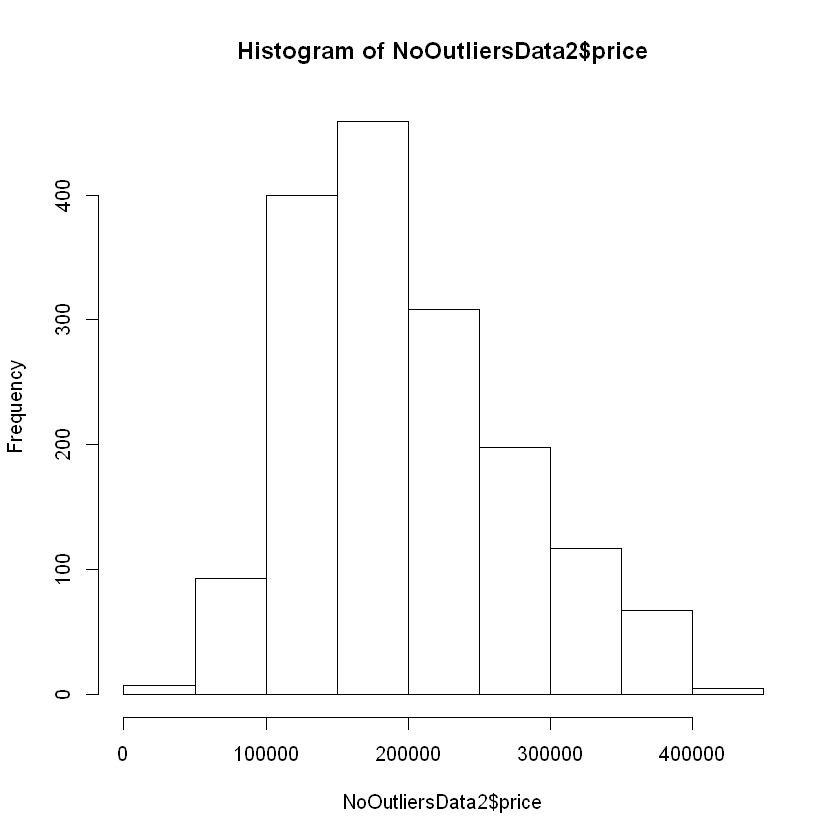

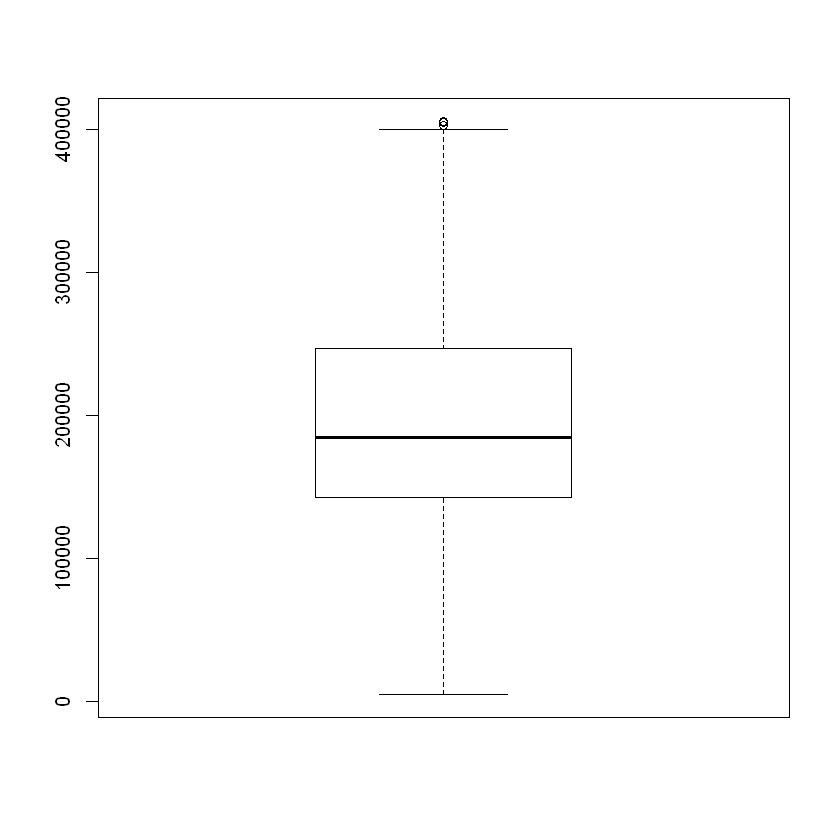

In [47]:
hist(NoOutliersData2$price)
boxplot(NoOutliersData2$price)

[1] 405100 405000 405000 403040 406000

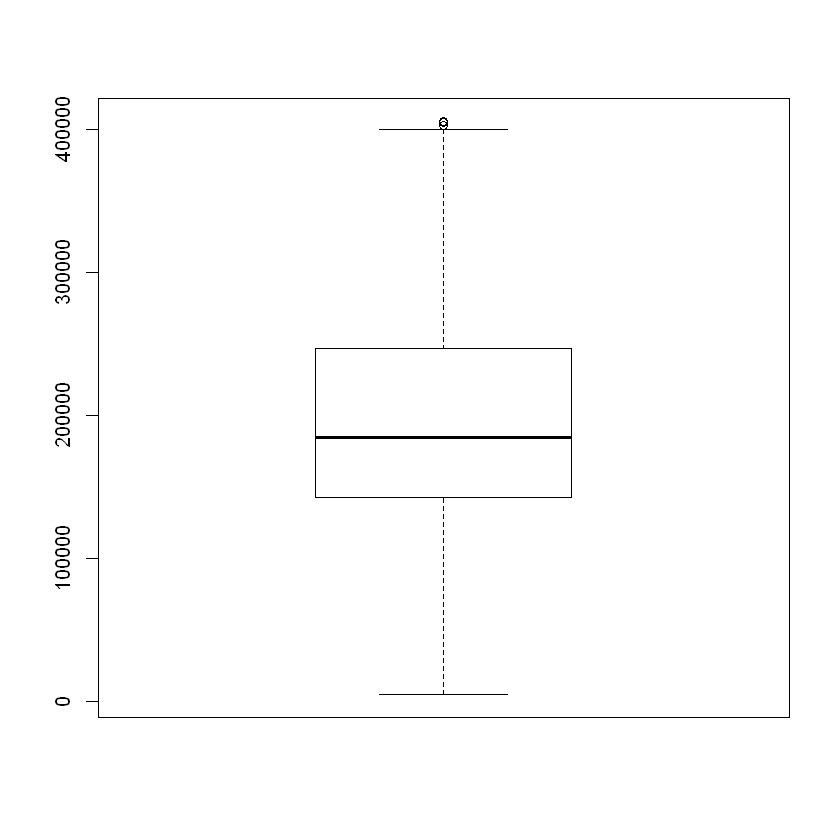

In [48]:
outliers3 <- boxplot(NoOutliersData2$price)$out
outliers3

# 5 Outliers to be removed on third iteration

In [49]:
NoOutliersData3 <- NoOutliersData2[-which(NoOutliersData2$price %in% outliers3), ]

In [408]:
# Summary of outliers removed. NoOutliersData 3 has removed outliers highlited by boxplot 
nrow(data) # original data set with 1728 rows
nrow(NoOutliersData) # first iteration removing 53 outliers
nrow(NoOutliersData2) # second iteration removing 21 outliers
nrow(NoOutliersData3) # third iteration removing 5 outliers

[1] 1728

[1] 1675

[1] 1654

[1] 1649

Create a new dataset after removing the outliers. 

In [51]:
dataNoOut <- NoOutliersData3

In [52]:
# New linear Model after removing outliers >> lmNoOut
# After removing Outliers, the presence of variable waterfront in the model is questionable
lmNoOut <- lm(dataNoOut$price ~ dataNoOut$livingArea +  dataNoOut$landValue + dataNoOut$age + dataNoOut$centralAir.Yes)

summary(lmNoOut)


Call:
lm(formula = dataNoOut$price ~ dataNoOut$livingArea + dataNoOut$landValue + 
    dataNoOut$age + dataNoOut$centralAir.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-210776  -32480   -4627   27005  222411 

Coefficients:
                           Estimate Std. Error t value             Pr(>|t|)    
(Intercept)              52963.0793  4268.3874   12.41 < 0.0000000000000002 ***
dataNoOut$livingArea        73.2824     2.3604   31.05 < 0.0000000000000002 ***
dataNoOut$landValue          0.7413     0.0438   16.94 < 0.0000000000000002 ***
dataNoOut$age             -263.9172    43.5455   -6.06         0.0000000017 ***
dataNoOut$centralAir.Yes 12749.3552  2693.0152    4.73         0.0000023876 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 48500 on 1644 degrees of freedom
Multiple R-squared:  0.58,	Adjusted R-squared:  0.579 
F-statistic:  567 on 4 and 1644 DF,  p-value: <0.0000000000000002


## Linearity 

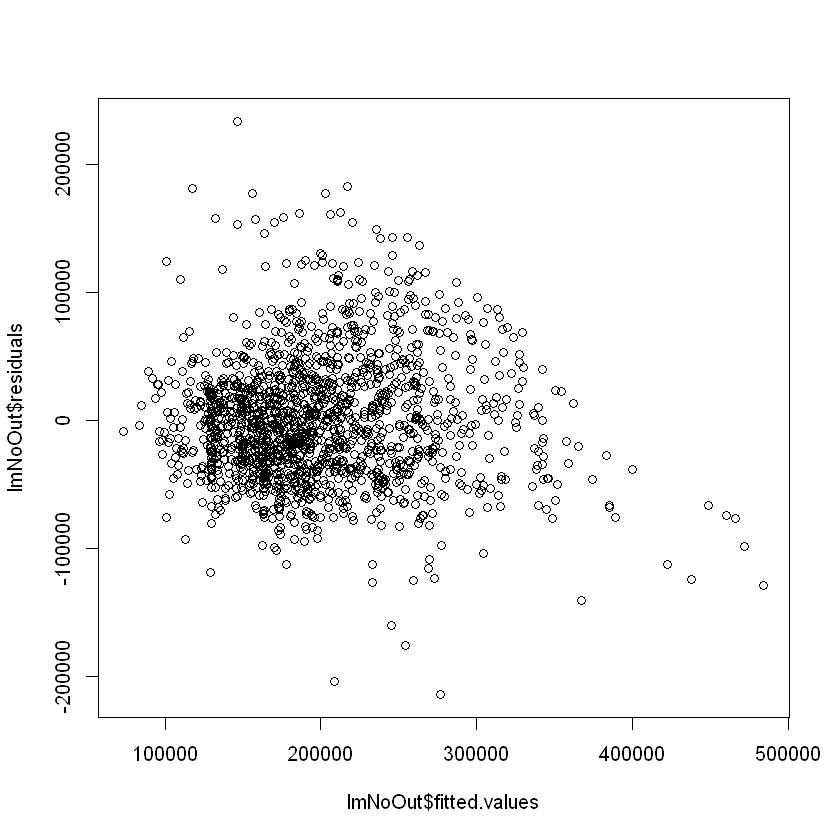

In [220]:
# residuals are randmly distributed. there is not a visible pattern. 
plot(x=lmNoOut$fitted.values, y=lmNoOut$residuals)

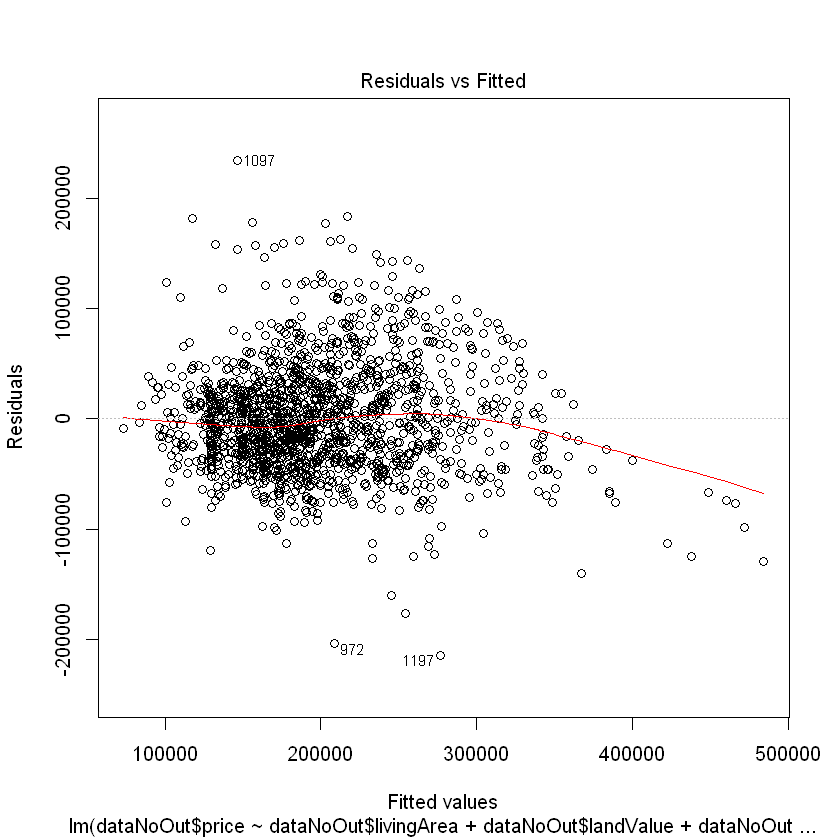

In [285]:
plot(lmNoOut, which=1)

# It looks like an straight horizontal line.

## Errors are normally distributed

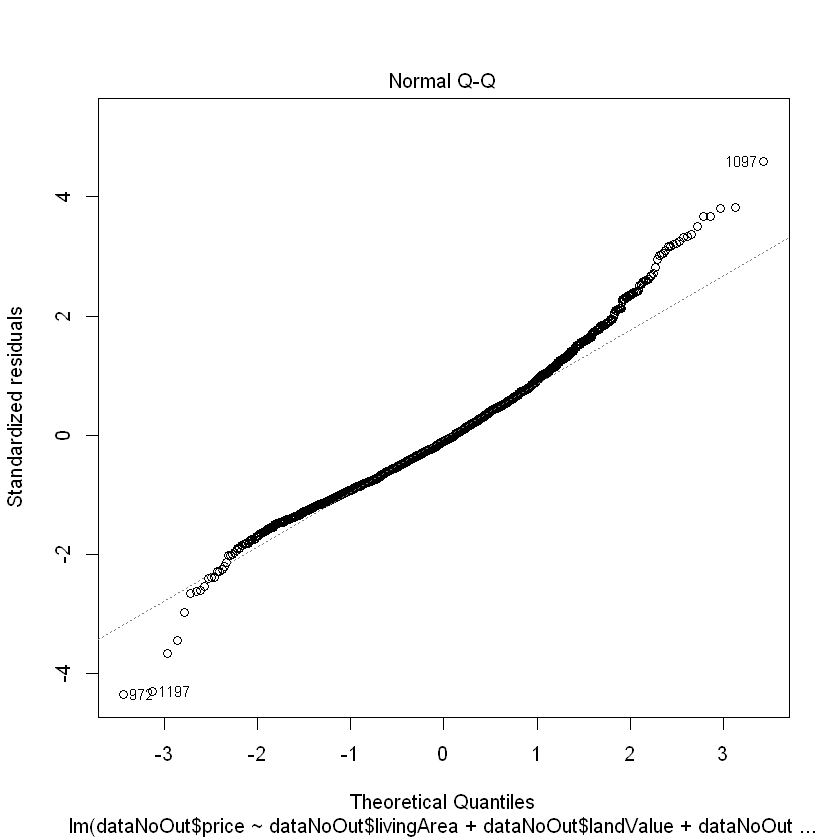

In [53]:
plot(lmNoOut, which=2)

# Outliers might affecting the extremes of the distribution. line is better adjusted now after removing outliers

## Heterocedasticity

We check for heteroscedasticity by plotting normalised residuals against normalised predicted values

In [88]:
names(lmNoOut)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [89]:
lmNoOut$residuals

1          2          3          4          5          6          7 
 -10824.88  -23379.00  -84374.93  -46300.01  -45186.69  -17194.90 -113564.65 
         8          9         10         11         12         13         14 
  -6787.83  -89766.76  -39579.46   54966.02  -59221.75  -10525.95  -50361.76 
        15         16         17         18         19         20         21 
 -12039.57  -22708.19   15960.43  -53476.16  -55857.50  -48839.96  -14066.64 
        22         23         24         25         26         27         28 
 -60868.64  -33030.19  -52292.42  -75090.57   35168.10  -35348.38   13026.66 
        29         30         31         32         33         34         35 
 -48383.50  -19926.31   -5260.75   -8996.31   26196.19  -25265.73  -28795.20 
        36         37         38         39         40         41         42 
   2122.55  -25817.83   73264.63   -8680.28   -2787.08  -30230.70  -42697.08 
        43         44         45         46         47         48         49 
  -2100.78   19287.60  -12835.54   13031.78  -22381.21  -43095.75  -24221.12 
        50         51         52         53         54         55         56 
 -63840.48  -89270.07  -16103.27  -29536.34  -84344.40  -12841.87  -81232.11 
        57         58         59         60         61         62         63 
 -64226.22  -40507.89  -18689.56  -10252.86  -61909.11  -72799.44  -43125.07 
        64         65         66         67         68         69         70 
  37845.17  -39710.29   13083.54  -28438.02   23908.98    2559.99   -9660.56 
        71         72         73         74         75         76         77 
 -61465.26  -49218.67  -20973.23  -68647.75  -18824.59  -38770.07  -61225.63 
        78         79         80         81         82         83         84 
 -26201.12  -17793.63  -39770.07  -49331.94  -49770.07  -12772.26   15083.31 
        85         86         87         88         89         90         91 
 -59196.97   84254.02  -68077.83  -19262.33  -63852.53  -29663.82  -42467.12 
        92         93         94         95         96         97         98 
 -76478.85  -28771.69  -33852.53  -85436.29  -25136.16   20639.21  -23335.90 
        99        100        101        102        103        104        105 
 -70046.61  -20348.30   -8641.74  -60545.14  -15423.74  -35398.25   46696.25 
       106        107        108        109        110        111        112 
 -63051.45    8132.92  -85266.85  -27936.40  -24305.41  -52476.10   -9122.09 
       113        114        115        116        117        118        119 
 -66735.74   -5336.93  -12182.83   12081.92   40508.86   33748.01   24948.40 
       120        121        122        123        124        125        126 
 -46962.40  -66737.88   13796.86  -20816.09  -62511.47  -29521.07    4660.79 
       127        128        129        130        131        132        133 
  32106.21  -15041.85  -28973.69  -31919.85   -8059.07 -211739.15  -17112.74 
       134        135        136        137        138        139        140 
 -20118.69  -78584.03  -33872.83  -21201.51  -27164.90  -32588.88 -166889.02 
       141        142        143        144        145        146        147 
 -57508.20  -17255.98  -49068.92  -24119.74  -81684.64 -129941.50  -60767.74 
       148        149        150        151        152        153        154 
 -69579.61  -38466.73  -20225.41  -34082.65  -32298.95  -46957.43  -34061.14 
       155        156        157        158        159        160        161 
  -4412.16  -57537.85  -49214.89  -56484.22  -26208.74    -618.03    2303.06 
       162        163        164        165        166        167        168 
 -52398.30   46350.24  -74561.11  -58288.14   30659.89  -44333.23  -20813.79 
       169        170        171        172        173        174        175 
 -44544.93  -23797.50  -33511.73    8505.07  -37344.56   29954.37  -32304.26 
       176        177        178        179        180        181        182 
 -26636.14   61919.13    2874.6

In [41]:
normalise <- function(x) { (x-mean(x))/sd(x)}

In [42]:
nres <- normalise(lmNoOut$residuals)
nres

1         2         3         4         5         6         7         8 
-0.249365 -0.482646 -1.718623 -0.947512 -0.938361 -0.368985 -2.300375 -0.149435 
        9        10        11        12        13        14        15        16 
-1.835540 -0.820165  1.124706 -1.215643 -0.239536 -1.036745 -0.259754 -0.482652 
       17        18        19        20        21        22        23        24 
 0.308628 -1.079587 -1.156700 -1.013194 -0.306216 -1.246851 -0.678107 -1.064786 
       25        26        27        28        29        30        31        32 
-1.535485  0.712914 -0.727947  0.246278 -0.992365 -0.425005 -0.115306 -0.189257 
       33        34        35        36        37        38        39        40 
 0.521932 -0.518632 -0.592771  0.037892 -0.532504  1.478055 -0.172638 -0.073573 
       41        42        43        44        45        46        47        48 
-0.618338 -0.877569 -0.049228  0.388648 -0.255289  0.238524 -0.467742  1.352892 
       49        50        51        52        53        54        55        56 
-0.514206 -1.300431 -1.824730 -0.342288 -0.614910 -1.720895 -0.276539 -1.657466 
       57        58        59        60        61        62        63        64 
-1.316480 -0.834045 -0.391263 -0.220416 -1.269350 -1.490697 -0.883356  0.744343 
       65        66        67        68        69        70        71        72 
-0.809448  0.245220 -0.572303  0.466022  0.041723 -0.200592 -1.260466 -0.987857 
       73        74        75        76        77        78        79        80 
-0.434576 -1.406073 -0.387734 -0.799611 -1.252967 -0.534759 -0.377186 -0.819910 
       81        82        83        84        85        86        87        88 
-1.008341 -1.022904 -0.267852  0.288367 -1.208275  1.685617 -1.390412 -0.412042 
       89        90        91        92        93        94        95        96 
-1.308257 -0.614654 -0.864150 -1.563940 -0.601467 -0.699275 -1.750982 -0.530936 
       97        98        99       100       101       102       103       104 
 0.394152 -0.490839 -1.436213 -0.430713 -0.200805 -1.239965 -0.331753 -0.725677 
      105       106       107       108       109       110       111       112 
 0.940037 -1.282606  0.163937 -1.752567 -0.583328 -0.510536 -1.079365 -0.203113 
      113       114       115       116       117       118       119       120 
-1.372013 -0.105653 -0.249731  0.230530  0.820067  0.673313  0.483635 -0.974675 
      121       122       123       124       125       126       127       128 
-1.377042  0.282975 -0.445055 -1.267692 -0.601637  0.079318  0.632419 -0.319368 
      129       130       131       132       133       134       135       136 
-0.613376 -0.666547 -0.176586 -4.289411 -0.343834 -0.433625 -1.610427 -0.706894 
      137       138       139       140       141       142       143       144 
-0.449917 -0.568255 -0.678001 -3.381742 -1.176384 -0.346744 -1.019153 -0.502173 
      145       146       147       148       149       150       151       152 
-1.658946 -2.638348 -1.246856 -1.423936 -0.794316 -0.416055 -0.705404 -0.661343 
      153       154       155       156       157       158       159       160 
-0.970876 -0.698453 -0.096356 -1.178005 -1.017919 -1.156650 -0.545795 -0.034381 
      161       162       163       164       165       166       167       168 
 0.047900 -1.069299  0.950010 -1.483370 -1.192270  0.628451 -0.912788 -0.445309 
      169       170       171       172       173       174       175       176 
-0.902856 -0.485186 -0.693570  0.173799 -0.775494  0.610843 -0.661751 -0.553805 
      177       178       179       180       181       182       183       184 
 1.269281  0.054823 -0.809747  0.195992  0.881417  0.146364  0.555825 -0.979916 
      185       186       187       188       189       190       191       192 
-0.514788 -0.296264 -1.324618 -0.020024  1.016025 -1.660724  0.123175 -0.236475 
      193       194       195       196       197       198       199       200 
-0.543756 -0.509451 -0.497489  0.472028

In [43]:
mean(nres)
sd(nres)

[1] 0.00000000000000000155

[1] 1

Mean practically 0 and SD = 1. It looks Good !!

In [44]:
npred <- normalise(lmNoOut$fitted.values)
npred

1          2          3          4          5          6          7 
-0.9455925  0.1046661 -0.0915150  0.0484988 -1.1639773 -1.0610412  1.1780593 
         8          9         10         11         12         13         14 
-0.3763669 -0.3228659 -0.6220064  1.2352259 -0.3322621 -1.7690008 -0.8881346 
        15         16         17         18         19         20         21 
-1.0327520 -1.4891417 -1.0327520  1.8876583 -1.4313869 -1.0744018 -1.2548562 
        22         23         24         25         26         27         28 
-0.5692432 -0.2946139  0.0620795 -0.5741559  0.2582314 -0.4899596 -1.1538144 
        29         30         31         32         33         34         35 
-0.1749903 -0.8380892 -0.1087001  0.6888271  0.0417084  0.1144121  0.0034975 
        36         37         38         39         40         41         42 
 0.1595658 -0.0483788  0.3719328  0.9698180 -0.6688176  0.4640805 -0.0990721 
        43         44         45         46         47         48         49 
 0.6713853  1.0746501  1.0514456 -1.5140758 -0.6615178  0.4272503 -1.1457170 
        50         51         52         53         54         55         56 
 0.0010716 -0.7777367 -0.6996121 -0.7619903 -0.4564960 -0.8785190 -0.4761471 
        57         58         59         60         61         62         63 
-0.7679112 -0.5401660 -0.0808417 -0.5249459 -0.7752803 -0.7455042 -0.2688219 
        64         65         66         67         68         69         70 
-1.1282330  0.7271312 -1.2577419  0.9486493 -0.6964573  0.1364715 -0.0527618 
        71         72         73         74         75         76         77 
-0.7654548  1.8722318 -0.2881836 -0.6575934  0.5451885 -0.7777367 -0.4224463 
        78         79         80         81         82         83         84 
 0.7643166 -0.6171534 -0.7777367 -0.1778382 -0.7777367 -0.2761838 -0.6151766 
        85         86         87         88         89         90         91 
-0.1114532 -1.6938311 -0.2691915 -1.3734418 -0.3049620 -0.3253821  0.5446199 
        92         93         94         95         96         97         98 
-0.2596086 -0.7403624 -0.3049620 -0.8848997 -1.2536280 -1.3073097 -1.0714754 
        99        100        101        102        103        104        105 
-0.9056288 -1.1826393 -1.7649466 -0.5210041 -1.1822027 -0.2997089 -0.3531305 
       106        107        108        109        110        111        112 
 0.0398948  0.1938261 -1.5300416 -1.0163263 -1.0702472 -0.8514485 -1.1863465 
       113        114        115        116        117        118        119 
-1.1461056  0.5469698  0.0943747 -0.9043708  0.1345457 -0.6691063 -1.5066462 
       120        121        122        123        124        125        126 
-1.3259717 -1.5038202  0.5269667 -1.5197568  0.3765203  0.0827692 -0.9227338 
       127        128        129        130        131        132        133 
-1.2302122 -0.7706773 -1.4631106 -1.1194251 -0.2656300  1.5884163  0.8826536 
       134        135        136        137        138        139        140 
-1.4631106  0.0058103 -0.3158771 -0.9040121 -0.6274185 -0.1398057  1.7943530 
       141        142        143        144        145        146        147 
 0.0340798  1.3643077 -1.1129553  0.1085796  0.8094032  0.6564756 -0.3927605 
       148        149        150        151        152        153        154 
-0.2403344 -0.4328316  0.3581063 -0.4394718  0.6933032 -0.5429503  0.7248965 
       155        156        157        158        159        160        161 
 1.4126250 -0.0326696 -1.0283990 -0.0353257  0.0128602 -1.0694890  1.2010874 
       162        163        164        165        166        167        168 
 0.4853191  2.3291494  4.4848918  0.0827008  2.0974697 -0.3658001 -1.0827097 
       169        170        171        172        173        174        175 
 1.0051556  0.9227962 -0.0058396  2.3158377 -0.3634143  0.8895060  1.0256443 
       176        177        178        179        180        181        182 
-0.4738612  1.7696928  0.793246

In [45]:
mean(npred)
sd(npred)

[1] -0.00000000000000003686

[1] 1

Mean practically 0 and SD = 1. It looks Good !!

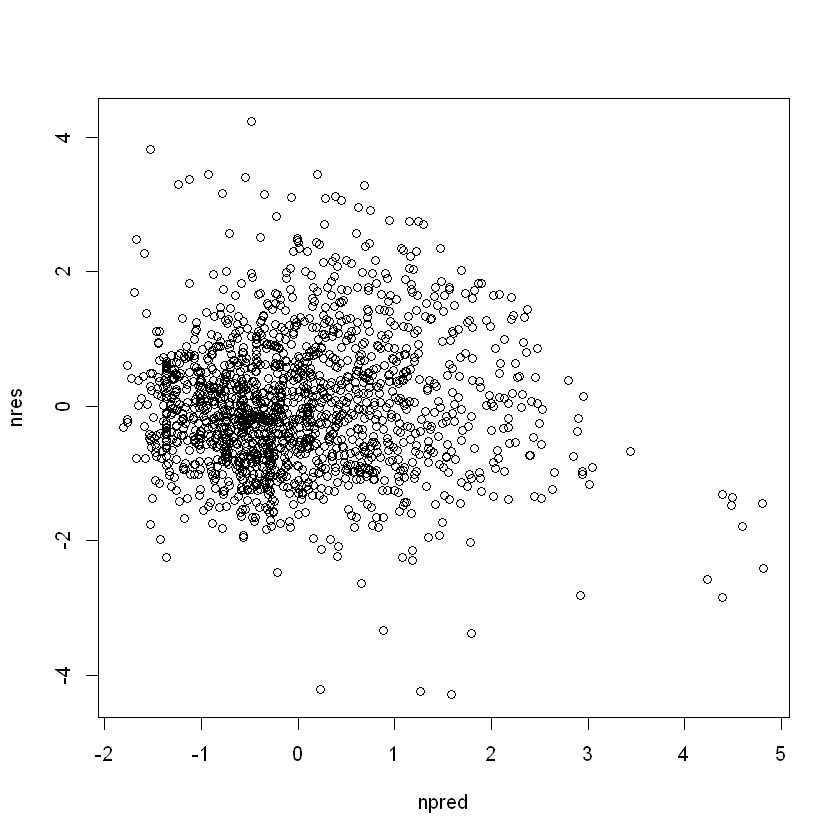

In [46]:
plot(x=npred, y=nres)

Once normalised, it looks noise. No pattern can be observed

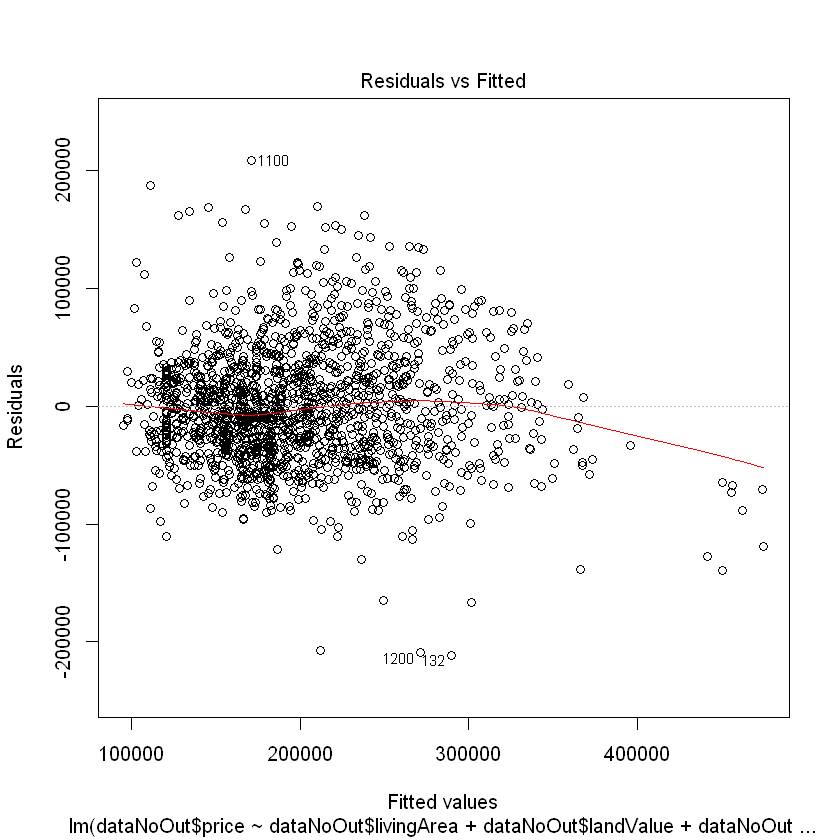

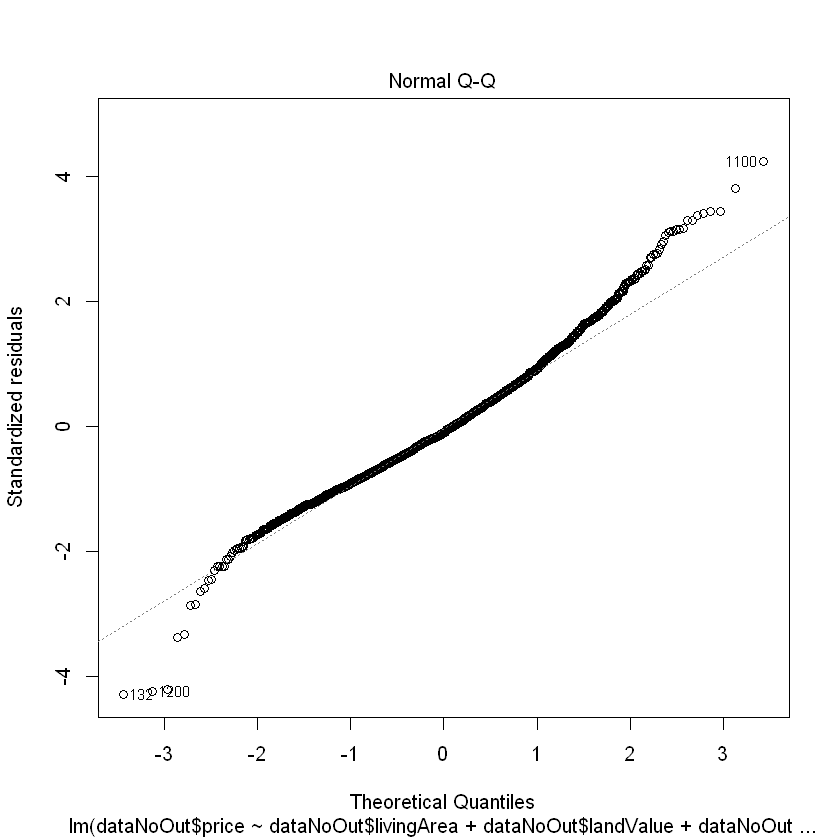

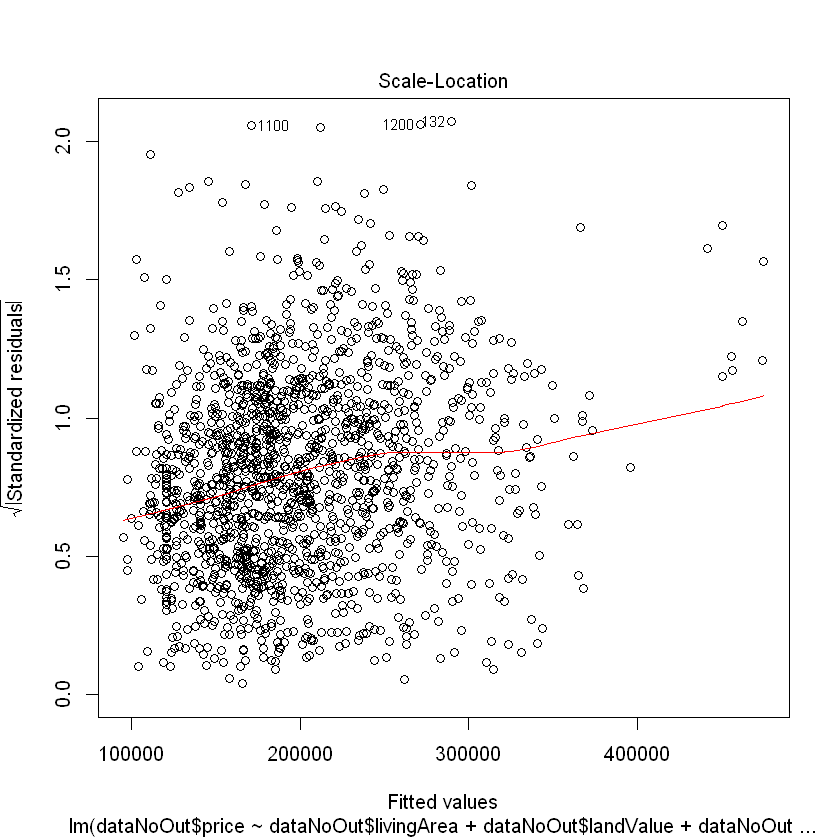

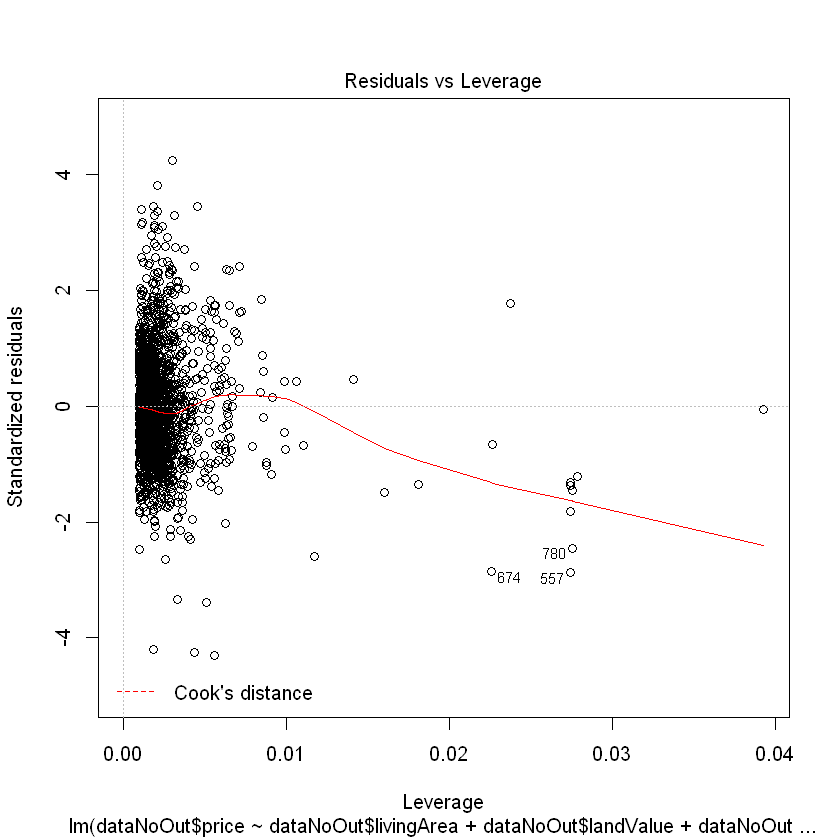

In [47]:
plot(lmNoOut)

## Test of constant variance

In [54]:
ncvTest(lmNoOut)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 52.07, Df = 1, p = 0.00000000000054

NOT GOOD

# Transform response variable 

In [55]:
# Check that the correct data is selected
head(dataNoOut)
nrow(dataNoOut)

price  lotSize age landValue livingArea pctCollege bedrooms fireplaces
1 132500 0.09     42 50000      906       35         2        1         
2 181115 0.92      0 22300     1953       51         3        0         
3 109000 0.19    133  7300     1944       51         4        1         
4 155000 0.41     13 18700     1944       51         3        1         
5  86060 0.11      0 15000      840       51         2        0         
6 120000 0.68     31 14000     1152       22         4        1         
  bathrooms rooms heating.electric heating.hot air fuel.electric fuel.gas
1 1.0       5     1                0               1             0       
2 2.5       6     0                0               0             1       
3 1.0       8     0                0               0             1       
4 1.5       5     0                1               0             1       
5 1.0       3     0                1               0             1       
6 1.0       8     0                1               0             1       
  sewer.none sewer.septic waterfront.Yes newConstruction.Yes centralAir.Yes
1 0          1            0              0                   0             
2 0          1            0              0                   0             
3 0          0            0              0                   0             
4 0          1            0              0                   0             
5 0          0            0              1                   1             
6 0          1            0              0                   0

[1] 1649

In [56]:
# Create a new dataframe in case it is need to use original data
datatransf <- dataNoOut

In [57]:
head(datatransf)

price  lotSize age landValue livingArea pctCollege bedrooms fireplaces
1 132500 0.09     42 50000      906       35         2        1         
2 181115 0.92      0 22300     1953       51         3        0         
3 109000 0.19    133  7300     1944       51         4        1         
4 155000 0.41     13 18700     1944       51         3        1         
5  86060 0.11      0 15000      840       51         2        0         
6 120000 0.68     31 14000     1152       22         4        1         
  bathrooms rooms heating.electric heating.hot air fuel.electric fuel.gas
1 1.0       5     1                0               1             0       
2 2.5       6     0                0               0             1       
3 1.0       8     0                0               0             1       
4 1.5       5     0                1               0             1       
5 1.0       3     0                1               0             1       
6 1.0       8     0                1               0             1       
  sewer.none sewer.septic waterfront.Yes newConstruction.Yes centralAir.Yes
1 0          1            0              0                   0             
2 0          1            0              0                   0             
3 0          0            0              0                   0             
4 0          1            0              0                   0             
5 0          0            0              1                   1             
6 0          1            0              0                   0

In [58]:
# Transform response variable price >> sqrt(price)
datatransf$price <- sqrt(datatransf$price)
head(datatransf)


price lotSize age landValue livingArea pctCollege bedrooms fireplaces
1 364.0 0.09     42 50000      906       35         2        1         
2 425.6 0.92      0 22300     1953       51         3        0         
3 330.2 0.19    133  7300     1944       51         4        1         
4 393.7 0.41     13 18700     1944       51         3        1         
5 293.4 0.11      0 15000      840       51         2        0         
6 346.4 0.68     31 14000     1152       22         4        1         
  bathrooms rooms heating.electric heating.hot air fuel.electric fuel.gas
1 1.0       5     1                0               1             0       
2 2.5       6     0                0               0             1       
3 1.0       8     0                0               0             1       
4 1.5       5     0                1               0             1       
5 1.0       3     0                1               0             1       
6 1.0       8     0                1               0             1       
  sewer.none sewer.septic waterfront.Yes newConstruction.Yes centralAir.Yes
1 0          1            0              0                   0             
2 0          1            0              0                   0             
3 0          0            0              0                   0             
4 0          1            0              0                   0             
5 0          0            0              1                   1             
6 0          1            0              0                   0

In [59]:
lmtrans <- lm(datatransf$price ~ datatransf$livingArea +  datatransf$landValue + datatransf$age + datatransf$centralAir.Yes)

summary(lmtrans)


Call:
lm(formula = datatransf$price ~ datatransf$livingArea + datatransf$landValue + 
    datatransf$age + datatransf$centralAir.Yes)

Residuals:
   Min     1Q Median     3Q    Max 
-386.2  -36.6   -1.5   34.5  227.1 

Coefficients:
                             Estimate  Std. Error t value             Pr(>|t|)
(Intercept)               276.8476453   4.9115944   56.37 < 0.0000000000000002
datatransf$livingArea       0.0820936   0.0027161   30.22 < 0.0000000000000002
datatransf$landValue        0.0007928   0.0000504   15.74 < 0.0000000000000002
datatransf$age             -0.3274423   0.0501074   -6.53       0.000000000085
datatransf$centralAir.Yes  13.4458889   3.0988281    4.34       0.000015182737
                             
(Intercept)               ***
datatransf$livingArea     ***
datatransf$landValue      ***
datatransf$age            ***
datatransf$centralAir.Yes ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 55.8 on 1644 degree

[1] 158.11 141.42 101.49 101.49  70.71

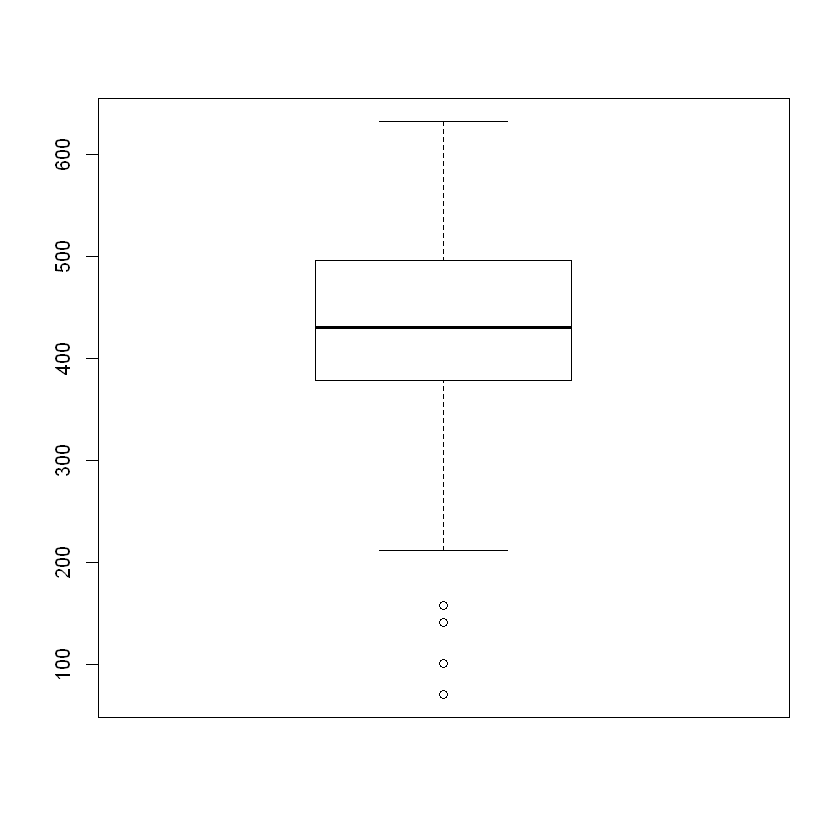

In [60]:
# Check for addtional outliers after transformation
moreout <- boxplot(datatransf$price)$out
moreout

In [61]:
# removing outliers highlighted
datatransf2 <- datatransf[-which(datatransf$price %in% moreout), ]

In [62]:
nrow(datatransf)
nrow(datatransf2)

[1] 1649

[1] 1644

In [63]:
lmtrans <- lm(datatransf2$price ~ datatransf2$livingArea +  datatransf2$landValue + datatransf2$age + datatransf2$centralAir.Yes )

summary(lmtrans)


Call:
lm(formula = datatransf2$price ~ datatransf2$livingArea + datatransf2$landValue + 
    datatransf2$age + datatransf2$centralAir.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-267.97  -36.50   -2.08   33.28  225.56 

Coefficients:
                              Estimate  Std. Error t value             Pr(>|t|)
(Intercept)                280.0534282   4.7598758   58.84 < 0.0000000000000002
datatransf2$livingArea       0.0807249   0.0026294   30.70 < 0.0000000000000002
datatransf2$landValue        0.0007899   0.0000487   16.23 < 0.0000000000000002
datatransf2$age             -0.3306207   0.0484908   -6.82       0.000000000013
datatransf2$centralAir.Yes  13.6737280   2.9973459    4.56       0.000005444965
                              
(Intercept)                ***
datatransf2$livingArea     ***
datatransf2$landValue      ***
datatransf2$age            ***
datatransf2$centralAir.Yes ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard

## Linearity

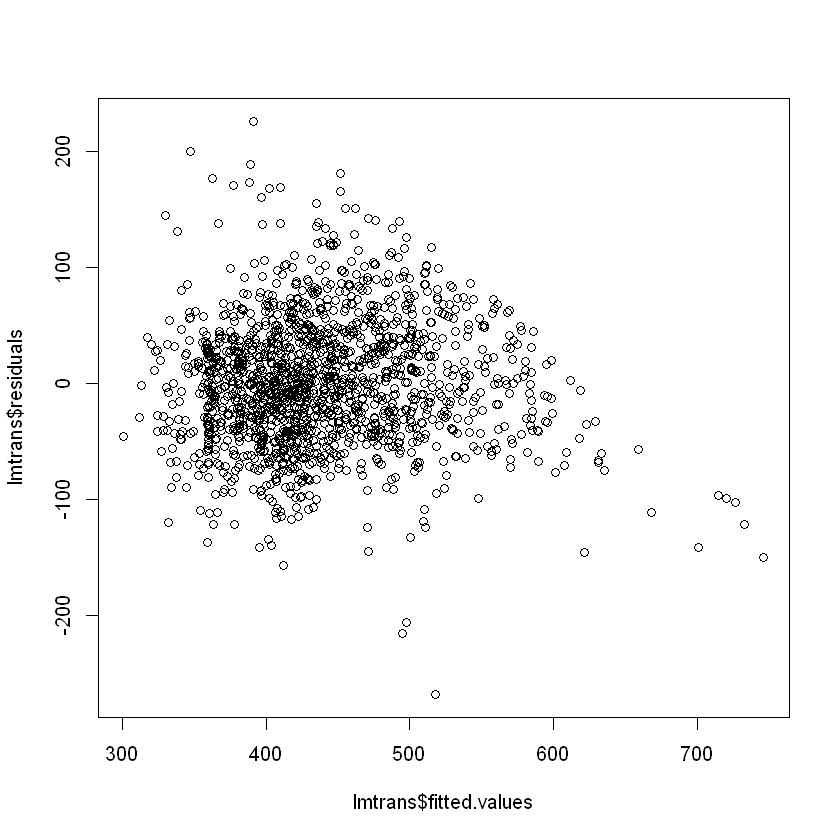

In [64]:
plot(x=lmtrans$fitted.values, y=lmtrans$residuals)

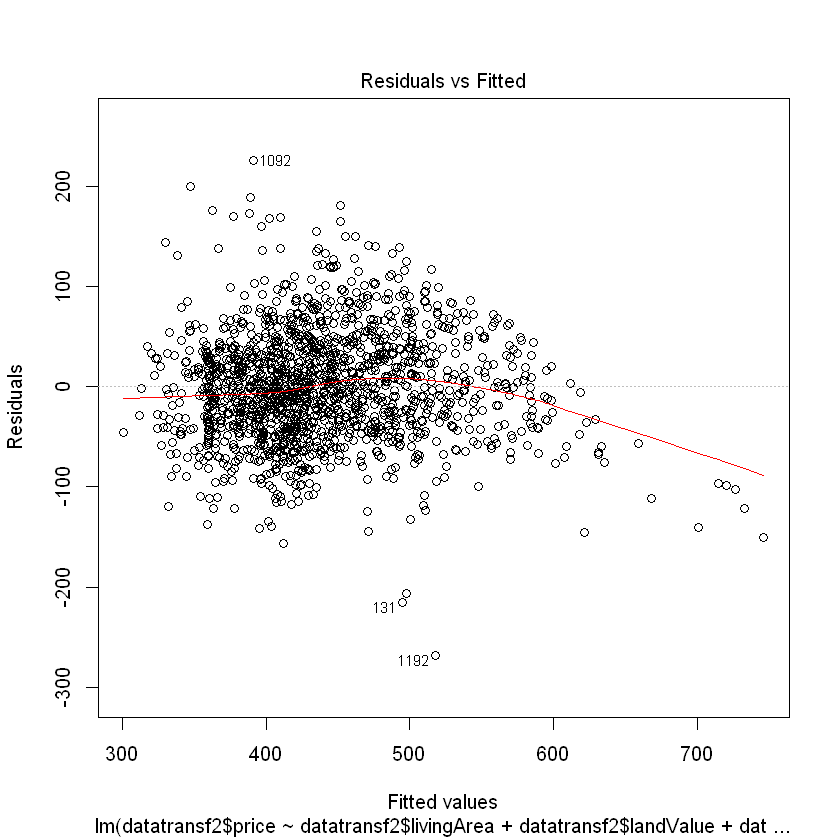

In [65]:
plot(lmtrans, which=1)

# It looks like an straight horizontal line.

## Errors are normally distributed

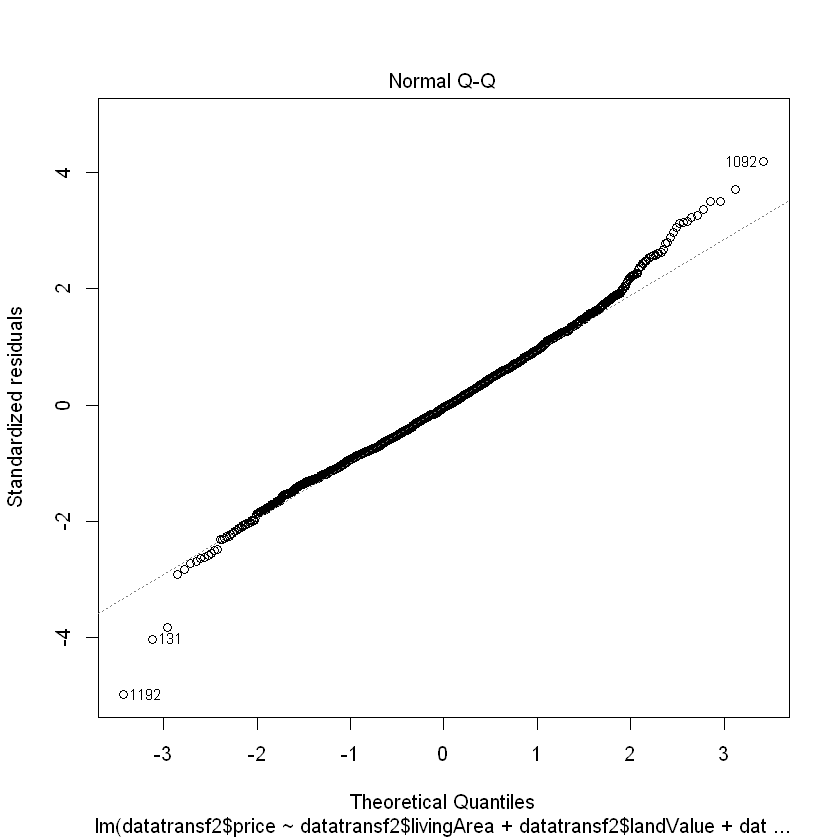

In [66]:
plot(lmtrans, which=2)

# Outliers might affecting the extremes of the distribution. After transformig the response variable 
# the situation on both ends have improved

## Heterocedasticity

In [59]:
names(lmtrans)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [86]:
lmtrans$residuals

1          2          3          4          5          6          7 
-0.0353366 -0.0515180 -0.5076643 -0.1921046 -0.4138481 -0.1171944 -0.5419947 
         8          9         10         11         12         13         14 
 0.0258419 -0.6225303 -0.2216416  0.1890493 -0.3319787 -0.2438701 -0.3871641 
        15         16         17         18         19         20         21 
-0.0756248 -0.2830262  0.1236133 -0.2318935 -0.7018147 -0.4264218 -0.1306121 
        22         23         24         25         26         27         28 
-0.4033985 -0.1326698 -0.2355558 -0.5508805  0.2117609 -0.1747410  0.0953019 
        29         30         31         32         33         34         35 
-0.2220455 -0.0988604  0.0410805  0.0167897  0.1947509 -0.0646123 -0.0816782 
        36         37         38         39         40         41         42 
 0.0760612 -0.0719118  0.3562034 -0.0018412  0.0368033 -0.0788299 -0.1733766 
        43         44         45         46         47         48         49 
 0.0521107  0.1020102 -0.0300587  0.0523369 -0.0998510 -0.1820519 -0.1947119 
        50         51         52         53         54         55         56 
-0.3175324 -0.8290809 -0.0574684 -0.1675609 -0.6095800 -0.0570666 -0.5819819 
        57         58         59         60         61         62         63 
-0.4973886 -0.2203810 -0.0277967  0.0004408 -0.4745983 -0.5878819 -0.1992479 
        64         65         66         67         68         69         70 
 0.2620401 -0.1313257  0.0856968 -0.0869245  0.1959608  0.0901201  0.0136956 
        71         72         73         74         75         76         77 
-0.4663500 -0.2216519 -0.0526564 -0.5077531 -0.0263453 -0.2508140 -0.3669439 
        78         79         80         81         82         83         84 
-0.0673358 -0.0588009 -0.2595477 -0.2382616 -0.3513553 -0.0076809  0.1479981 
        85         86         87         88         89         90         91 
-0.2968201  0.5008121 -0.3950243 -0.2100805 -0.3671389 -0.1123047 -0.1497824 
        92         93         94         95         96         97         98 
-0.4701973 -0.1552893 -0.1388802 -0.8321294 -0.2343108  0.1384428 -0.1752312 
        99        100        101        102        103        104        105 
-0.6222202 -0.1685705 -0.2211463 -0.3883220 -0.1286045 -0.1549808  0.2936970 
       106        107        108        109        110        111        112 
-0.3085502  0.0982959 -1.5513435 -0.2045501 -0.1835197 -0.3979363 -0.0768423 
       113        114        115        116        117        118        119 
-0.6995048  0.0294605  0.0059643  0.1088994  0.2462808  0.2391222  0.1412598 
       120        121        122        123        124        125        126 
-0.5105622 -0.9699770  0.1066187 -0.2720451 -0.2739356 -0.0943642  0.0598258 
       127        128        129        130        131        132        133 
 0.2148280 -0.0605736 -0.3414252 -0.2654282  0.0258430 -1.3305997 -0.0385294 
       134        135        136        137        138        139        140 
-0.2422699 -0.4250174 -0.1313428 -0.1210969 -0.1260645 -0.1094029 -0.8419254 
       141        142        143        144        145        146        147 
-0.2672160 -0.0572100 -0.4425273 -0.0496595 -0.3580639 -0.7491441 -0.3527449 
       148        149        150        151        152        153        154 
-0.3983628 -0.1809042 -0.0279850 -0.1497114 -0.0867217 -0.2611722 -0.0935930 
       155        156        157        158        159        160        161 
 0.0018955 -0.2694741 -0.4168051 -0.2622227 -0.0640767  0.0133130  0.0304998 
       162        163        164        165        166        167        168 
-0.1972142  0.0403261 -0.5888442 -0.2618159  0.0302853 -0.2156159 -0.1491818 
       169        170        171        172        173        174        175 
-0.1569103 -0.0561401 -0.1040366 -0.0520197 -0.1585401  0.1514395 -0.0913539 
       176        177        178        179        180        181        182 
-0.1019366  0.1484325  0.063332

In [87]:
normalise <- function(x) { (x-mean(x))/sd(x) }

In [88]:
nres <- normalise(lmtrans$residuals)
nres

1           2           3           4           5           6 
 -0.1203128  -0.1754067  -1.7284795  -0.6540719  -1.4090571  -0.3990198 
          7           8           9          10          11          12 
 -1.8453667   0.0879857  -2.1195717  -0.7546384   0.6436691  -1.1303109 
         13          14          15          16          17          18 
 -0.8303213  -1.3182042  -0.2574849  -0.9636389   0.4208746  -0.7895437 
         19          20          21          22          23          24 
 -2.3895170  -1.4518677  -0.4447040  -1.3734788  -0.4517100  -0.8020132 
         25          26          27          28          29          30 
 -1.8756207   0.7209969  -0.5949529   0.3244811  -0.7560134  -0.3365970 
         31          32          33          34          35          36 
  0.1398697   0.0571650   0.6630819  -0.2199900  -0.2780955   0.2589709 
         37          38          39          40          41          42 
 -0.2448430   1.2127904  -0.0062690   0.1253067  -0.2683976  -0.5903074 
         43          44          45          46          47          48 
  0.1774249   0.3473210  -0.1023430   0.1781951  -0.3399696  -0.6198446 
         49          50          51          52          53          54 
 -0.6629492  -1.0811245  -2.8228290  -0.1956665  -0.5705060  -2.0754792 
         55          56          57          58          59          60 
 -0.1942986  -1.9815139  -1.6934934  -0.7503465  -0.0946413   0.0015009 
         61          62          63          64          65          66 
 -1.6158974  -2.0016019  -0.6783932   0.8921860  -0.4471335   0.2917778 
         67          68          69          70          71          72 
 -0.2959579   0.6672014   0.3068382   0.0466305  -1.5878139  -0.7546736 
         73          74          75          76          77          78 
 -0.1792828  -1.7287818  -0.0896998  -0.8539638  -1.2493593  -0.2292629 
         79          80          81          82          83          84 
 -0.2002036  -0.8837000  -0.8112258  -1.1962835  -0.0261518   0.5038994 
         85          86          87          88          89          90 
 -1.0106038   1.7051493  -1.3449664  -0.7152754  -1.2500231  -0.3823717 
         91          92          93          94          95          96 
 -0.5099743  -1.6009133  -0.5287242  -0.4728551  -2.8332083  -0.7977741 
         97          98          99         100         101         102 
  0.4713657  -0.5966217  -2.1185161  -0.5739437  -0.7529520  -1.3221467 
        103         104         105         106         107         108 
 -0.4378686  -0.5276739   0.9999705  -1.0505420   0.3346748  -5.2819661 
        109         110         111         112         113         114 
 -0.6964458  -0.6248422  -1.3548813  -0.2616304  -2.3816522   0.1003063 
        115         116         117         118         119         120 
  0.0203070   0.3707773   0.8385291   0.8141557   0.4809569  -1.7383463 
        121         122         123         124         125         126 
 -3.3025474   0.3630120  -0.9262507  -0.9326872  -0.3212883   0.2036930 
        127         128         129         130         131         132 
  0.7314398  -0.2062390  -1.1624739  -0.9037218   0.0879893  -4.5303844 
        133         134         135         136         137         138 
 -0.1311836  -0.8248730  -1.4470860  -0.4471920  -0.4123070  -0.4292206 
        139         140         141         142         143         144 
 -0.3724915  -2.8665613  -0.9098087  -0.1947870  -1.5067030  -0.1690790 
        145         146         147         148         149         150 
 -1.2191248  -2.5506624  -1.2010148  -1.3563332  -0.6159369  -0.0952826 
        151         152         153         154         155         156 
 -0.5097327  -0.2952673  -0.8892310  -0.3186626   0.0064539  -0.9174971 
        157         158         159         160         161         162 
 -1.4191249  -0.8928077  -0.2181663   0.0453275   0.1038448  -0.6714687 
        163         164         165         166         167         

In [89]:
mean(nres)
sd(nres)

[1] 0.00000000000000001924

[1] 1

In [90]:
npred <- normalise(lmtrans$fitted.values)
npred

1          2          3          4          5          6          7 
-1.0110129  0.1197662 -0.0578598  0.0677547 -1.1934148 -1.0702918  1.2266438 
         8          9         10         11         12         13         14 
-0.3641961 -0.3215993 -0.6288703  1.3035010 -0.3314697 -1.7861138 -0.8735715 
        15         16         17         18         19         20         21 
-1.0182618 -1.4932603 -1.0182618  1.9001987 -1.4436059 -1.0930825 -1.2614610 
        22         23         24         25         26         27         28 
-0.5484008 -0.2809284  0.1044280 -0.5528083  0.3063370 -0.4671871 -1.1502828 
        29         30         31         32         33         34         35 
-0.1793693 -0.8580240 -0.0887634  0.6917490  0.0494180  0.1416550  0.0036310 
        36         37         38         39         40         41         42 
 0.1882872 -0.0299639  0.3719713  1.0007623 -0.6755491  0.4678060 -0.1094580 
        43         44         45         46         47         48         49 
 0.6577526  1.0847109  1.1062088 -1.5406595 -0.6491925  2.1880775 -1.1660669 
        50         51         52         53         54         55         56 
 0.0214423 -0.7570606 -0.6966941 -0.7566187 -0.4434487 -0.8719675 -0.4610788 
        57         58         59         60         61         62         63 
-0.7482455 -0.5230343 -0.0799761 -0.5286281 -0.7548568 -0.7276027 -0.2577889 
        64         65         66         67         68         69         70 
-1.1565032  0.7464616 -1.2626094  0.9878931 -0.7147518  0.1213091 -0.0130082 
        71         72         73         74         75         76         77 
-0.7460417  1.9139092 -0.2812817 -0.6408099  0.5585609 -0.7570606 -0.4179427 
        78         79         80         81         82         83         84 
 0.7848646 -0.6201948 -0.7570606 -0.1470097 -0.7570606 -0.2509072 -0.6281450 
        85         86         87         88         89         90         91 
-0.0985975 -1.7071504 -0.2610015 -1.3779348 -0.2976137 -0.3195351  0.5769579 
        92         93         94         95         96         97         98 
-0.2504421 -0.7469388 -0.2976137 -0.8825538 -1.2603591 -1.3344499 -1.0652474 
        99        100        101        102        103        104        105 
-0.8898068 -1.1928710 -1.7795955 -0.5000808 -1.1804333 -0.2657106 -0.3213811 
       106        107        108        109        110        111        112 
 0.0686975  0.2431533 -1.5328350 -1.0071268 -1.0641455 -0.8365167 -1.1805496 
       113        114        115        116        117        118        119 
-1.1383248  0.5875480  0.1227965 -0.8908389  0.1626176 -0.6475374 -1.5161672 
       120        121        122        123        124        125        126 
-1.3339061 -1.5107508  0.5868700 -1.5272093  0.4151805  0.1292924 -0.9116352 
       127        128        129        130        131        132        133 
-1.2303480 -0.7579299 -1.4871928 -1.1194301 -0.2644875  1.6437774  0.9338878 
       134        135        136        137        138        139        140 
-1.4871928 -0.0143002 -0.3470213 -0.9164470 -0.6346261 -0.1616870  1.8278148 
       141        142        143        144        145        146        147 
 0.0465354  1.3816921 -1.1373947  0.0993282  0.8222719  0.6929761 -0.4064356 
       148        149        150        151        152        153        154 
-0.2495177 -0.4459870  0.3610260 -0.4528447  0.6837188 -0.5750323  0.7070211 
       155        156        157        158        159        160        161 
 1.3726404 -0.0408811 -1.0330836 -0.0436242  0.0003078 -1.0886749  1.2111286 
       162        163        164        165        166        167        168 
 0.4830790  2.3438239  4.5396843  0.0757693  2.1035584 -0.3779262 -1.1066583 
       169        170        171        172        173        174        175 
 1.0231023  0.9247236 -0.0326564  2.2879446 -0.4002751  0.9189861  1.0031293 
       176        177        178        179        180        181        182 
-0.4836974  1.8208351  0.791930

In [91]:
mean(npred)
sd(npred)

[1] -0.00000000000000136

[1] 1

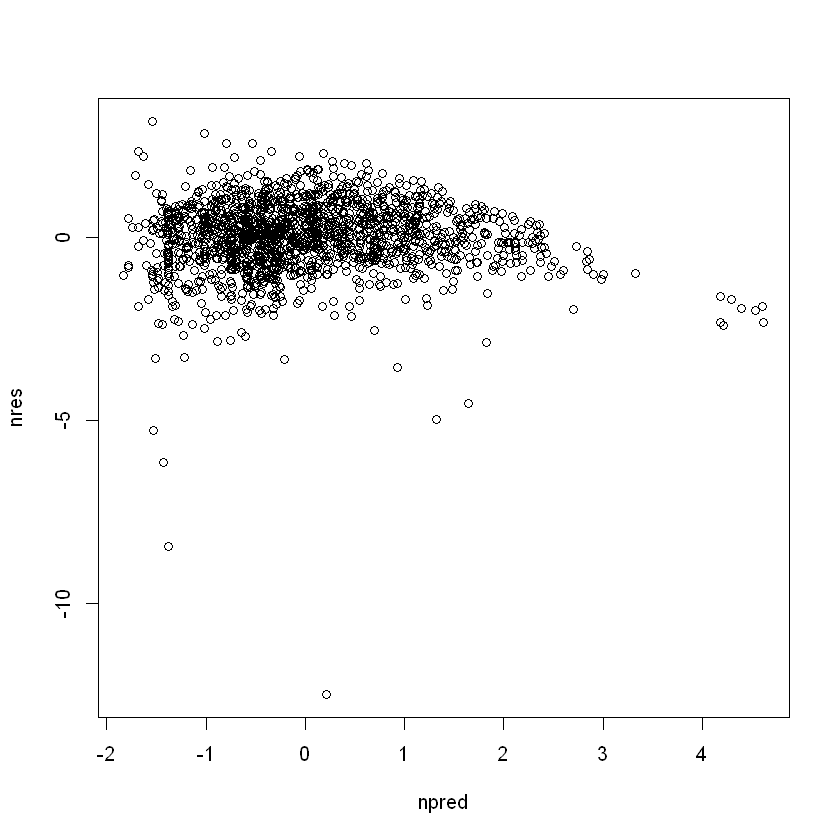

In [92]:
plot(x=npred, y=nres)

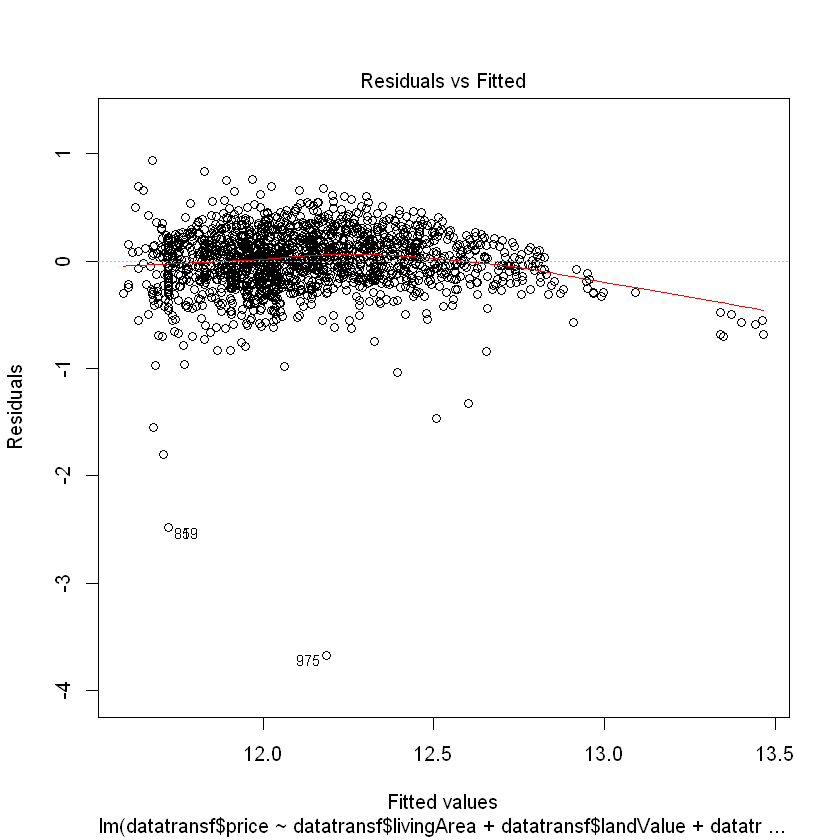

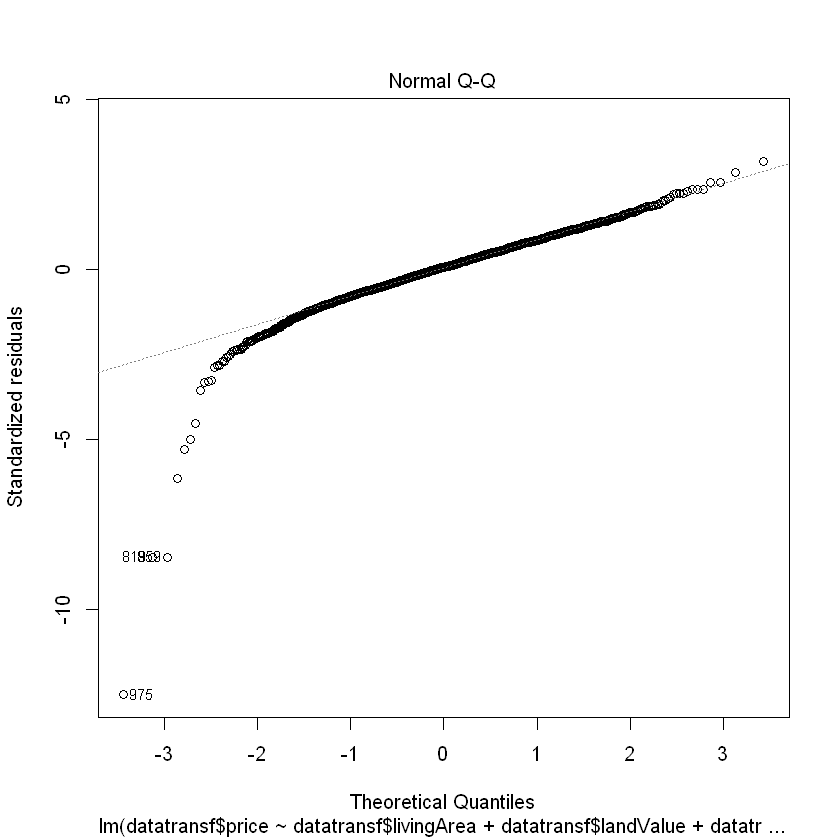

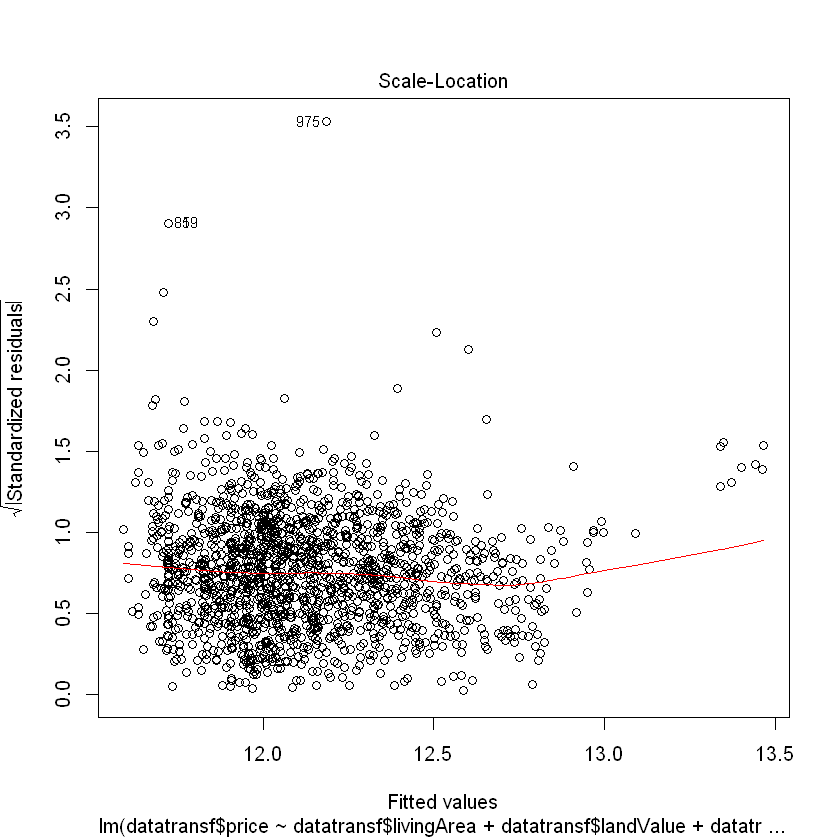

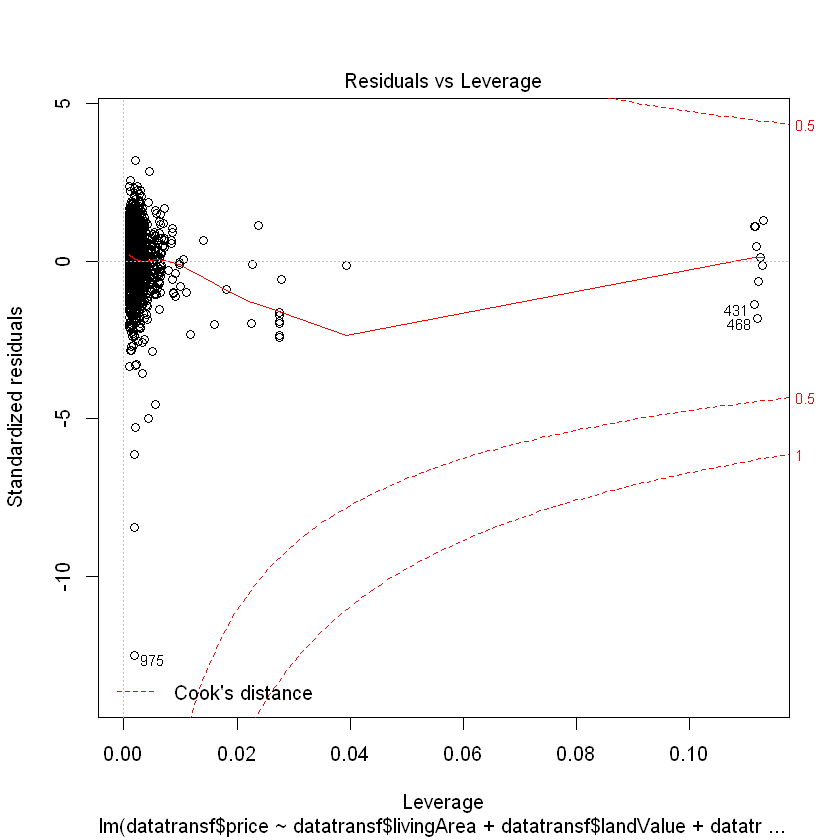

In [93]:
plot(lmtrans)

## Test of constant variable

In [67]:
ncvTest(lmtrans)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 7.505, Df = 1, p = 0.0062

# Convert Independent variables

In [68]:
# check correct data is selected
head(datatransf2)

price lotSize age landValue livingArea pctCollege bedrooms fireplaces
1 364.0 0.09     42 50000      906       35         2        1         
2 425.6 0.92      0 22300     1953       51         3        0         
3 330.2 0.19    133  7300     1944       51         4        1         
4 393.7 0.41     13 18700     1944       51         3        1         
5 293.4 0.11      0 15000      840       51         2        0         
6 346.4 0.68     31 14000     1152       22         4        1         
  bathrooms rooms heating.electric heating.hot air fuel.electric fuel.gas
1 1.0       5     1                0               1             0       
2 2.5       6     0                0               0             1       
3 1.0       8     0                0               0             1       
4 1.5       5     0                1               0             1       
5 1.0       3     0                1               0             1       
6 1.0       8     0                1               0             1       
  sewer.none sewer.septic waterfront.Yes newConstruction.Yes centralAir.Yes
1 0          1            0              0                   0             
2 0          1            0              0                   0             
3 0          0            0              0                   0             
4 0          1            0              0                   0             
5 0          0            0              1                   1             
6 0          1            0              0                   0

In [70]:
nrow(datatransf)
nrow(datatransf2)

[1] 1649

[1] 1644

In [72]:
# Create a new data frame to keep the current one in case resetting values is necesary 
finaldata <- datatransf2

In [73]:

finaldata$livingArea <- sqrt(finaldata$livingArea)
finaldata$landValue <- sqrt(finaldata$landValue)
finaldata$age <- sqrt(finaldata$age)



In [74]:
# Check data to observe some transofrmation looks fine
head(finaldata)

price lotSize age    landValue livingArea pctCollege bedrooms fireplaces
1 364.0 0.09     6.481 223.61    30.10      35         2        1         
2 425.6 0.92     0.000 149.33    44.19      51         3        0         
3 330.2 0.19    11.533  85.44    44.09      51         4        1         
4 393.7 0.41     3.606 136.75    44.09      51         3        1         
5 293.4 0.11     0.000 122.47    28.98      51         2        0         
6 346.4 0.68     5.568 118.32    33.94      22         4        1         
  bathrooms rooms heating.electric heating.hot air fuel.electric fuel.gas
1 1.0       5     1                0               1             0       
2 2.5       6     0                0               0             1       
3 1.0       8     0                0               0             1       
4 1.5       5     0                1               0             1       
5 1.0       3     0                1               0             1       
6 1.0       8     0                1               0             1       
  sewer.none sewer.septic waterfront.Yes newConstruction.Yes centralAir.Yes
1 0          1            0              0                   0             
2 0          1            0              0                   0             
3 0          0            0              0                   0             
4 0          1            0              0                   0             
5 0          0            0              1                   1             
6 0          1            0              0                   0

In [75]:
lmfinal <- lm(finaldata$price ~ finaldata$livingArea + finaldata$landValue + finaldata$age + finaldata$centralAir.Yes  )
summary(lmfinal)




Call:
lm(formula = finaldata$price ~ finaldata$livingArea + finaldata$landValue + 
    finaldata$age + finaldata$centralAir.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-260.83  -36.81   -2.93   33.00  220.92 

Coefficients:
                         Estimate Std. Error t value             Pr(>|t|)    
(Intercept)              131.5708     9.4451   13.93 < 0.0000000000000002 ***
finaldata$livingArea       6.4991     0.2206   29.47 < 0.0000000000000002 ***
finaldata$landValue        0.3507     0.0197   17.76 < 0.0000000000000002 ***
finaldata$age             -4.0503     0.5797   -6.99      0.0000000000041 ***
finaldata$centralAir.Yes  11.1934     2.9560    3.79              0.00016 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 53.1 on 1639 degrees of freedom
Multiple R-squared:  0.586,	Adjusted R-squared:  0.585 
F-statistic:  579 on 4 and 1639 DF,  p-value: <0.0000000000000002


## Linearity

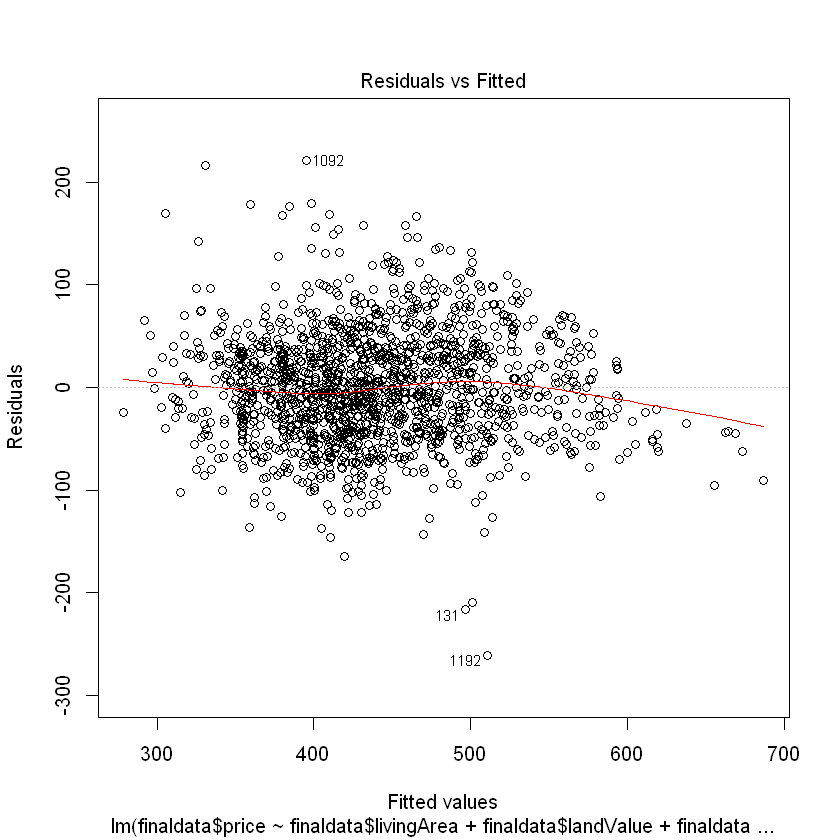

In [76]:
plot(lmfinal, which=1)

Red line looks horizontal enough near 0

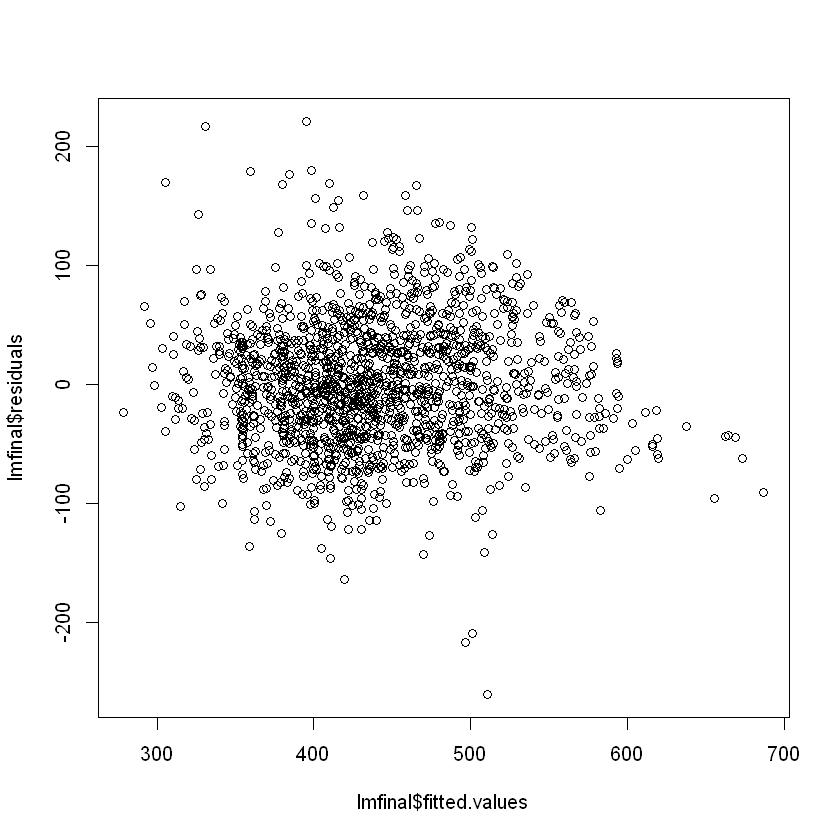

In [77]:
# residuals are randmly distributed. there is not a visible pattern. 
plot(x=lmfinal$fitted.values, y=lmfinal$residuals)

## Errors are normally distributed

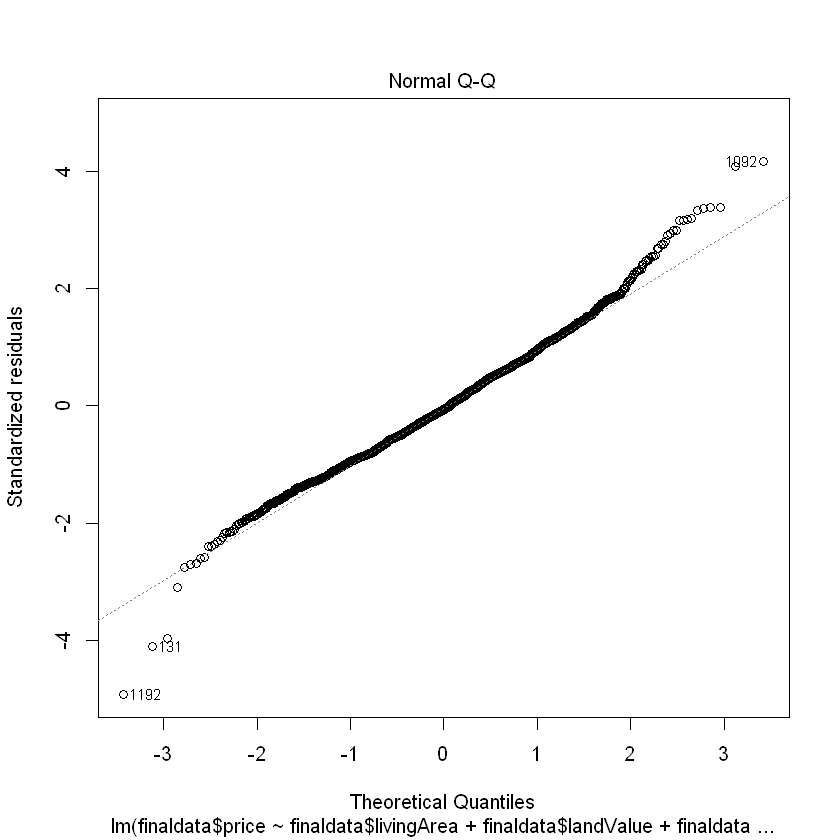

In [78]:
plot(lmfinal, which=2)

Most of the point fall on the line except few exception on both extremes. It looks good enough so far

## Heterocedasticity

In [79]:
names(lmfinal)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [80]:
lmfinal$residuals

1         2         3         4         5         6         7         8 
 -15.3610  -45.5812  -71.2242  -57.7772  -80.7202  -24.6935 -111.6254   -7.1657 
        9        10        11        12        13        14        15        16 
-122.0753  -68.5241   94.4446  -95.3901  -20.6873  -31.2427   -3.4519  -10.1119 
       17        18        19        20        21        22        23        24 
  33.8779  -62.1753  -79.8345  -82.6817  -26.5959  -75.3362  -38.8040  -45.8805 
       25        26        27        28        29        30        31        32 
 -99.9579   56.1574  -10.3229   24.0405  -42.5119  -24.3254  -15.5003  -18.1302 
       33        34        35        36        37        38        39        40 
  64.7984  -39.1452  -28.4356   -7.5874  -47.6050   76.9447  -15.3319   -0.3184 
       41        42        43        44        45        46        47        48 
 -23.2861  -36.7978   -6.3805   -0.3341  -19.5228   33.5205  -15.1190   76.3019 
       49        50        51        52        53        54        55        56 
 -33.0099  -68.3888 -125.4547  -23.2499  -35.5767 -100.9047   13.0880  -92.5140 
       57        58        59        60        61        62        63        64 
 -82.9240  -54.3147  -28.6672   -9.6579  -78.0056  -55.2465  -38.3054   36.8514 
       65        66        67        68        69        70        71        72 
 -60.2272   21.0737  -18.0145   18.8168  -13.5452  -14.2059  -79.3651  -52.2966 
       73        74        75        76        77        78        79        80 
 -19.6827  -92.8732  -39.4478  -41.3531  -58.4111  -44.9536  -22.8365  -42.8308 
       81        82        83        84        85        86        87        88 
 -25.0770  -57.9793  -13.7807   -1.4693  -64.5779   96.2559  -79.2119   -7.0242 
       89        90        91        92        93        94        95        96 
 -88.1135  -44.1625  -47.1479 -101.0793  -41.4399  -46.7603 -113.2597  -35.4896 
       97        98        99       100       101       102       103       104 
  16.1035  -29.2817  -79.0253  -16.6546   -1.4097  -71.2570  -11.2858  -40.7464 
      105       106       107       108       109       110       111       112 
  59.5748  -56.0248   10.2416  -26.7431  -21.5049  -57.6895  -13.0674  -71.3106 
      113       114       115       116       117       118       119       120 
  10.6433  -11.1797   15.6422   59.8981   46.6023   31.6075  -68.2481 -102.5325 
      121       122       123       124       125       126       127       128 
  32.8481  -11.5456  -66.2201  -20.3840    7.9707   33.5786  -10.2923  -71.4248 
      129       130       131       132       133       134       135       136 
 -51.6568  -16.3157 -216.6317  -24.8976  -56.6106  -92.6467  -45.8983  -26.8692 
      137       138       139       140       141       142       143       144 
 -31.3988  -43.3896 -141.2480  -66.3851  -23.8084  -85.3479  -47.5354  -83.9292 
      145       146       147       148       149       150       151       152 
-143.2361  -78.2847  -88.2955  -47.3696  -24.5390  -41.0086  -34.4439  -63.4374 
      153       154       155       156       157       158       159       160 
 -48.8381   -5.7973  -71.0911  -57.8558  -69.1509  -51.0852   -2.2677    2.4198 
      161       162       163       164       165       166       167       168 
 -58.0647   40.4516  -43.6791  -69.6493   25.1698  -54.3190  -40.6537  -52.7831 
      169       170       171       172       173       174       175       176 
 -38.3619  -53.0278    7.5218  -49.1745   32.2294  -49.7222  -30.5762   51.0501 
      177       178       179       180       181       182       183       184 
   2.9169  -51.2778   13.3851   33.9373   -3.9877   38.1276  -67.7011  -28.7190 
      185       186       187       188       189       190       191       192 
 -20.2121  -73.6791   -4.9167   40.2273  -73.4597   -4.0442   -0.3668  -21.1595 
      193       194       195       196       197       198       199       200 
 -31.6047  -36.3587   50.9546  -26.8078

In [81]:
normalise <- function (x) {(x-mean(x))/sd(x)}

In [82]:
# Normalise resiauls
nres <- normalise(lmfinal$residuals)
nres

1         2         3         4         5         6         7         8 
-0.289461 -0.858924 -1.342138 -1.088743 -1.521077 -0.465320 -2.103451 -0.135029 
        9        10        11        12        13        14        15        16 
-2.300366 -1.291257  1.779699 -1.797515 -0.389828 -0.588731 -0.065047 -0.190547 
       17        18        19        20        21        22        23        24 
 0.638390 -1.171621 -1.504387 -1.558040 -0.501168 -1.419623 -0.731217 -0.864564 
       25        26        27        28        29        30        31        32 
-1.883590  1.058221 -0.194523  0.453015 -0.801087 -0.458384 -0.292086 -0.341642 
       33        34        35        36        37        38        39        40 
 1.221051 -0.737646 -0.535835 -0.142975 -0.897061  1.449933 -0.288912 -0.006000 
       41        42        43        44        45        46        47        48 
-0.438799 -0.693412 -0.120234 -0.006296 -0.367885  0.631655 -0.284901  1.437821 
       49        50        51        52        53        54        55        56 
-0.622033 -1.288708 -2.364048 -0.438117 -0.670402 -1.901431  0.246628 -1.743319 
       57        58        59        60        61        62        63        64 
-1.562606 -1.023498 -0.540201 -0.181991 -1.469924 -1.041056 -0.721821  0.694422 
       65        66        67        68        69        70        71        72 
-1.134911  0.397109 -0.339461  0.354581 -0.255244 -0.267694 -1.495543 -0.985469 
       73        74        75        76        77        78        79        80 
-0.370898 -1.750086 -0.743347 -0.779251 -1.100688 -0.847099 -0.430328 -0.807096 
       81        82        83        84        85        86        87        88 
-0.472546 -1.092552 -0.259681 -0.027688 -1.216895  1.813830 -1.492655 -0.132362 
       89        90        91        92        93        94        95        96 
-1.660395 -0.832191 -0.888447 -1.904721 -0.780886 -0.881143 -2.134246 -0.668761 
       97        98        99       100       101       102       103       104 
 0.303451 -0.551779 -1.489139 -0.313837 -0.026564 -1.342756 -0.212667 -0.767818 
      105       106       107       108       109       110       111       112 
 1.122617 -1.055722  0.192990 -0.503943 -0.405234 -1.087091 -0.246239 -1.343766 
      113       114       115       116       117       118       119       120 
 0.200561 -0.210668  0.294759  1.128710  0.878166  0.595607 -1.286056 -1.932105 
      121       122       123       124       125       126       127       128 
 0.618985 -0.217564 -1.247841 -0.384112  0.150199  0.632749 -0.193946 -1.345917 
      129       130       131       132       133       134       135       136 
-0.973411 -0.307450 -4.082172 -0.469167 -1.066761 -1.745819 -0.864900 -0.506319 
      137       138       139       140       141       142       143       144 
-0.591674 -0.817626 -2.661654 -1.250950 -0.448641 -1.608281 -0.895749 -1.581548 
      145       146       147       148       149       150       151       152 
-2.699116 -1.475184 -1.663826 -0.892624 -0.462409 -0.772759 -0.649054 -1.195404 
      153       154       155       156       157       158       159       160 
-0.920297 -0.109243 -1.339630 -1.090224 -1.303067 -0.962641 -0.042731  0.045598 
      161       162       163       164       165       166       167       168 
-1.094161  0.762263 -0.823082 -1.312460  0.474296 -1.023579 -0.766072 -0.994635 
      169       170       171       172       173       174       175       176 
-0.722885 -0.999247  0.141739 -0.926636  0.607326 -0.936956 -0.576173  0.961980 
      177       178       179       180       181       182       183       184 
 0.054965 -0.966270  0.252227  0.639508 -0.075144  0.718470 -1.275749 -0.541175 
      185       186       187       188       189       190       191       192 
-0.380874 -1.388397 -0.092649  0.758037 -1.384262 -0.076209 -0.006912 -0.398725 
      193       194       195       196       197       198       199       200 
-0.595553 -0.685137  0.960181 -0.505162

In [83]:
mean(nres)
sd(nres)

[1] 0.00000000000000001008

[1] 1

In [84]:
npred <- normalise(lmfinal$fitted.values)
npred

1          2          3          4          5          6          7 
-0.9327922  0.5218574 -0.5840025  0.2099843 -1.0165703 -1.0637378  1.0229594 
         8          9         10         11         12         13         14 
-0.2971548 -0.2559673 -0.3031960  0.5929465  0.0566235 -1.9733445 -1.5140083 
        15         16         17         18         19         20         21 
-1.2425162 -2.0329449 -1.2425162  2.0234695 -1.7977959 -0.9467517 -1.2197366 
        22         23         24         25         26         27         28 
-0.6181824 -0.2201384 -0.0800041 -0.5959179  0.0699490 -0.9584681 -1.2912363 
        29         30         31         32         33         34         35 
-0.3415062 -0.8454098  0.1538486  0.9261639 -0.4212333  0.3972043  0.0379963 
        36         37         38         39         40         41         42 
 0.4359417  0.3417839  0.4139801  1.1566702 -0.6604677  0.4222857 -0.2239411 
        43         44         45         46         47         48         49 
 0.8370336  1.4394530  1.2326672 -1.8955371 -0.8181197  0.3801382 -1.2136583 
        50         51         52         53         54         55         56 
-0.0404271 -0.9318936 -0.6045560 -0.7780644 -0.6445889 -1.3294709 -0.7244381 
        57         58         59         60         61         62         63 
-0.8737752 -0.4386929  0.1389830 -0.4924948 -0.9018252 -1.5091664 -0.4081682 
        64         65         66         67         68         69         70 
-0.9755251  1.1081896 -1.3703914  0.8578056 -0.4822299  0.5107364  0.1149877 
        71         72         73         74         75         76         77 
-0.8542274  1.9239078 -0.2741047 -0.6662120  0.9598823 -0.9153112 -0.6919229 
        78         79         80         81         82         83         84 
 1.1379595 -0.5483542 -0.9153112 -0.6379581 -0.9153112 -0.1942460 -0.2373308 
        85         86         87         88         89         90         91 
-0.1419561 -1.6539496 -0.3153462 -1.8220662 -0.1277485 -0.1072294  0.6645376 
        92         93         94         95         96         97         98 
-0.1590989 -0.6427269 -0.1277485 -1.2039247 -1.3459662 -1.1967485 -1.1441294 
        99        100        101        102        103        104        105 
-1.3144076 -1.4248470 -2.2213322 -0.6075385 -1.3941394 -0.2437555 -0.3717865 
       106        107        108        109        110        111        112 
-0.1698674  0.2933505 -1.2174034 -1.2885909 -1.0948931 -1.2251564 -1.7520550 
       113        114        115        116        117        118        119 
 0.4036523  0.1763904 -0.8834777 -0.0179769 -0.7072473 -1.5906999 -1.5232238 
       120        121        122        123        124        125        126 
-1.9581553  0.3466626 -2.0075819  0.4038731 -0.0112546 -0.9334090 -1.1448762 
       127        128        129        130        131        132        133 
-0.8720025 -1.1939573 -1.0648872 -0.0567581  0.9283920  1.0907831 -1.1939573 
       134        135        136        137        138        139        140 
 0.0108602 -0.1621109 -0.9160561 -0.6244680  0.0320919  1.1163624  0.0979227 
       141        142        143        144        145        146        147 
 1.5116107 -0.9719523  0.5390721  0.7932180  0.4968533 -0.3300395 -0.1713932 
       148        149        150        151        152        153        154 
-0.3713726  0.5117759 -0.3865451  0.7937816 -0.4497452  1.0215443  1.4575622 
       155        156        157        158        159        160        161 
 0.0901873 -1.2763256  0.0785356  0.4514951 -1.0645973  1.2514459  0.5858889 
       162        163        164        165        166        167        168 
 2.1703247  3.5485282  0.1914283  2.0304781 -0.3045330 -0.9263948  1.1875475 
       169        170        171        172        173        174        175 
 1.2270884  0.3211219  2.1765883 -0.2380387  0.9286472  1.3602925 -0.4361133 
       176        177        178        179        180        181        182 
 1.7903950  0.8850309 -0.642444

In [85]:
mean(npred)
sd(npred)

[1] -0.0000000000000001921

[1] 1

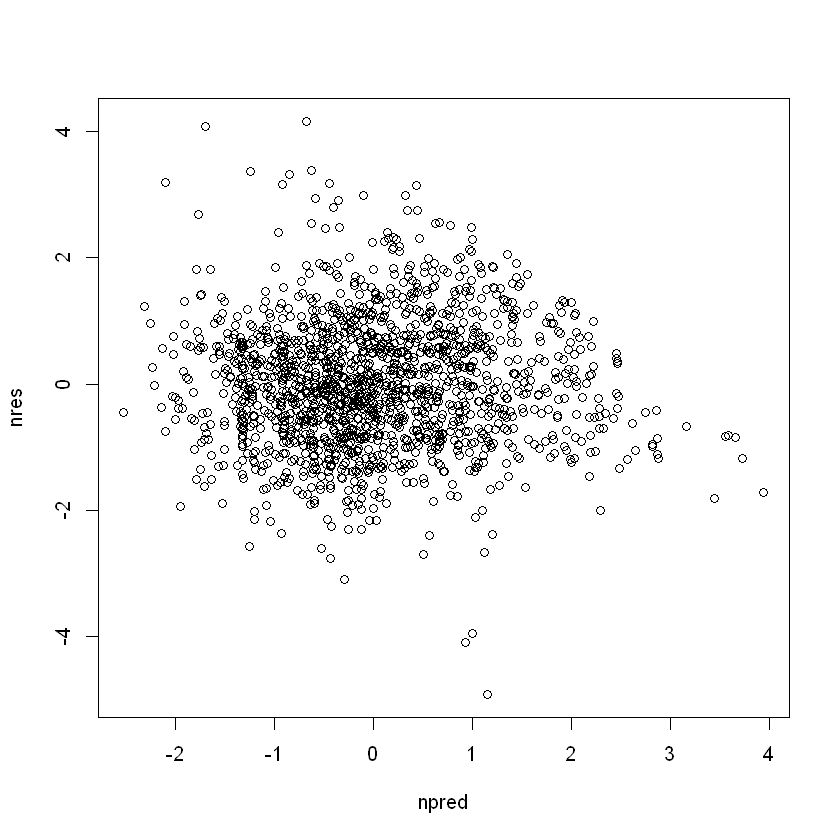

In [86]:
plot(x=npred, y=nres)

## Test of constant variance

In [ ]:
#install.packages('car',  dependencies=TRUE)
# library(car)

In [87]:
ncvTest(lmfinal)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.3957, Df = 1, p = 0.53

## Checking for Autocorrelation between errors

In [88]:
#set.seed(1234)
finaldata <- finaldata[order(runif(nrow(finaldata))), ]

In [91]:
lmfinal <- lm(finaldata$price ~ finaldata$livingArea + finaldata$landValue + finaldata$age + finaldata$centralAir.Yes  )
summary(lmfinal)


Call:
lm(formula = finaldata$price ~ finaldata$livingArea + finaldata$landValue + 
    finaldata$age + finaldata$centralAir.Yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-260.83  -36.81   -2.93   33.00  220.92 

Coefficients:
                         Estimate Std. Error t value             Pr(>|t|)    
(Intercept)              131.5708     9.4451   13.93 < 0.0000000000000002 ***
finaldata$livingArea       6.4991     0.2206   29.47 < 0.0000000000000002 ***
finaldata$landValue        0.3507     0.0197   17.76 < 0.0000000000000002 ***
finaldata$age             -4.0503     0.5797   -6.99      0.0000000000041 ***
finaldata$centralAir.Yes  11.1934     2.9560    3.79              0.00016 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 53.1 on 1639 degrees of freedom
Multiple R-squared:  0.586,	Adjusted R-squared:  0.585 
F-statistic:  579 on 4 and 1639 DF,  p-value: <0.0000000000000002


In [92]:
durbinWatsonTest(lmfinal)

 lag Autocorrelation D-W Statistic p-value
   1         0.01397         1.972   0.632
 Alternative hypothesis: rho != 0

In [93]:
vif(lmfinal)

finaldata$livingArea      finaldata$landValue            finaldata$age 
                   1.267                    1.200                    1.138 
finaldata$centralAir.Yes 
                   1.157

In [101]:
?vif

In [94]:
cooks.distance(lmfinal)

1              2              3              4              5 
0.000267468231 0.001417556945 0.000818038209 0.000008844863 0.000007750737 
             6              7              8              9             10 
0.000658753348 0.000421803997 0.000923982731 0.000022224124 0.001347292688 
            11             12             13             14             15 
0.000070437726 0.000009521956 0.001148219358 0.000028654705 0.000129720834 
            16             17             18             19             20 
0.002545981637 0.000527492173 0.001567515417 0.003531923235 0.014411542223 
            21             22             23             24             25 
0.000033183049 0.001643545044 0.000051014845 0.000583773095 0.000073133878 
            26             27             28             29             30 
0.000038957427 0.000235551332 0.000074649236 0.000929248031 0.000625047016 
            31             32             33             34             35 
0.000521177167 0.000062508286 0.000003295189 0.000212295368 0.000068337689 
            36             37             38             39             40 
0.000002597305 0.002787835207 0.000557001062 0.000002452261 0.000199821268 
            41             42             43             44             45 
0.000665766829 0.000088714937 0.000004462835 0.000122299171 0.000094135094 
            46             47             48             49             50 
0.000068948460 0.000145820221 0.000917508768 0.001021568076 0.000117307701 
            51             52             53             54             55 
0.000550417658 0.000290676268 0.000082822629 0.000007331432 0.000955188546 
            56             57             58             59             60 
0.000833234674 0.000125088974 0.000000147388 0.000003632252 0.000577002810 
            61             62             63             64             65 
0.000020364720 0.000000516904 0.000107715670 0.000176557667 0.000700860536 
            66             67             68             69             70 
0.000009802804 0.000154373751 0.000441979231 0.000124783293 0.000523356579 
            71             72             73             74             75 
0.000043438924 0.000426106755 0.000083280253 0.000007931386 0.001458749274 
            76             77             78             79             80 
0.000354899115 0.000437833910 0.000034003898 0.003000850441 0.000581346318 
            81             82             83             84             85 
0.001745693708 0.000066975447 0.000009690359 0.004673874077 0.000443296663 
            86             87             88             89             90 
0.000016301932 0.000082304231 0.000113580573 0.000745328715 0.000231959999 
            91             92             93             94             95 
0.000283644184 0.000021490979 0.000205456692 0.000048604313 0.001126278018 
            96             97             98             99            100 
0.000006775946 0.000212544907 0.000452509365 0.005913640824 0.000000422335 
           101            102            103            104            105 
0.000189661478 0.000094727964 0.002116666369 0.001703861159 0.000000527359 
           106            107            108            109            110 
0.000669112279 0.000146637076 0.000029657274 0.000244489886 0.000023118019 
           111            112            113            114            115 
0.000095419576 0.000662431112 0.000267712823 0.000016831527 0.001289117357 
           116            117            118            119            120 
0.000040016170 0.002172300460 0.000592257127 0.002986584860 0.000057343725 
           121            122            123            124            125 
0.000110188460 0.005714258988 0.000011986745 0.000257300487 0.000084552452 
           126            127            128            129            130 
0.000135350182 0.000153784959 0.000022535621 0.000463573590 0.000019193689 
           131            132            133            134  

StudRes Hat      CookD  
181   4.1898 0.005270 0.01841
720   0.7655 0.017512 0.00209
1049 -2.6832 0.014651 0.02133
1076 -4.9539 0.003935 0.01911
1384 -1.1931 0.023434 0.00683
1580 -4.1241 0.013064 0.04459

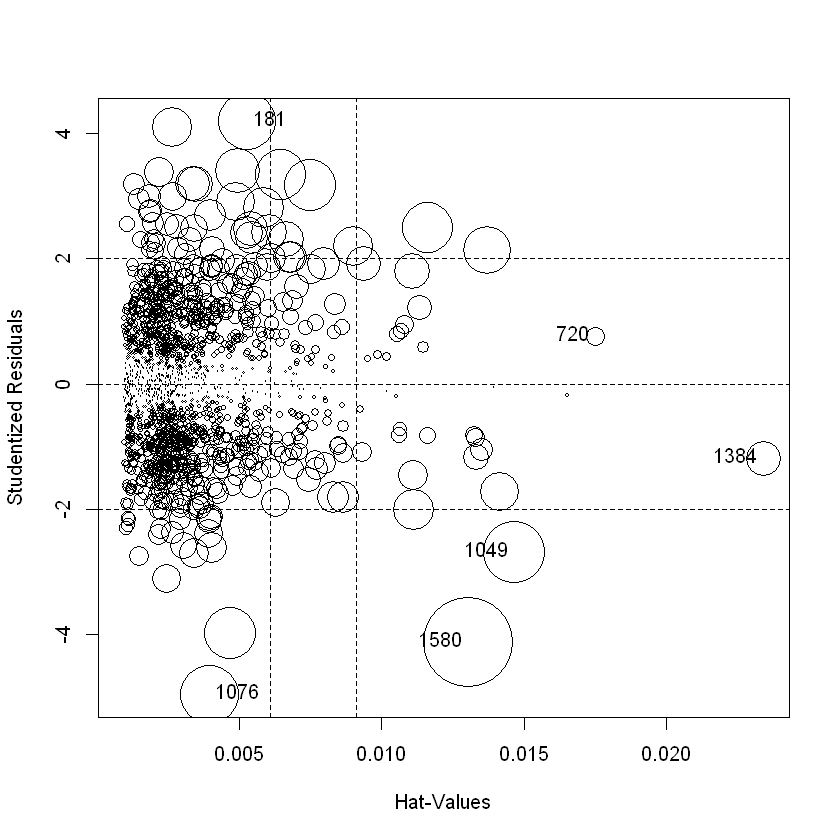

In [96]:
influencePlot(lmfinal)

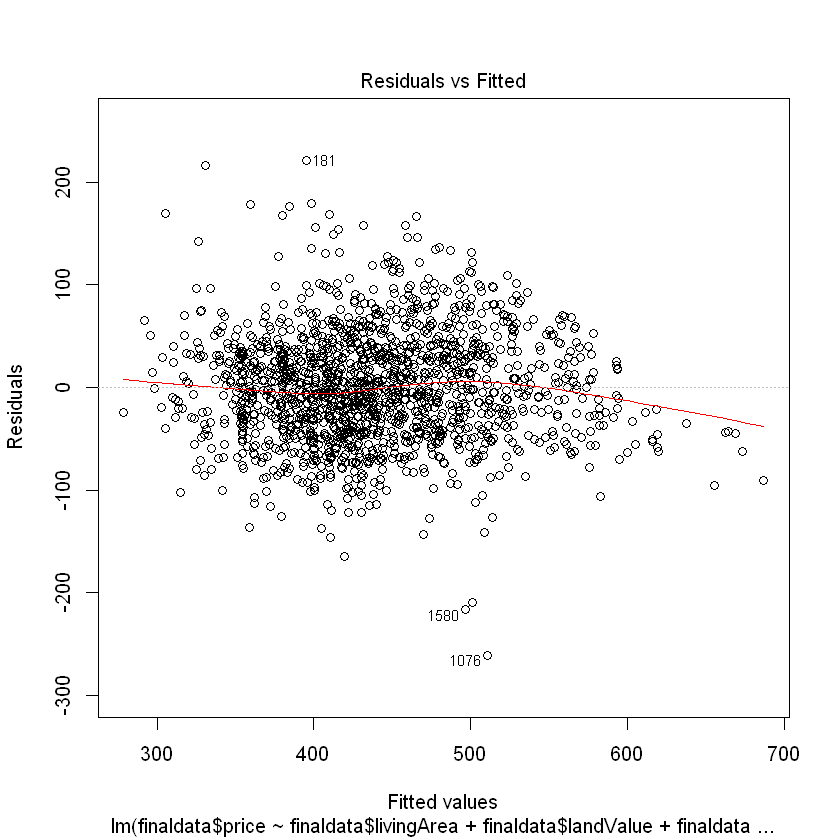

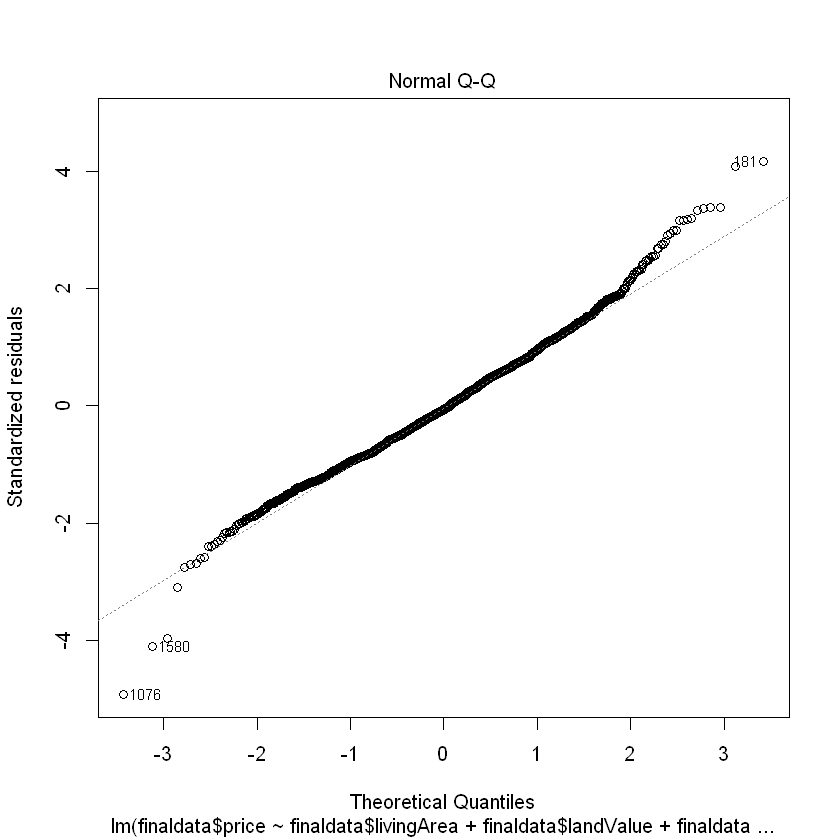

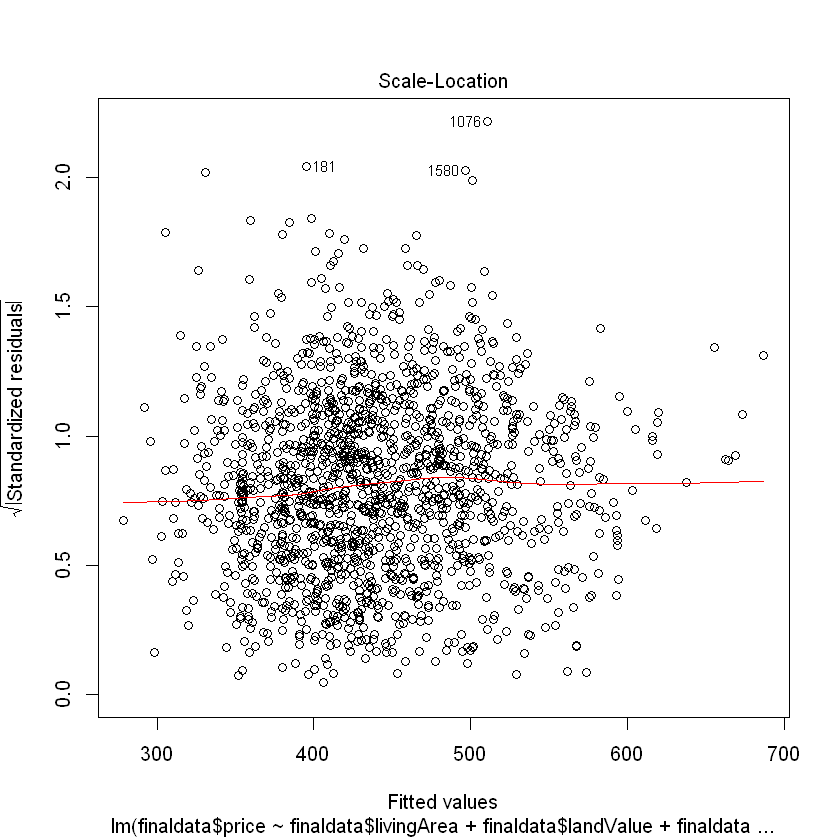

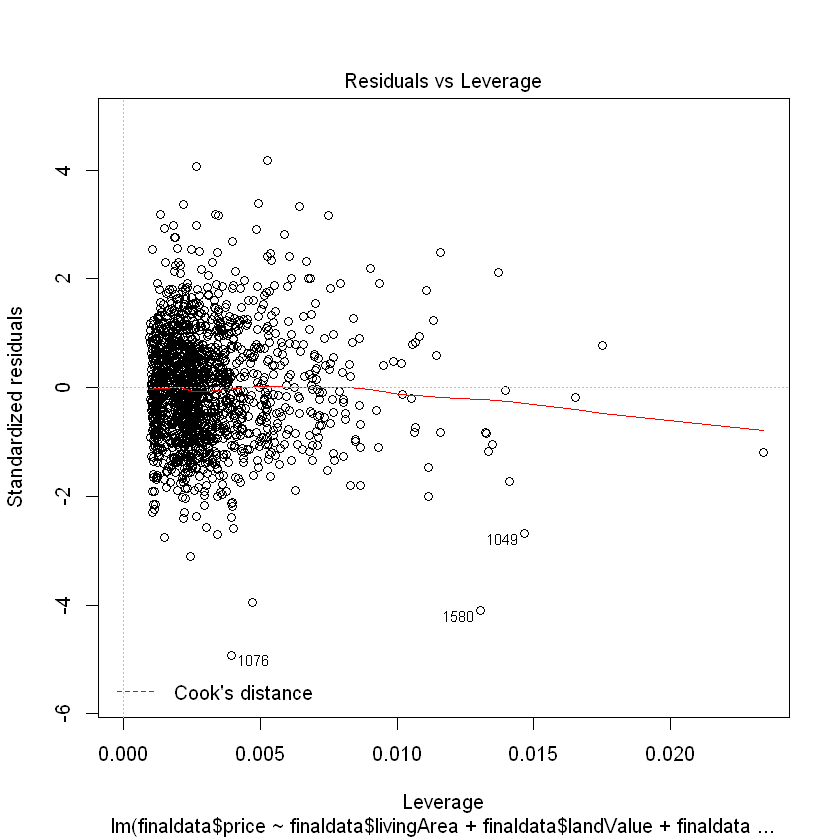

In [98]:
plot(lmfinal)